In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from matplotlib import cm
import matplotlib
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sc1 = pd.read_csv('/content/drive/MyDrive/Dataset/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
sc13= pd.read_csv("/content/drive/MyDrive/Dataset/02_01_District_wise_crimes_committed_against_SC_2013.csv")
sc13.columns

sc13 = sc13[['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt','Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act',
        'Other Crimes Against SCs']]
#combining 2 CSV files
frames = [sc1 , sc13]

sc = pd.concat(frames)

sc['STATE/UT'] = sc['STATE/UT'].str.capitalize()
sc['DISTRICT'] = sc['DISTRICT'].str.capitalize()


sc['STATE/UT'].unique()



array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry', 'A&n islands',
       'D&n haveli', 'Delhi ut'], dtype=object)

In [ ]:
sc['STATE/UT'].replace(
    to_replace='Delhi ut',
    value='Delhi',
    inplace=True
)

sc['STATE/UT'].replace(
    to_replace='A&n islands',
    value='A & n islands',
    inplace=True
)




sc['STATE/UT'].replace(
    to_replace='D&n haveli',
    value='D & n haveli',
    inplace=True
)
sc['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

In [ ]:
sc

STATE/UT       DISTRICT  Year  Murder  Rape  \
0    Andhra pradesh       Adilabad  2001       0     1   
1    Andhra pradesh      Anantapur  2001       0     4   
2    Andhra pradesh       Chittoor  2001       3     3   
3    Andhra pradesh       Cuddapah  2001       0     3   
4    Andhra pradesh  East godavari  2001       1     3   
..              ...            ...   ...     ...   ...   
818     Lakshadweep    Lakshadweep  2013       0     0   
819     Lakshadweep          Total  2013       0     0   
820      Puducherry       Karaikal  2013       0     1   
821      Puducherry     Puducherry  2013       0     0   
822      Puducherry          Total  2013       0     1   

     Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                           4        0        0      0     3   
1                           0        0        0      0    49   
2                           0        0        0      0    38   
3                           0        0        0      0    20   
4                           0        0        0      0     3   
..                        ...      ...      ...    ...   ...   
818                         0        0        0      0     0   
819                         0        0        0      0     0   
820                         0        0        0      0     0   
821                         0        0        0      0     0   
822                         0        0        0      0     0   

     Prevention of atrocities (POA) Act  Protection of Civil Rights (PCR) Act  \
0                                     0                                    15   
1                                    21                                     0   
2                                    36                                     0   
3                                    52                                     0   
4                                    12                                    63   
..                                  ...                                   ...   
818                                   0                                     0   
819                                   0                                     0   
820                                   0                                     3   
821                                   4                                    12   
822                                   4                                    15   

     Other Crimes Against SCs  
0                          32  
1                          53  
2                          34  
3                          25  
4                           7  
..                        ...  
818                         0  
819                         0  
820                         0  
821                         1  
822                         1  

[9841 rows x 13 columns]

In [ ]:
yearw = sc[sc.DISTRICT == 'Total']
yearw = yearw.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()
yearw['sum'] = yearw.drop('Year', axis=1).sum(axis=1)
yearw = yearw[['Year','sum']]

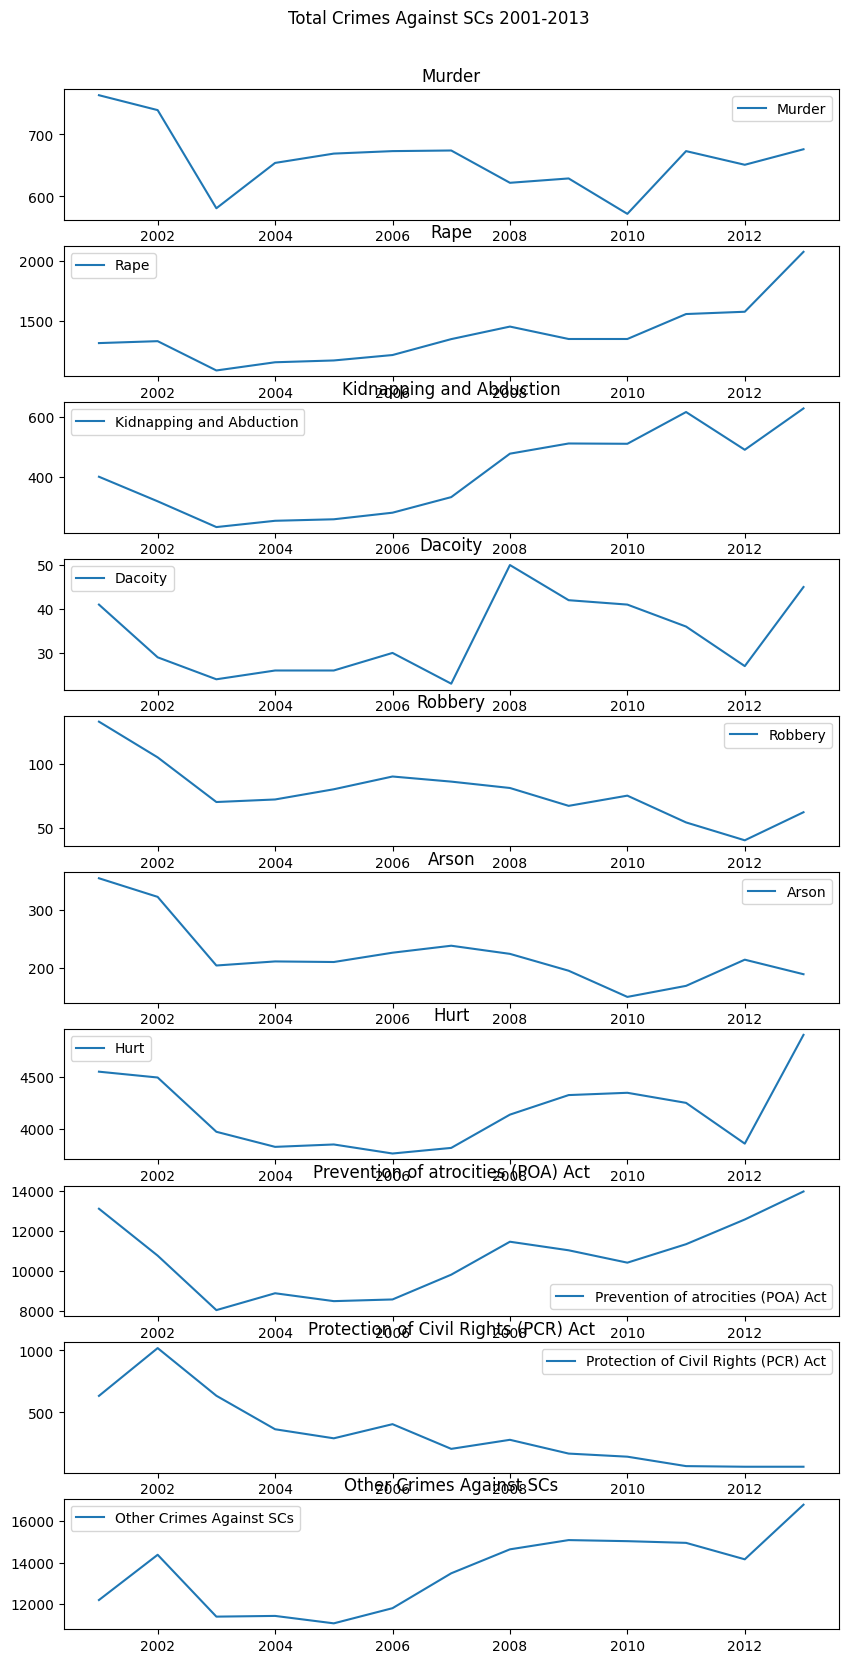

In [ ]:
import matplotlib.pyplot as plt

scy = sc[sc.DISTRICT == 'Total']
scy = scy.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

crimes = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

fig, axs = plt.subplots(nrows=len(crimes), figsize=(10, 20))

for i, crime in enumerate(crimes):
    axs[i].plot(scy['Year'], scy[crime], label=crime)
    axs[i].set_title(crime)
    axs[i].legend()

fig.suptitle("Total Crimes Against SCs 2001-2013", y=0.92)
plt.show()


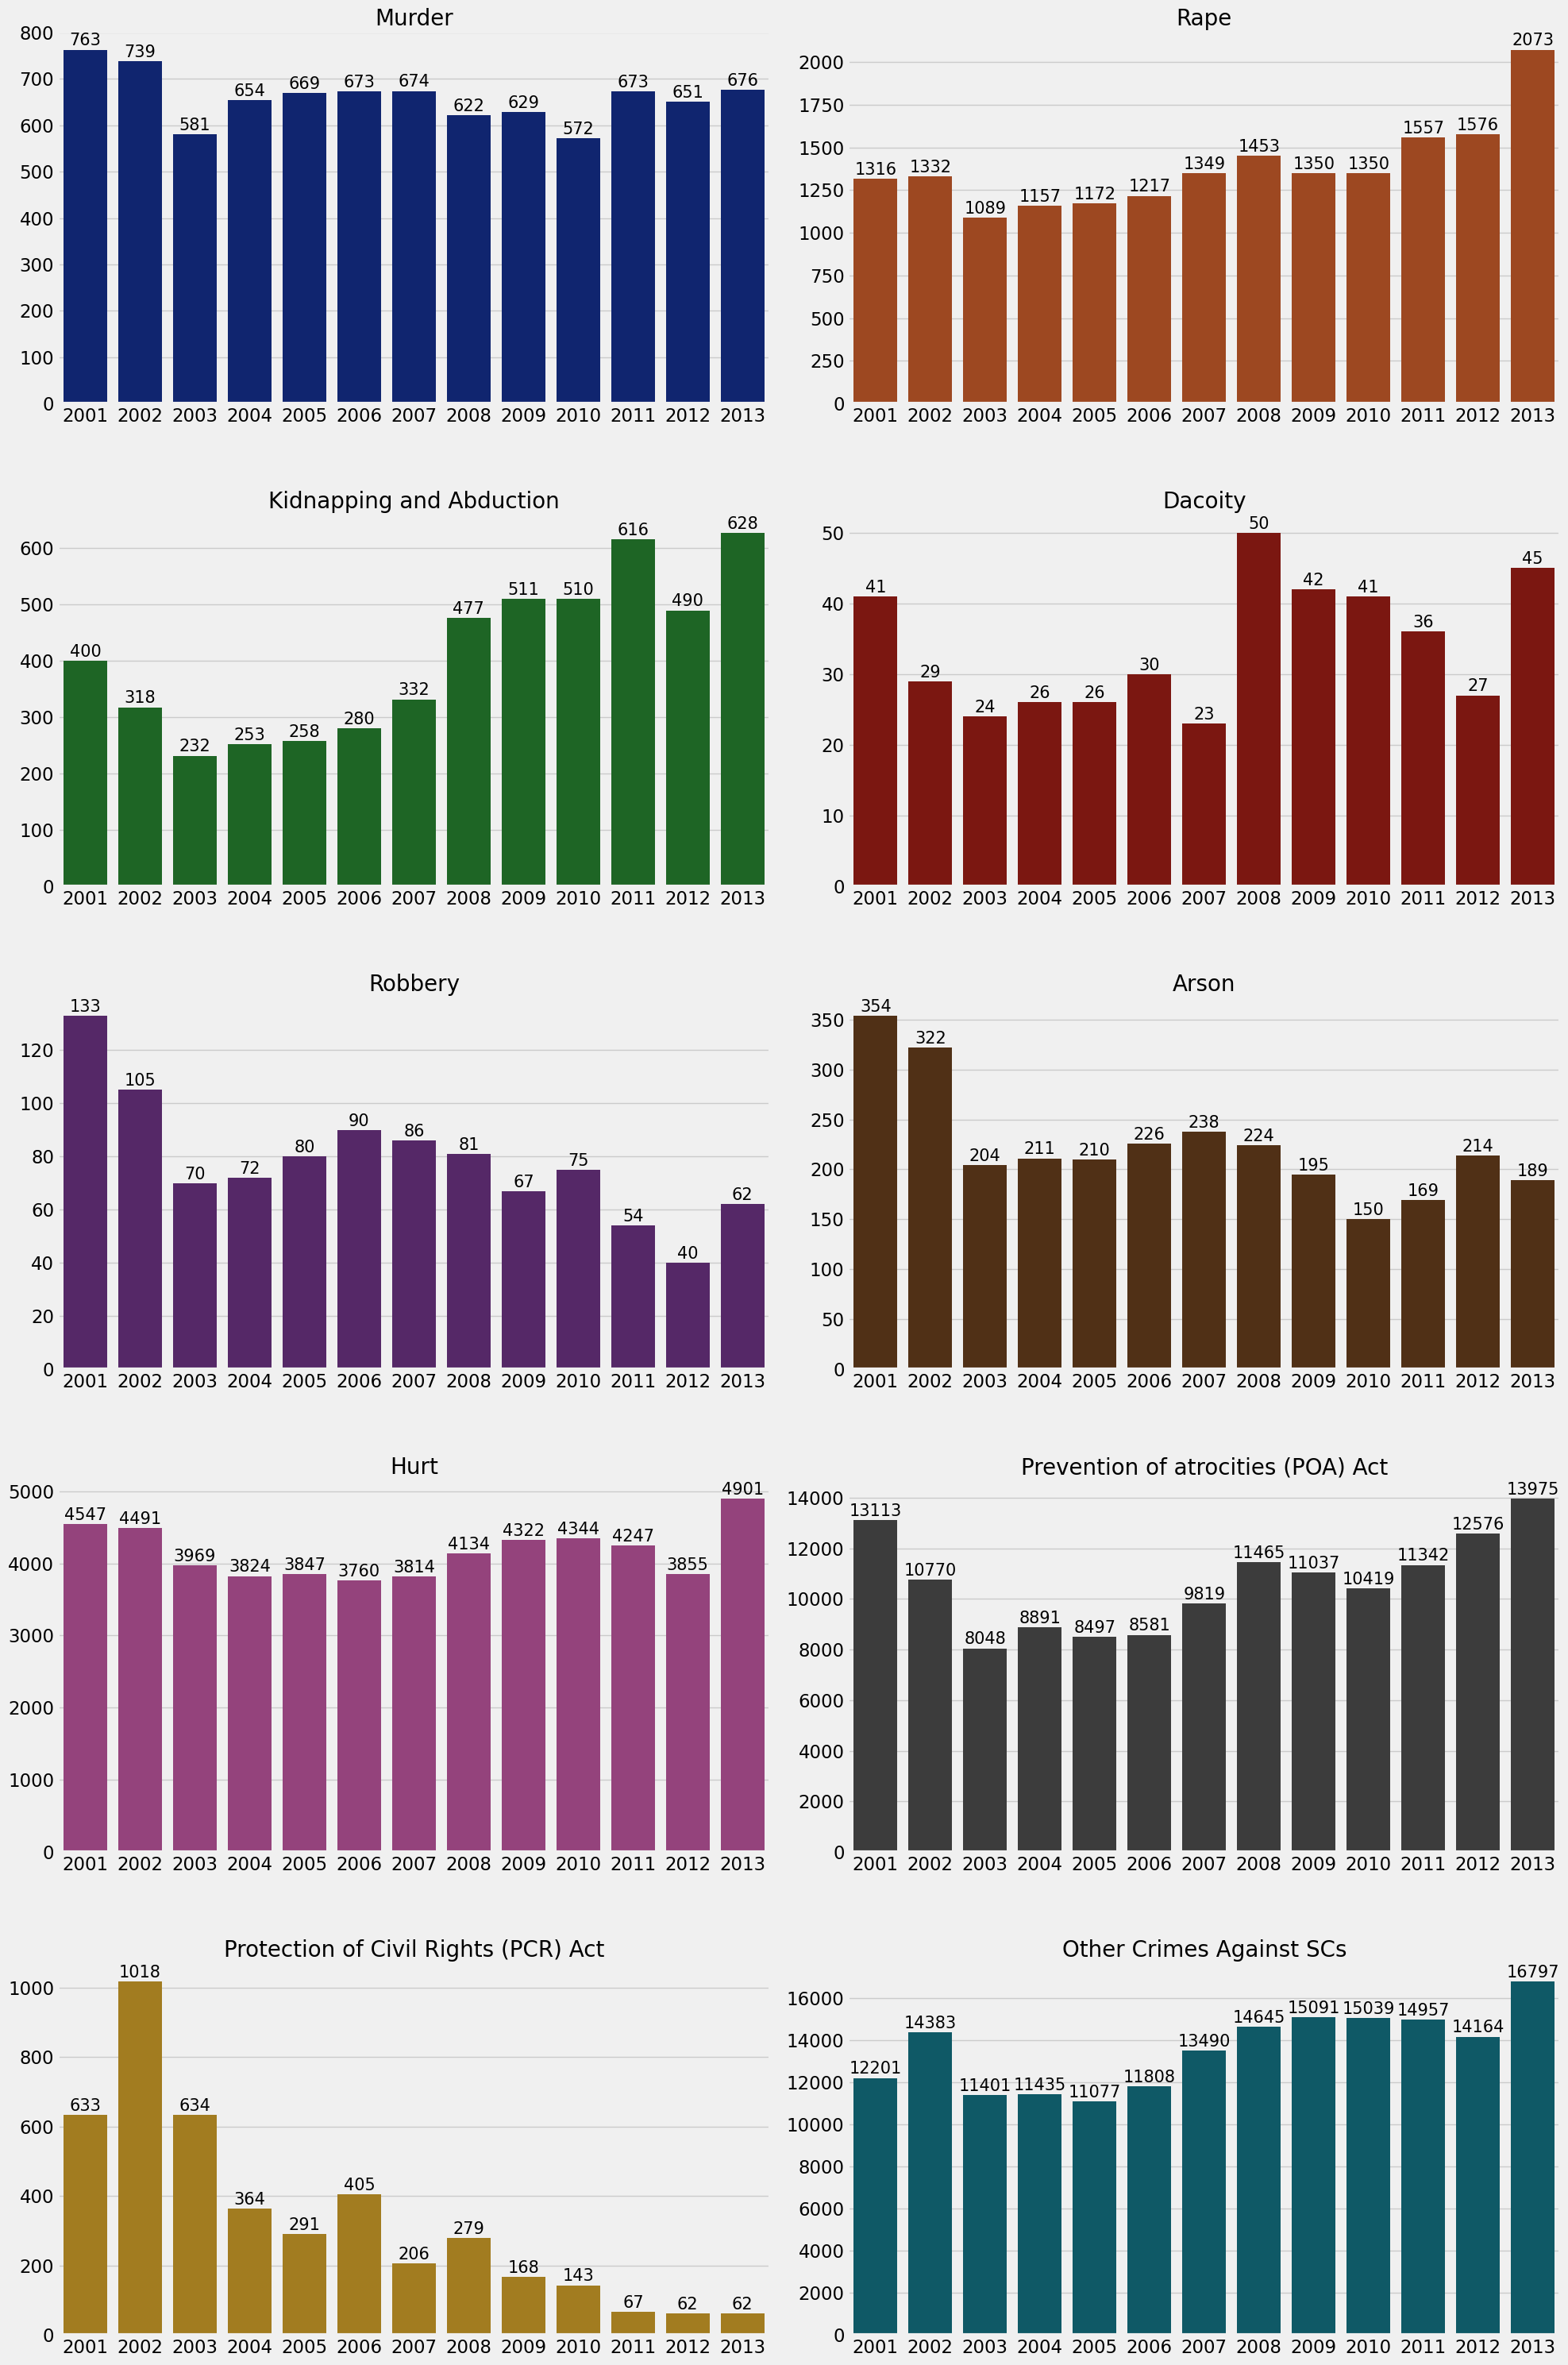

In [ ]:
scy2 = sc[sc.DISTRICT == 'Total']
scy2 = scy2.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

#Plotting Graphs
import itertools
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
columns = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scy2,x='Year',y= column ,color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [ ]:
scy = scy.append(scy.sum().rename('total'))
scy['Year'].replace(26091, 'Total', inplace=True)
scy = scy[scy['Year'] == 'Total']
scy_t = scy.T.reset_index()
scy_t

index   total
0                                   Year   Total
1                                 Murder    8576
2                                   Rape   17991
3               Kidnapping and Abduction    5305
4                                Dacoity     440
5                                Robbery    1015
6                                  Arson    2906
7                                   Hurt   54055
8     Prevention of atrocities (POA) Act  138533
9   Protection of Civil Rights (PCR) Act    4332
10              Other Crimes Against SCs  176488

In [ ]:
!pip install plotly
!pip install plotly==5.3.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import plotly.graph_objects as go

labels = ['Murder', 'Rape', 'Kidnapping', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Atrocities Act',
          'Civil Rights Act', 'Other Crimes']
values = [8576, 17991, 5305, 440, 1015, 2906, 54055, 138533, 4332, 176488]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
fig.update_layout(
    uniformtext_minsize=20,
    title_text="Distribution of Crimes Against SCs 2001-2013",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=700,
    height=700
)
fig.show()



In [ ]:
stateyr = sc[sc.DISTRICT == 'Total']
stateyr = stateyr.groupby(['Year','STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

In [ ]:
stateyr['sum'] =  stateyr.iloc[:, 2:].sum(axis=1)

In [ ]:
stateyr2 = stateyr.groupby('STATE/UT')['sum'].sum().reset_index()

In [ ]:
stateyr2 = stateyr2.sort_values('sum', ascending = False)

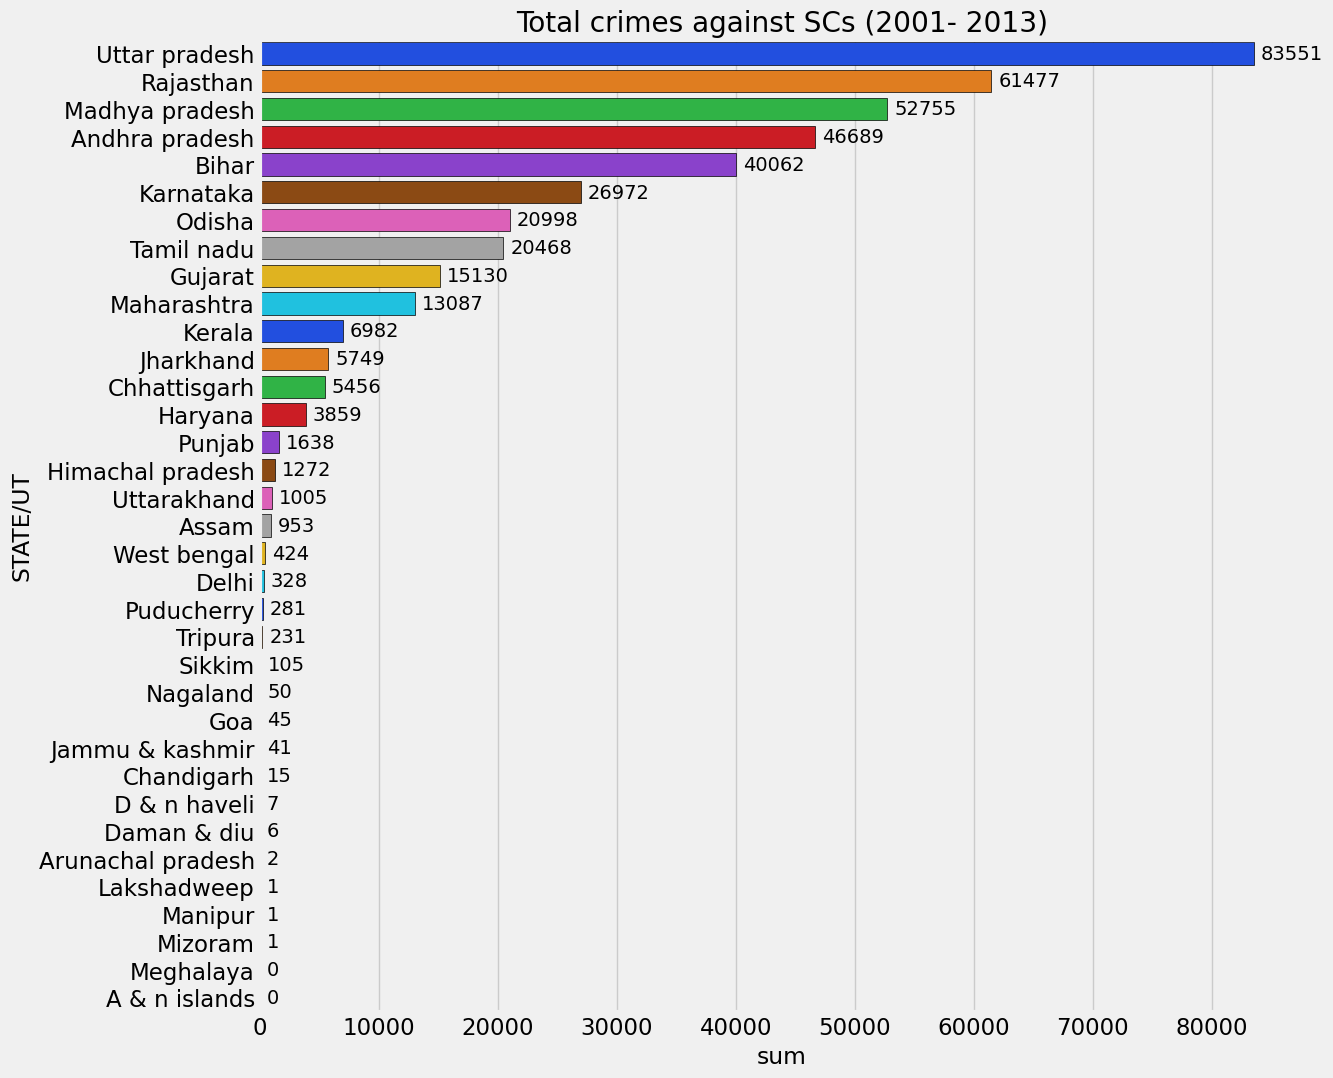

In [ ]:
plt.figure(figsize = (12,12))
sns.set_context("talk")
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'sum', y = 'STATE/UT', data = stateyr2, palette = 'bright', edgecolor = 'black')
plt.title('Total crimes against SCs (2001- 2013)')
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

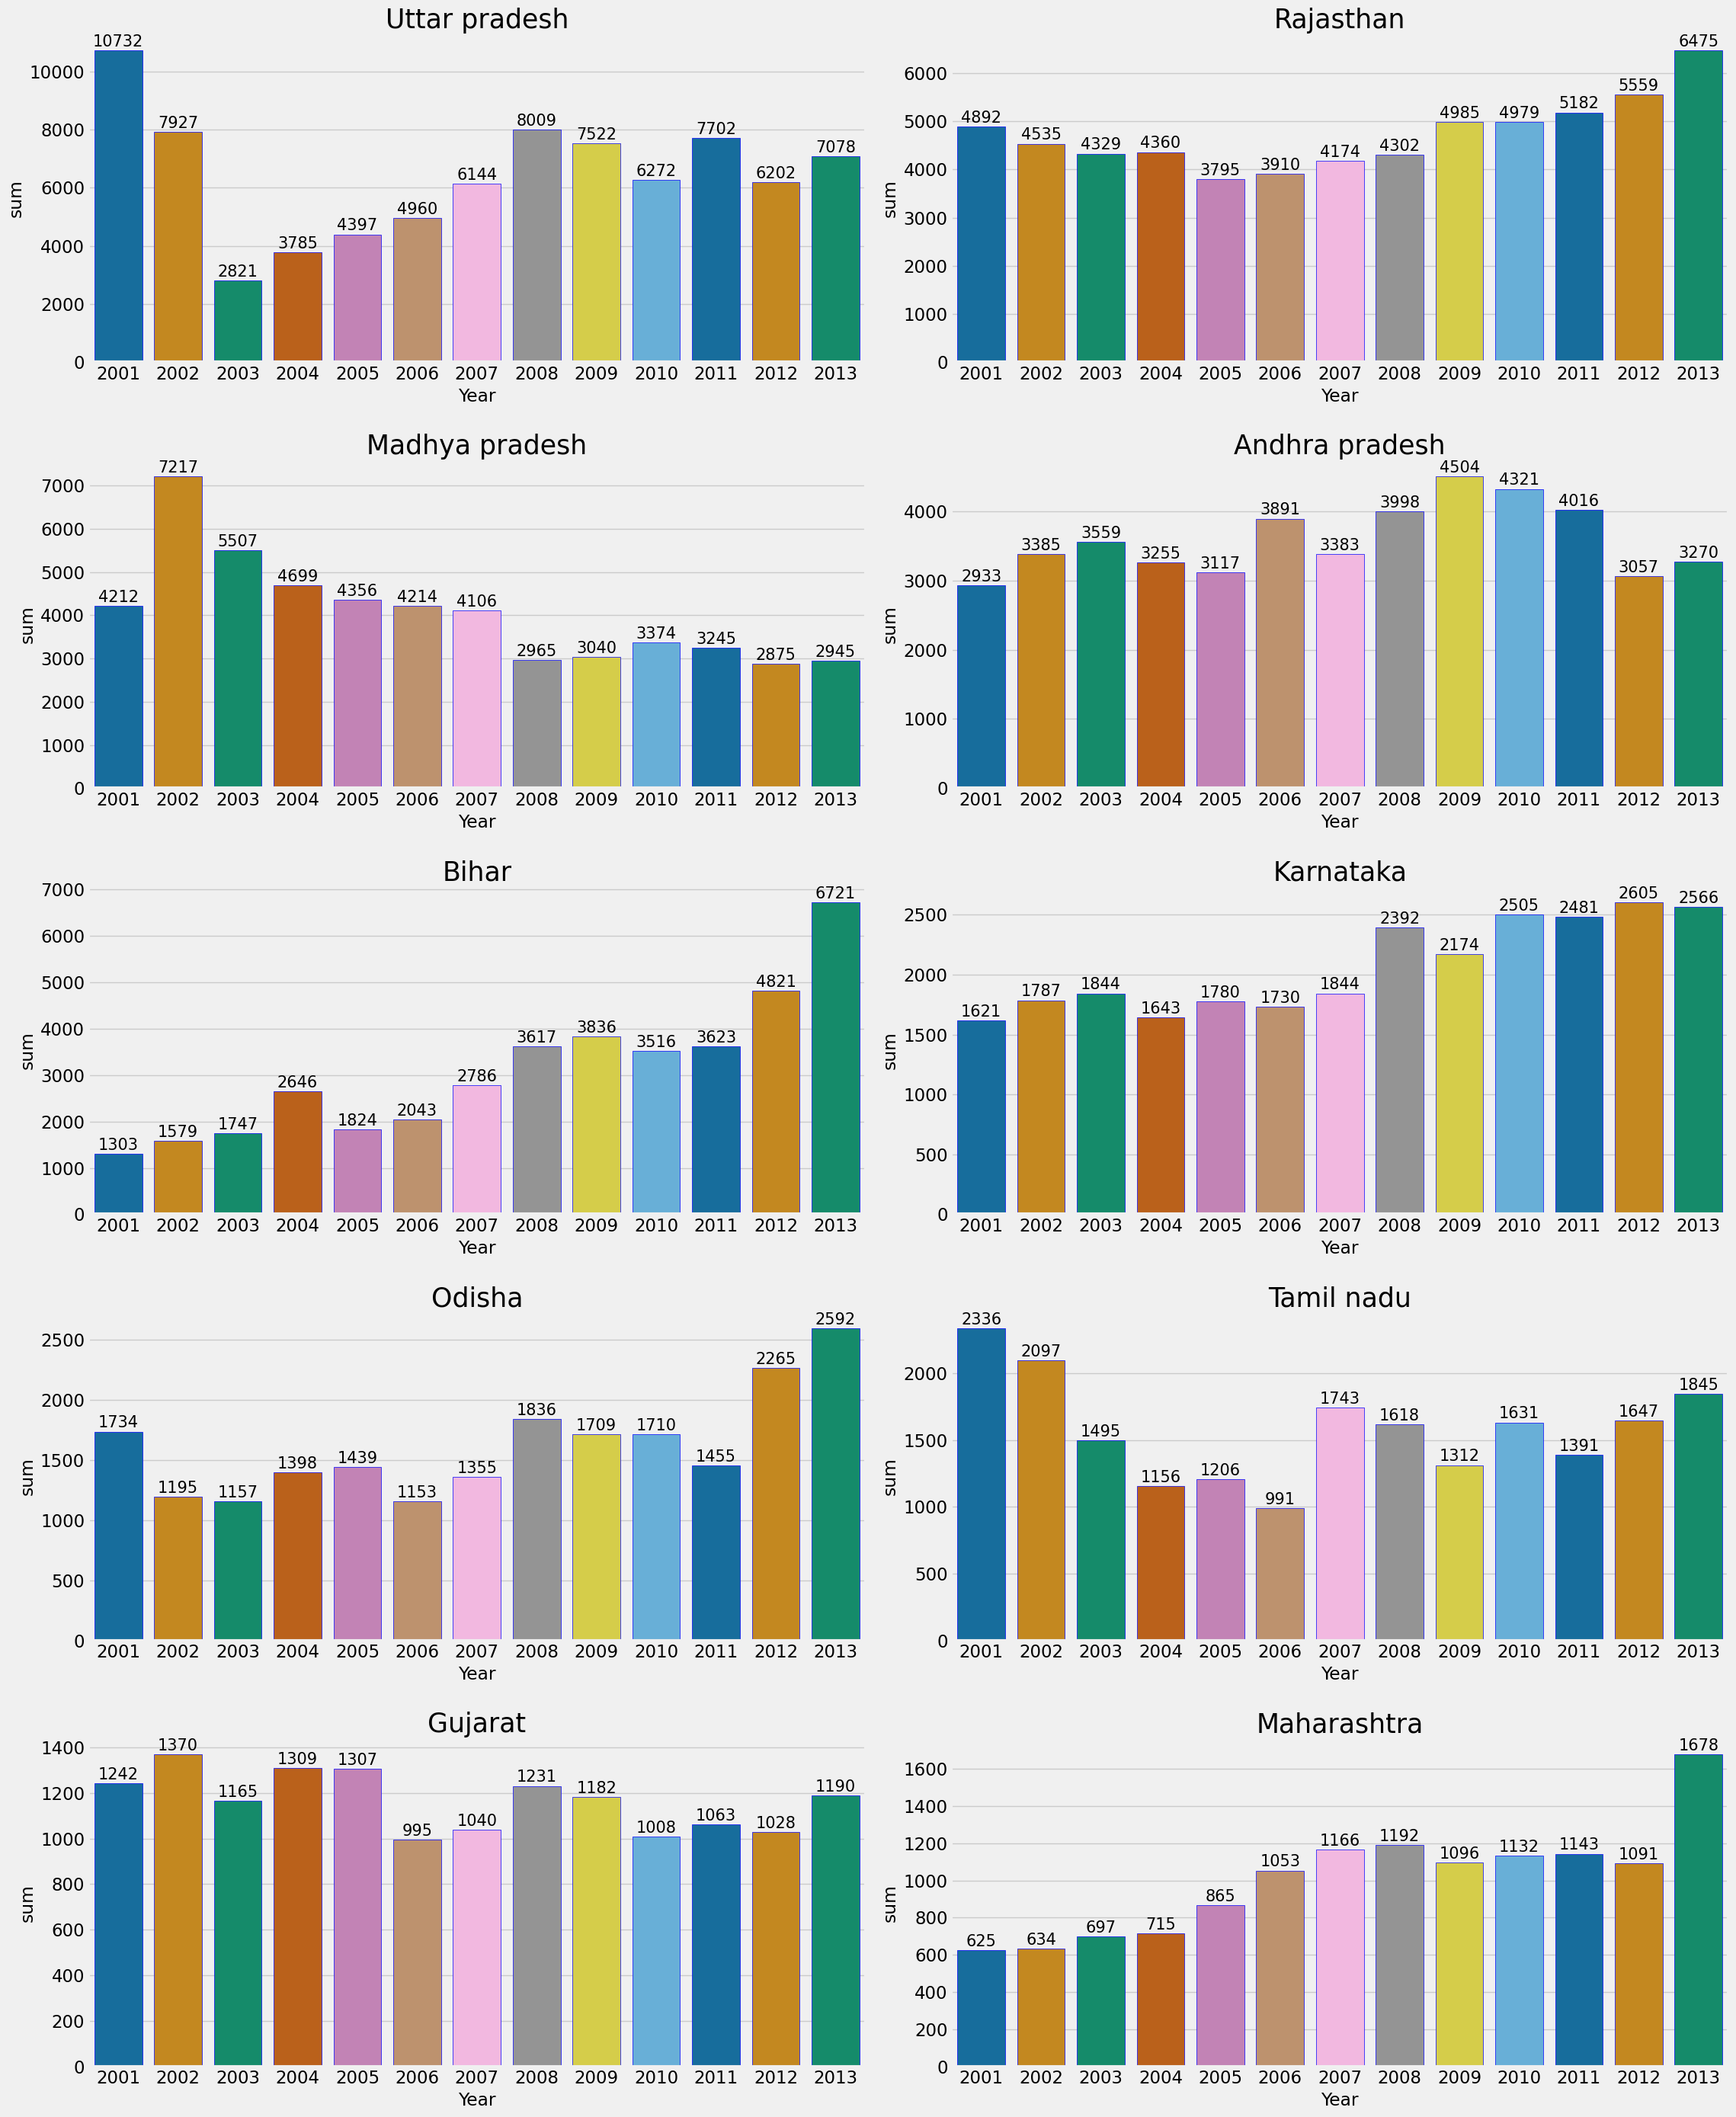

In [ ]:
states = ['Uttar pradesh','Rajasthan' ,'Madhya pradesh' , 'Andhra pradesh', 'Bihar', 'Karnataka' , 'Odisha' , 'Tamil nadu','Gujarat', 'Maharashtra']
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (23,28))
plt.title('Total crimes against SCs (2001- 2013)')
for i, s in enumerate(states):
    plt.subplot(5,2,i+1)
    stateyr3 = stateyr[stateyr['STATE/UT'] == s]
    ax = sns.barplot(x = 'Year' , y = 'sum' , data = stateyr3,ci=None , palette = 'colorblind' , edgecolor = 'blue')
    plt.title(s , size = 25)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.tight_layout()
plt.subplots_adjust(hspace= .3)

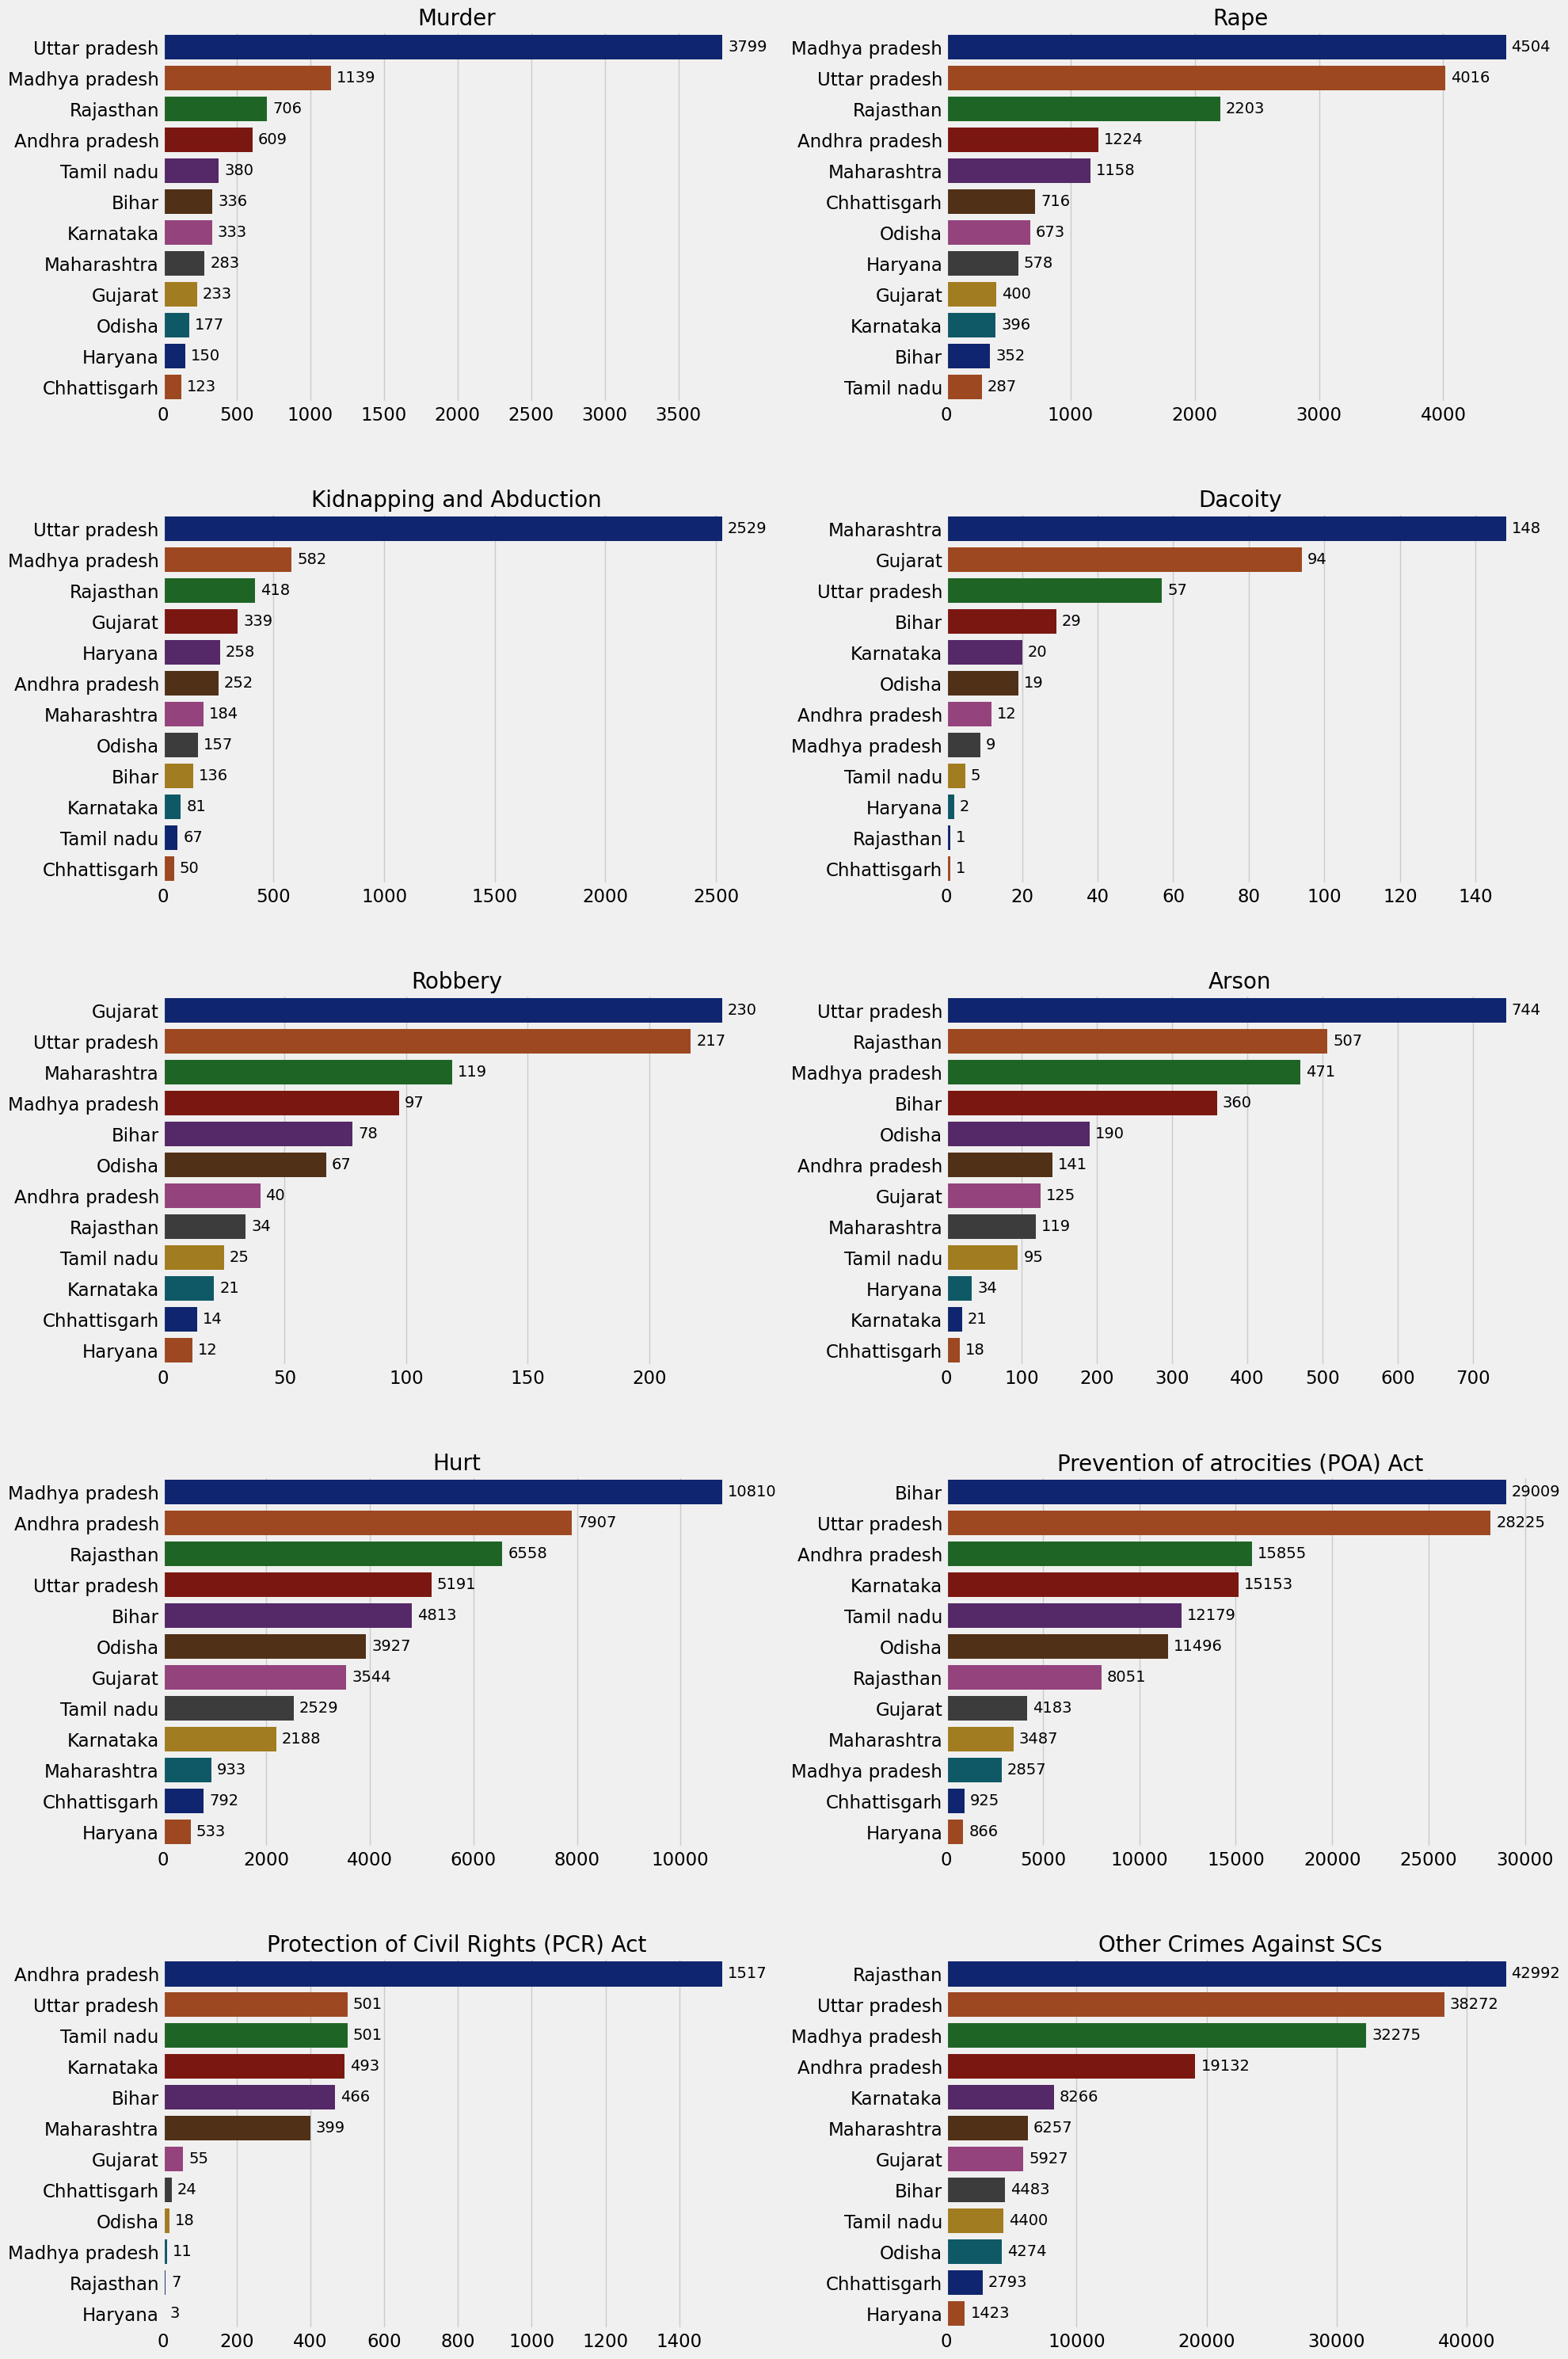

In [ ]:
scs = sc[sc.DISTRICT == 'Total']
scs = scs.groupby(['STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

scs1 = scs[(scs.Murder > 100) & (scs.Rape > 100)]
sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scs1 = scs1.sort_values(column,ascending = False)
    plt.subplot(5,2,i+1)
    ax = sns.barplot(data= scs1,x= column ,y='STATE/UT',palette = 'dark' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")




plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [ ]:
scs['sum'] = scs.sum(axis = 1)

In [ ]:
new_row = scs.iloc[[1]]
scs = scs.append(new_row, ignore_index = True)
scs.at[35, 'STATE/UT']= 'Telangana'
scs.at[9,'STATE/UT'] = 'Nct of Delhi'

gdf = gpd.read_file("/content/drive/MyDrive/Dataset/Indian_States.shx")

gdf.st_nm = gdf.st_nm.str.lower()
scs['STATE/UT'] = scs['STATE/UT'].str.lower()

merged = gdf.merge(scs , left_on='st_nm', right_on='STATE/UT')
merged1 = merged.drop(['STATE/UT'], axis=1)

In [ ]:
!pip install pysal
!pip install mapclassify


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

IndexError: list index out of range

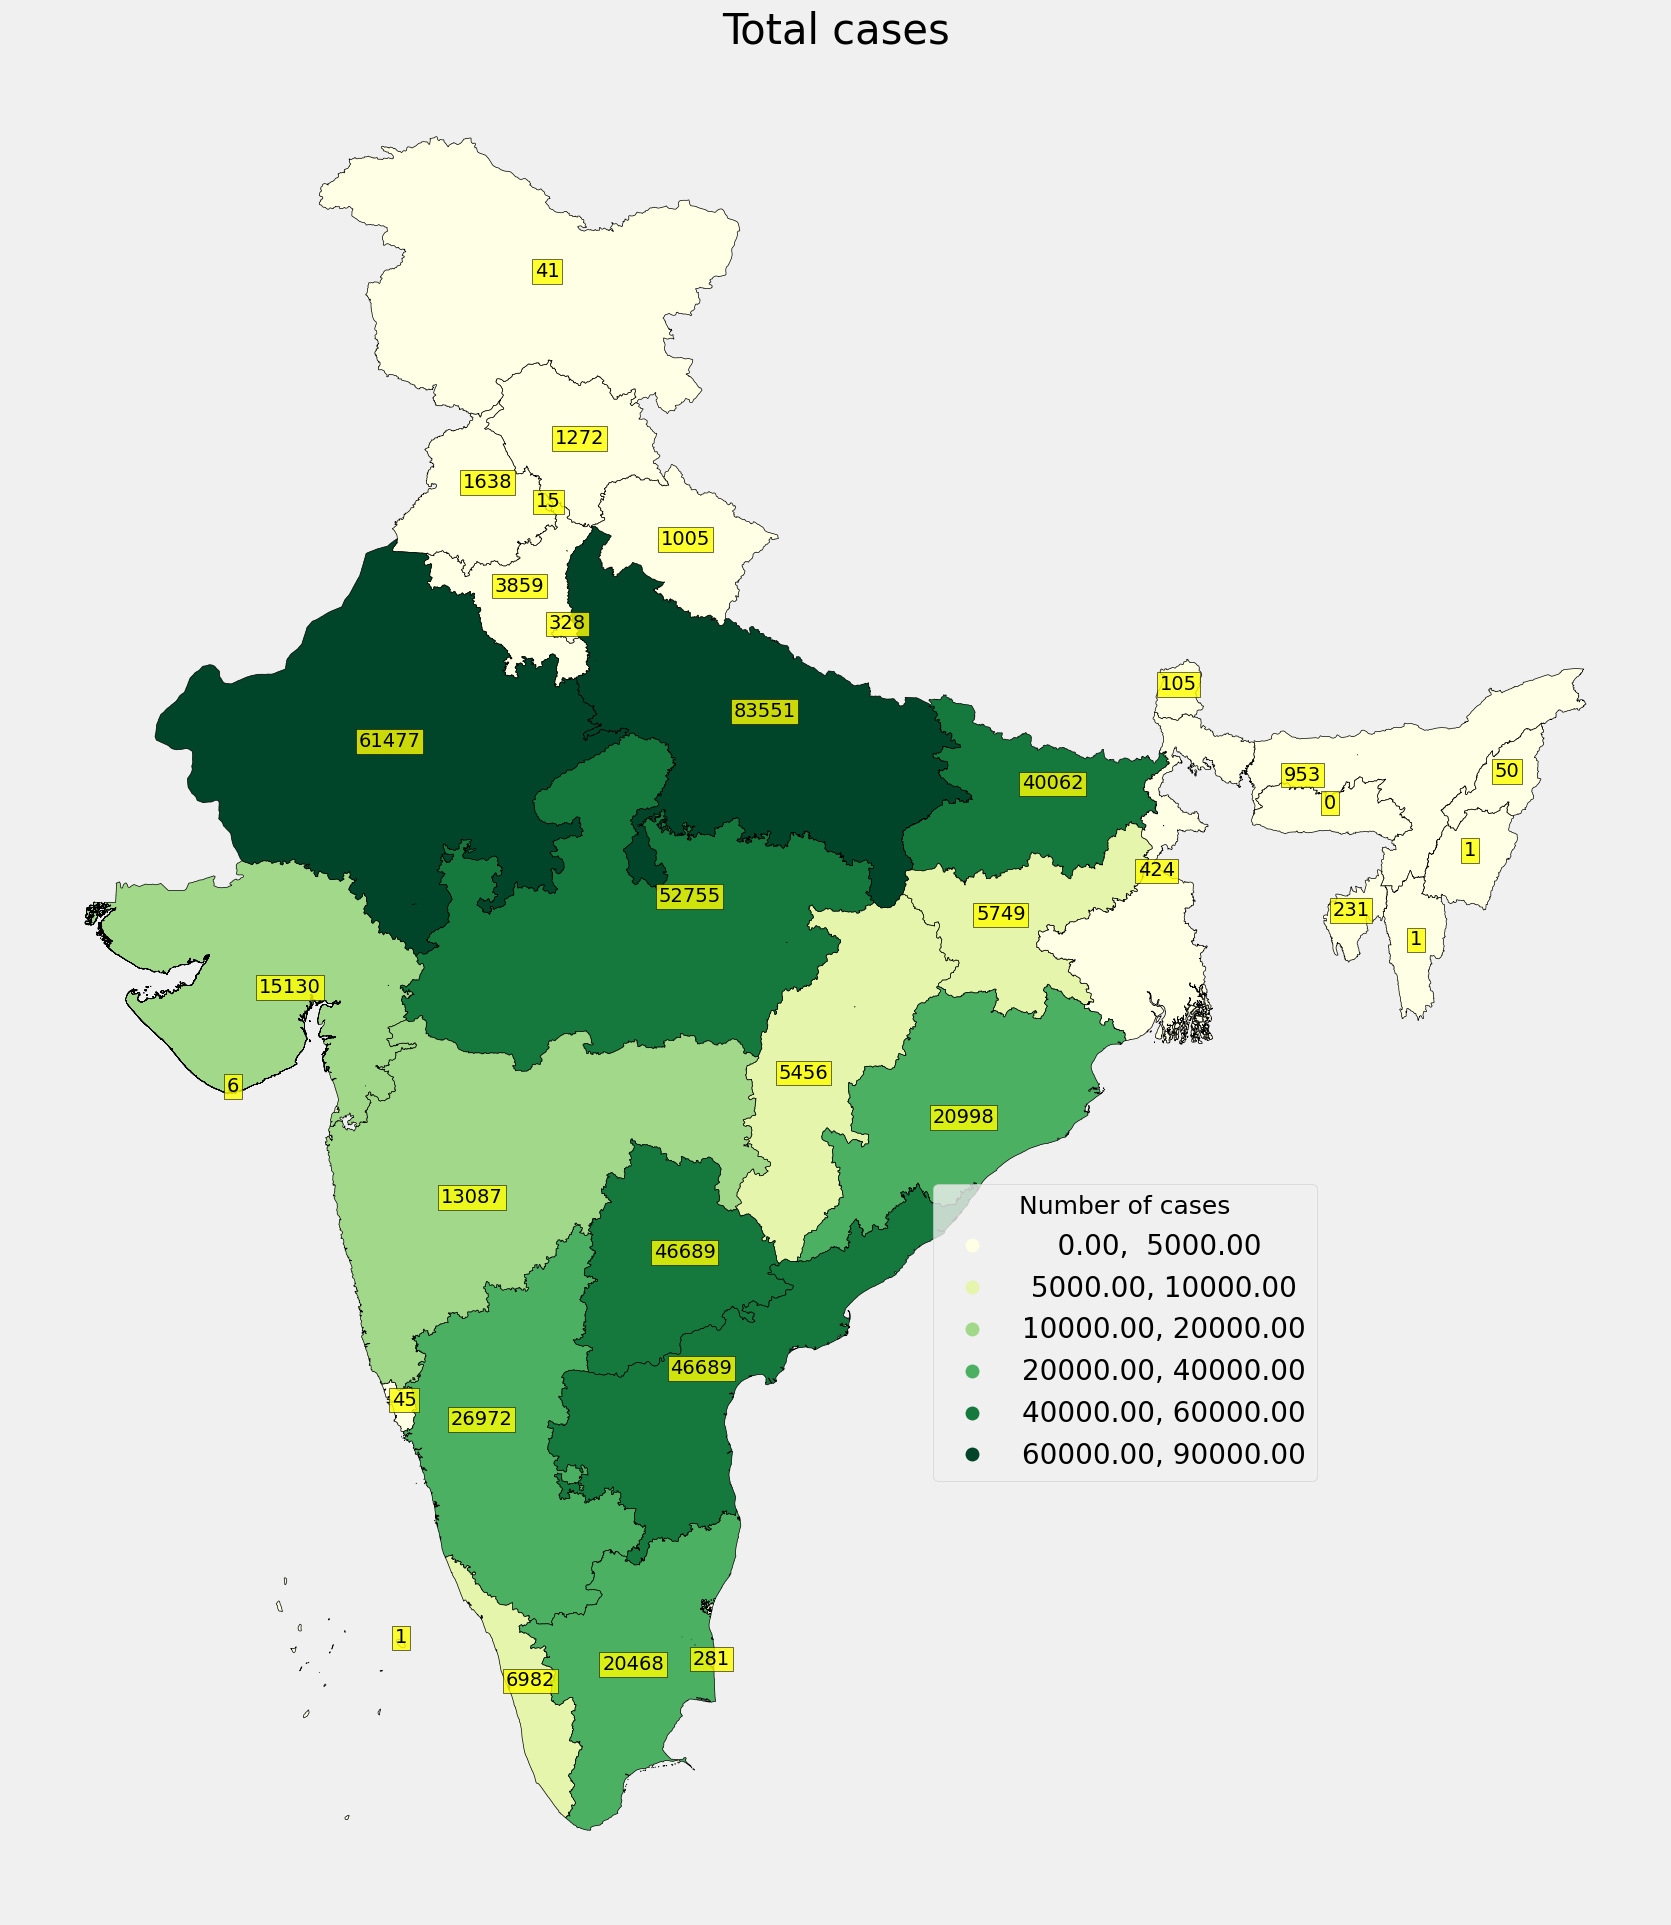

In [ ]:
import pysal.viz.mapclassify
import mapclassify
figsize = (25, 23)
merged1['coords'] = merged1['geometry'].apply(lambda x: x.representative_point().coords[:])
merged1['coords'] = [coords[0] for coords in merged1['coords']]
colors = 8

import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

ax= merged1.dropna().plot(column= 'sum', figsize=figsize, scheme= 'User_Defined',cmap = 'YlGn',edgecolor='black',k = colors,legend = True, classification_kwds=dict(bins=[5000,10000,20000,40000,60000,90000]) )
ax.set_title(" Total Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['sum'], horizontalalignment='center', bbox={'facecolor': 'yellow', 'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.8, 0.4))
ax.get_legend().set_title('Number of cases')

ax.set_title("Total cases" , size = 30)
ax.axis('off')
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)


plt.axis('equal')

plt.show()

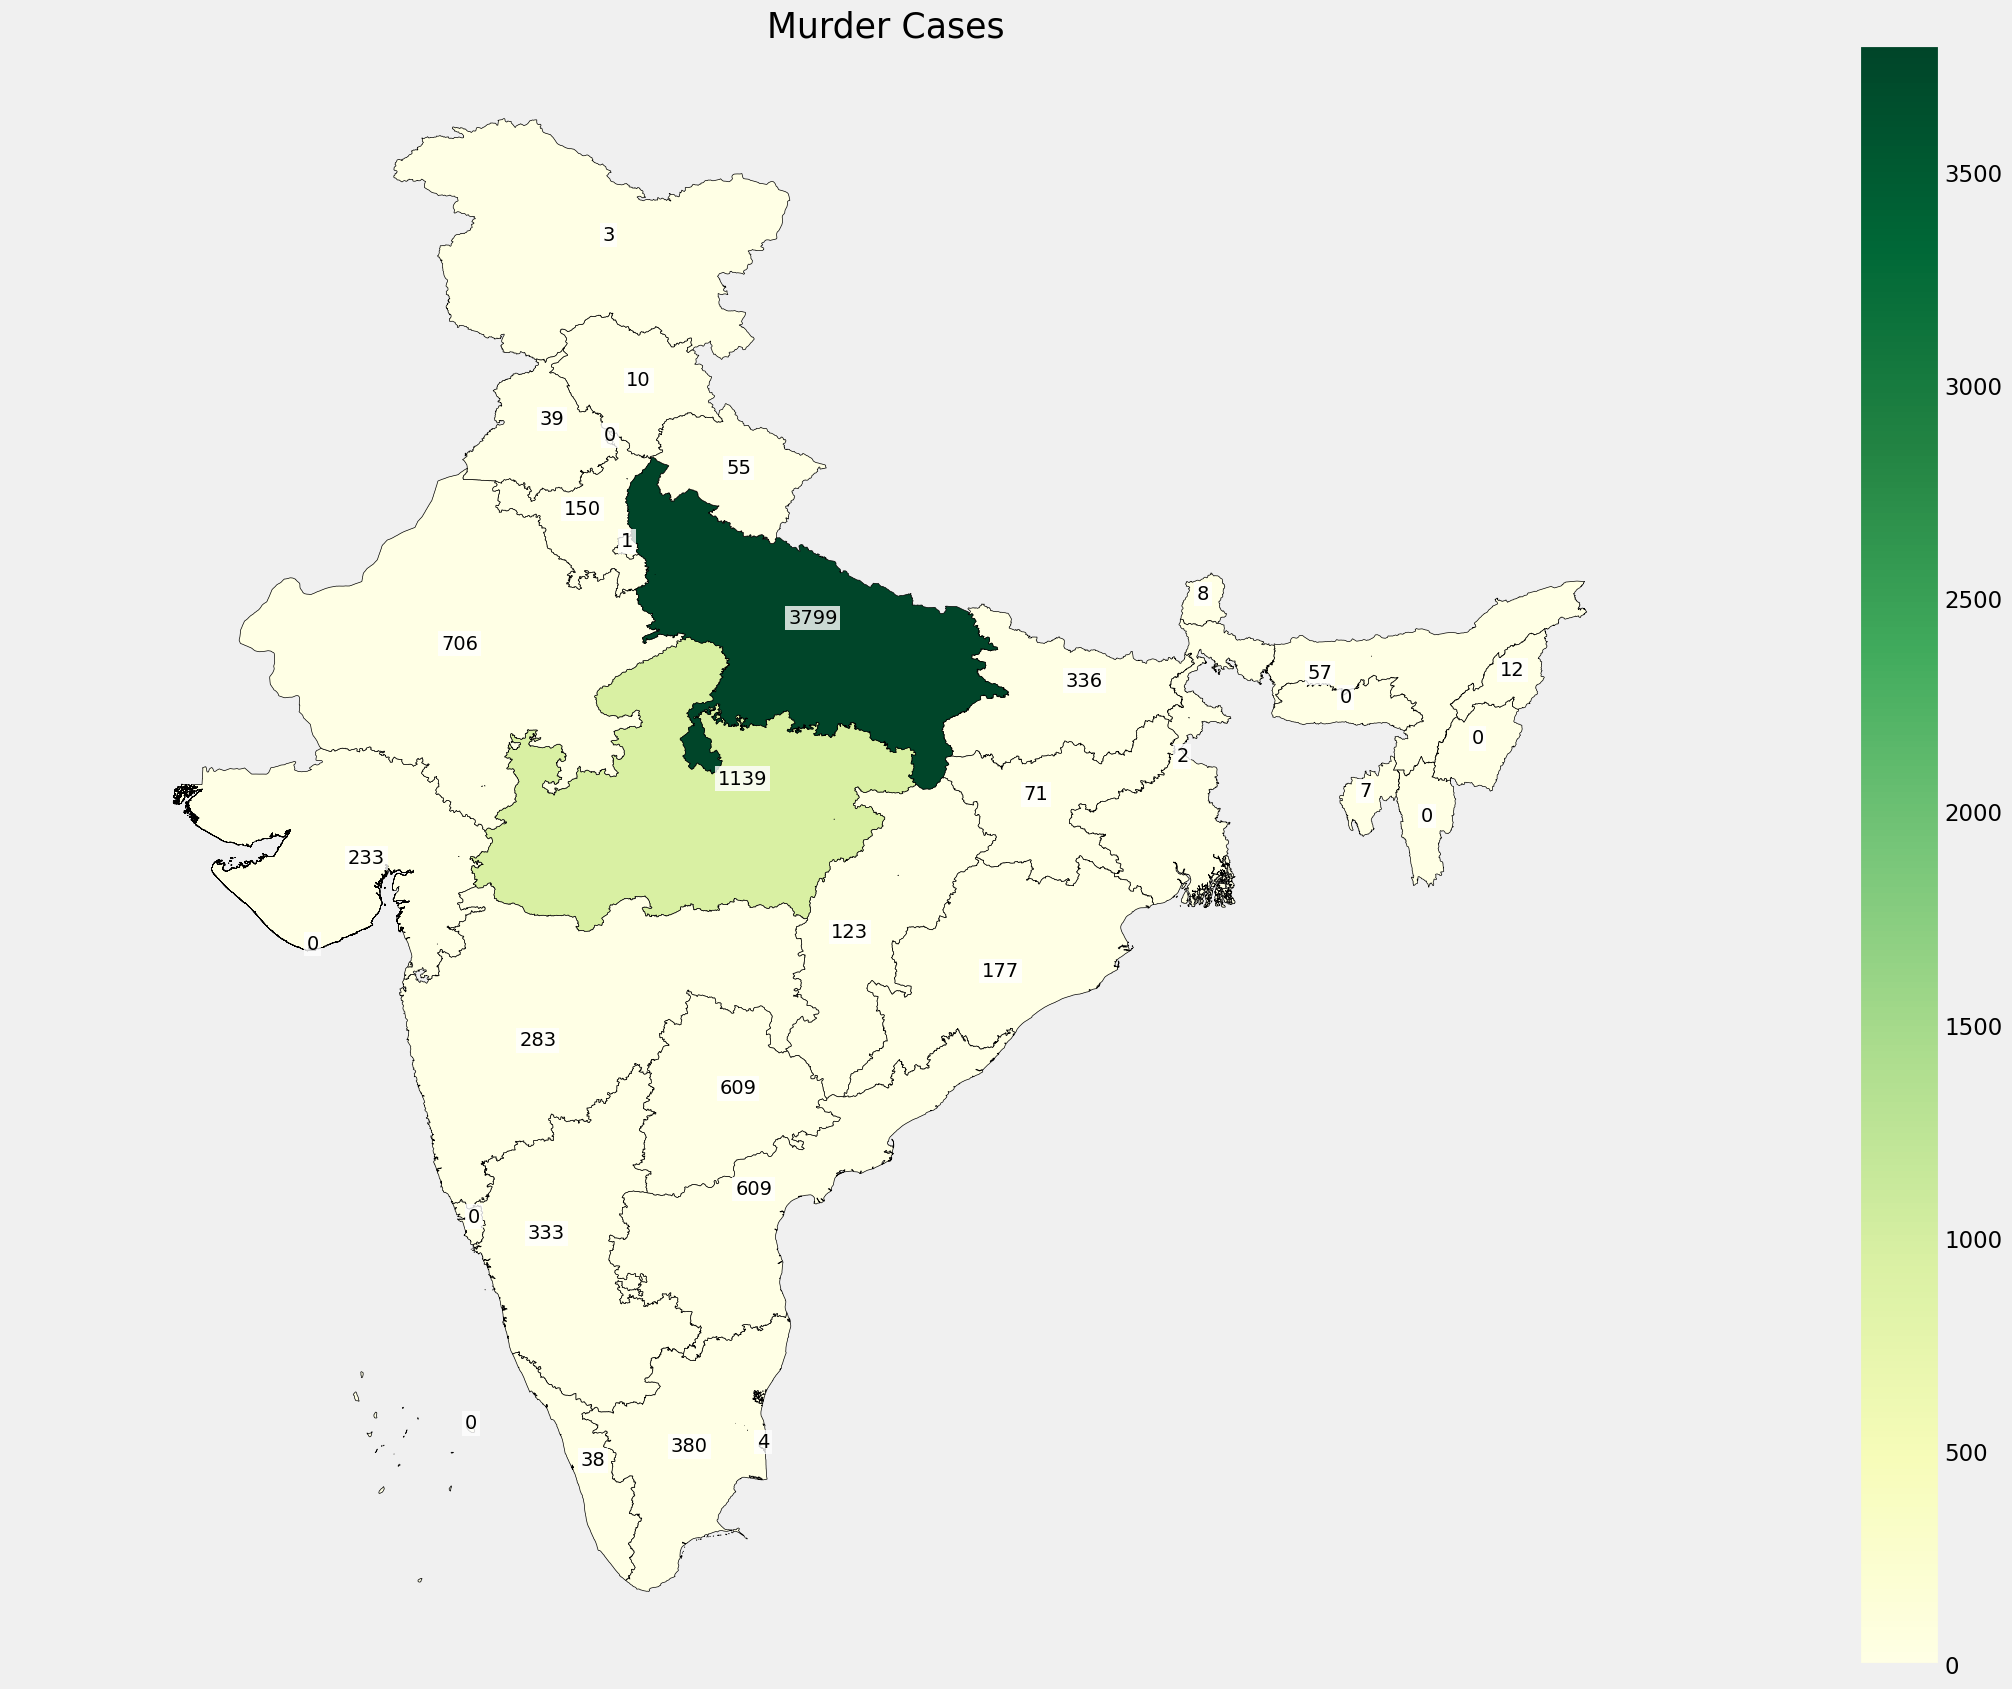

In [ ]:
figsize = (25, 20)

cmap = 'YlGn'
ax= merged1.dropna().plot(column= 'Murder', cmap= cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Murder Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Murder'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=merged1['Murder'].min(), vmax= merged1['Murder'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

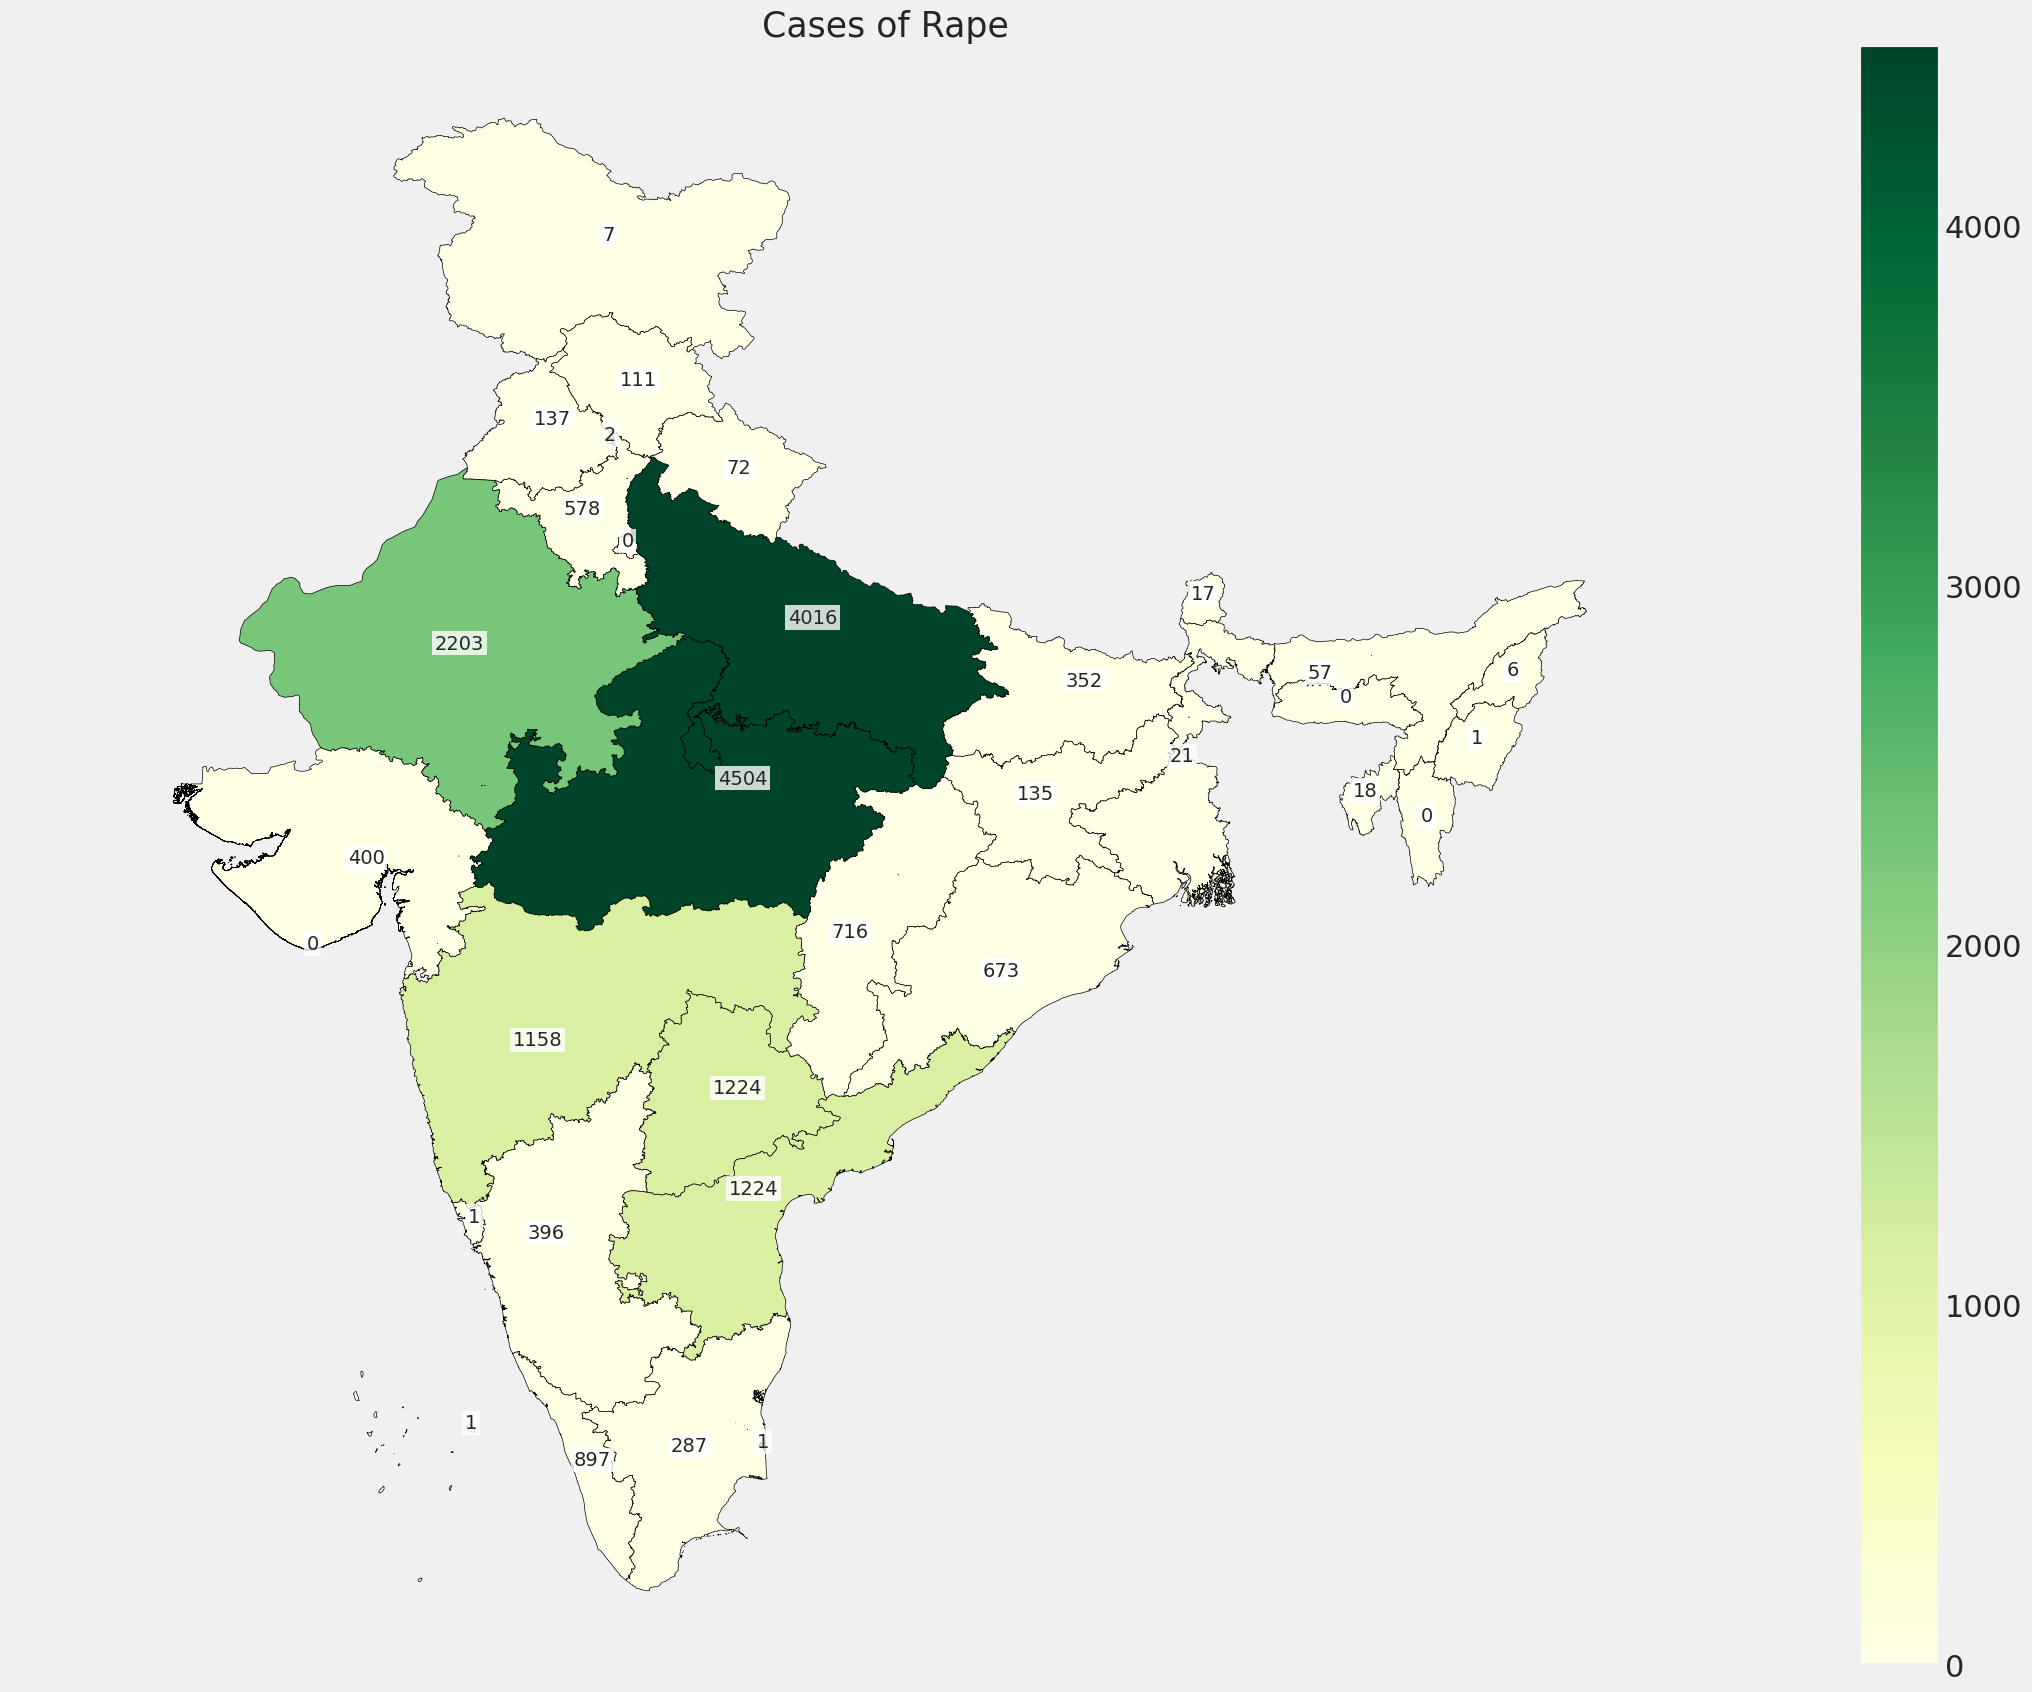

In [ ]:
from matplotlib.colors import Normalize
from matplotlib import cm

sns.set_context("poster")
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Rape', cmap= cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Cases of Rape", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Rape'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Rape'].min(), vmax= merged1['Rape'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

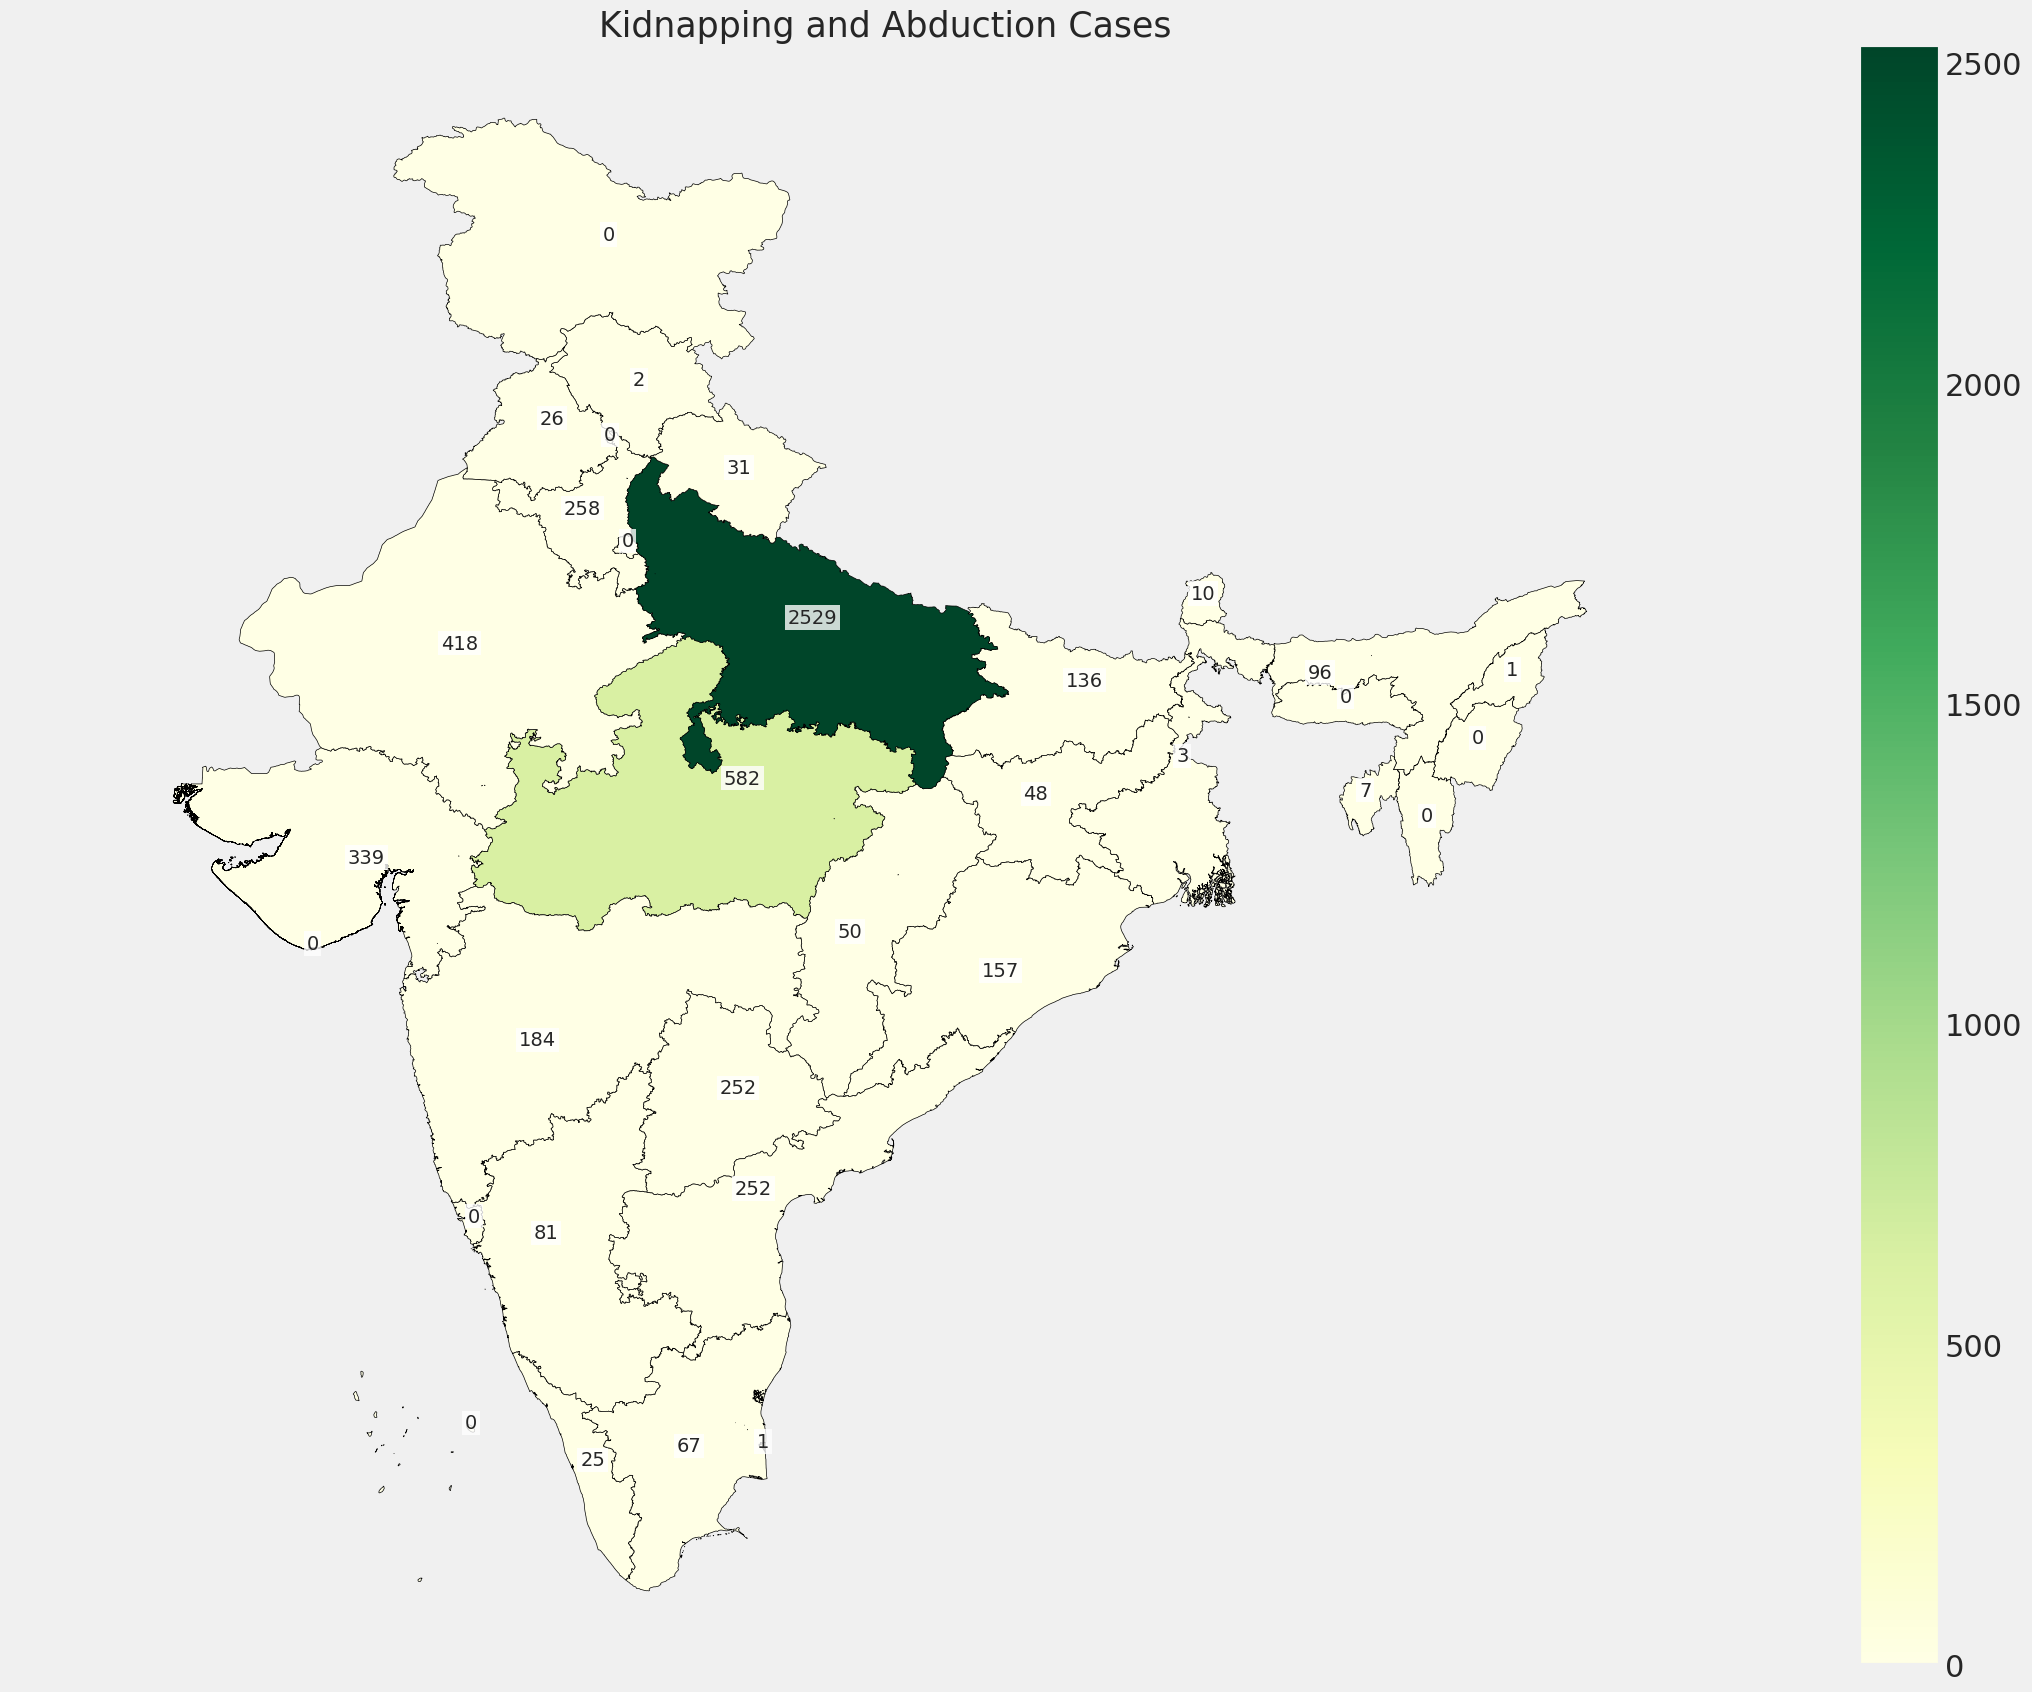

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Kidnapping and Abduction', cmap= cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Kidnapping and Abduction Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Kidnapping and Abduction'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Kidnapping and Abduction'].min(), vmax= merged1['Kidnapping and Abduction'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

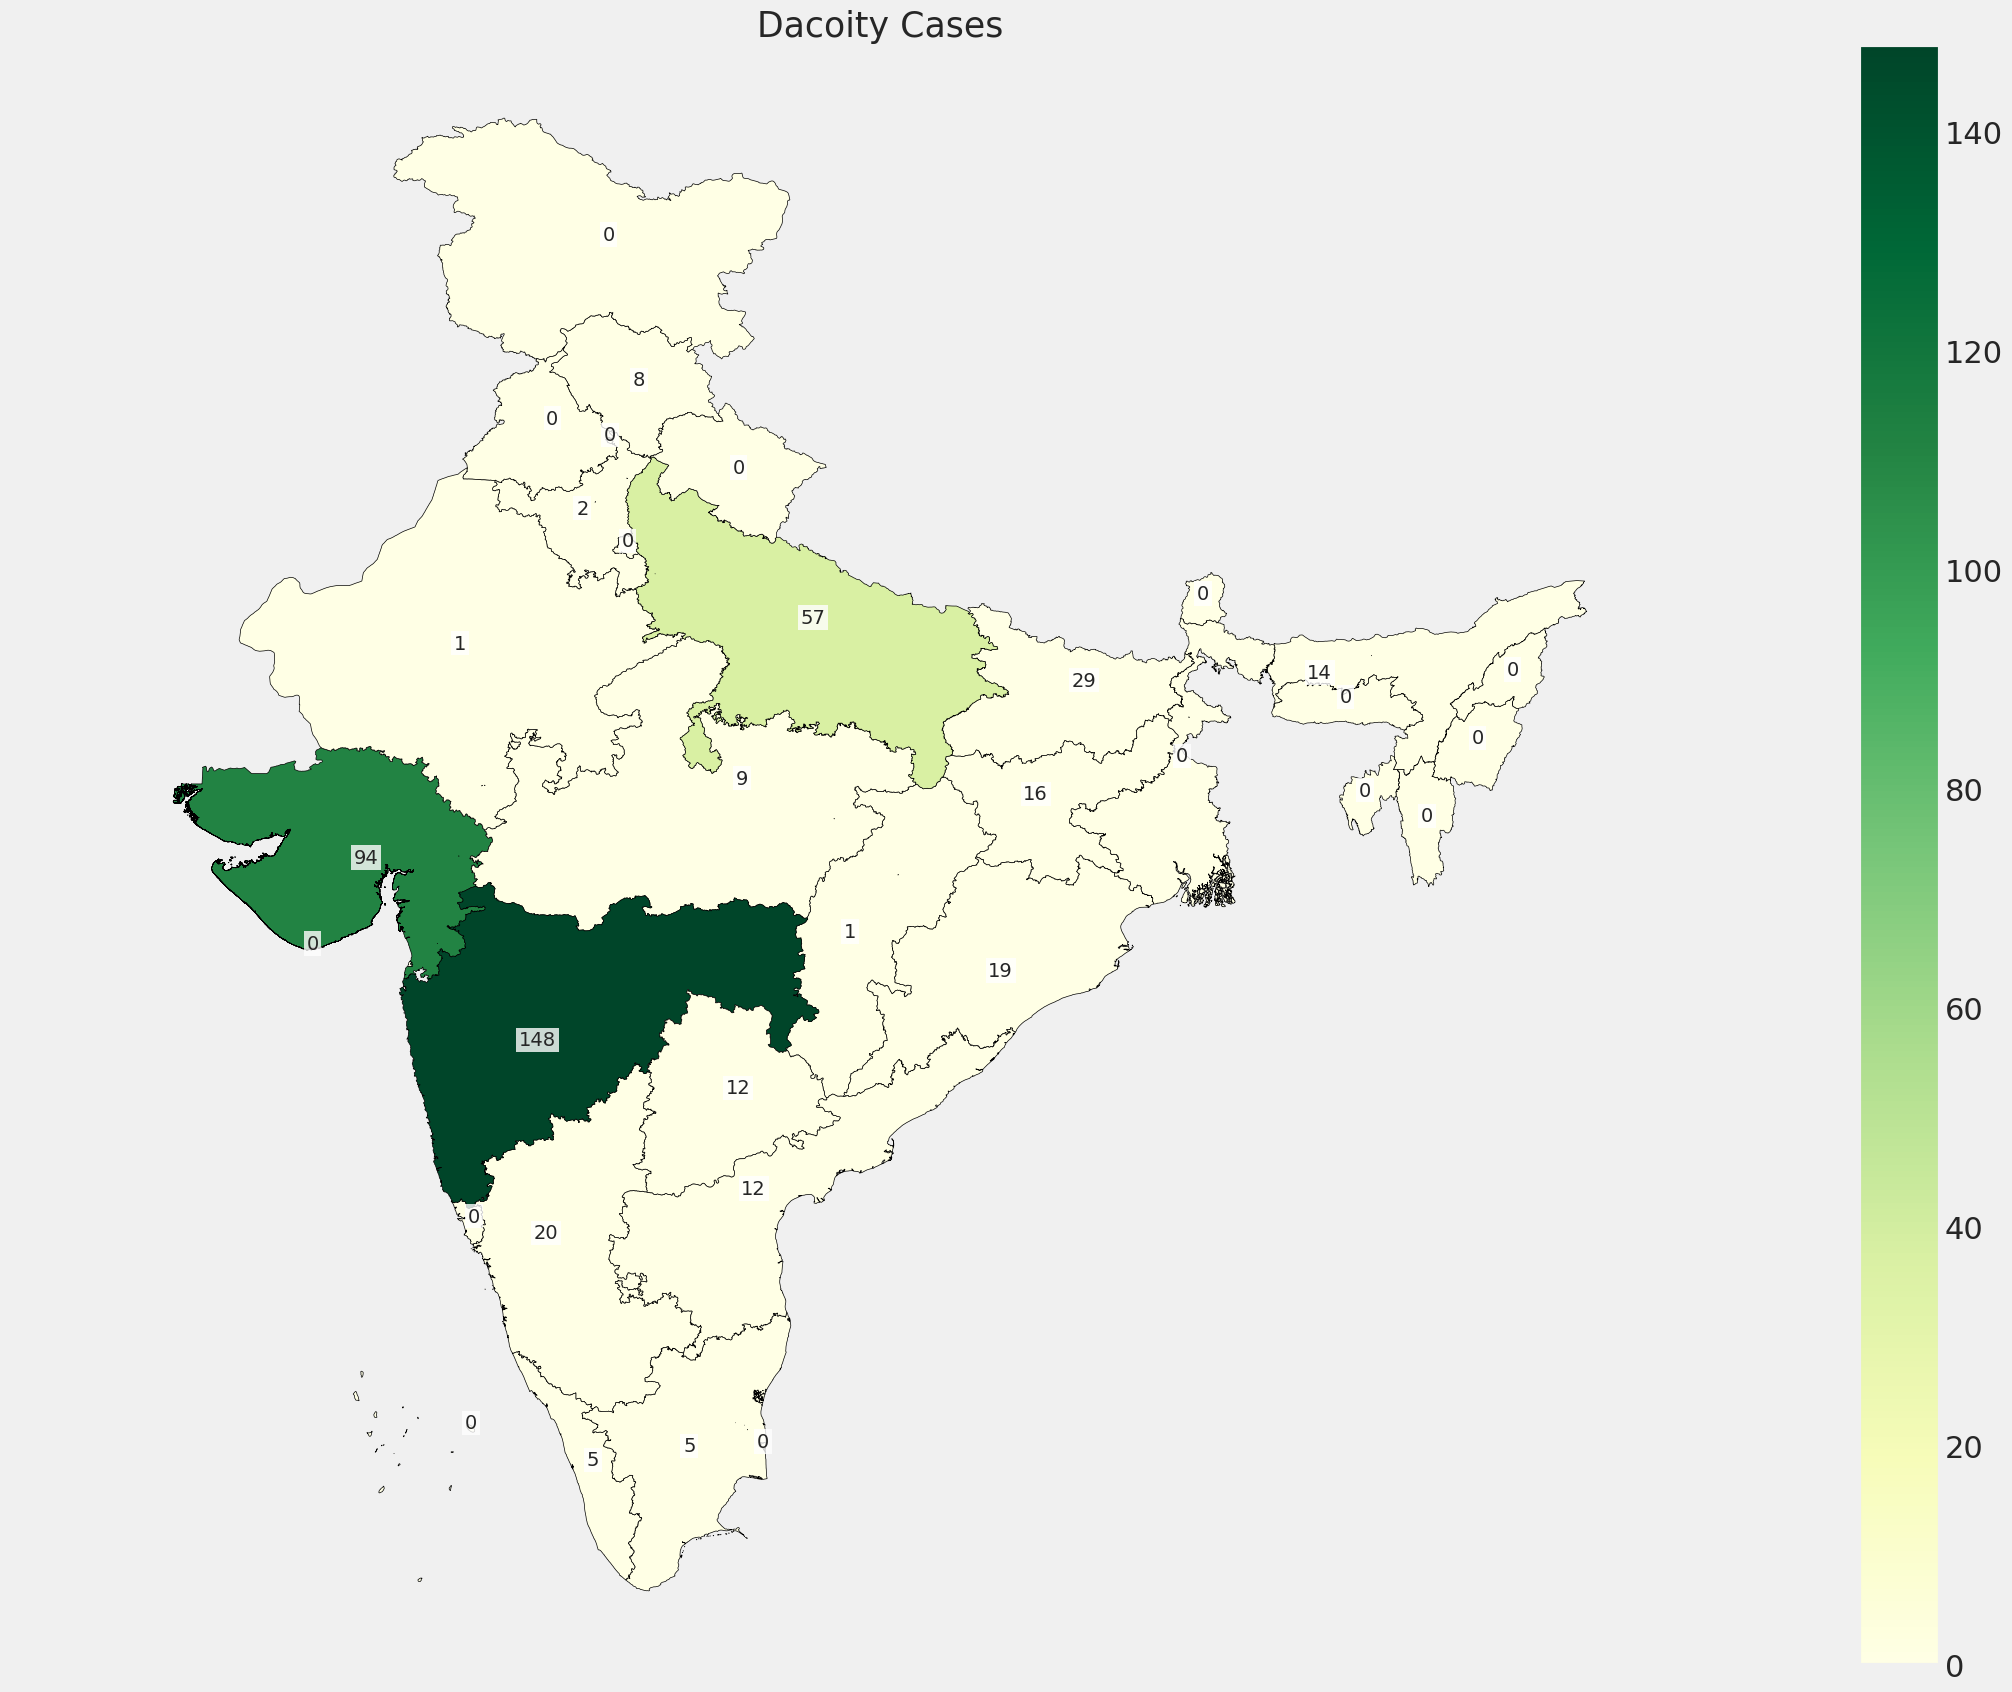

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Dacoity', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title("Dacoity Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Dacoity'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Dacoity'].min(), vmax= merged1['Dacoity'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

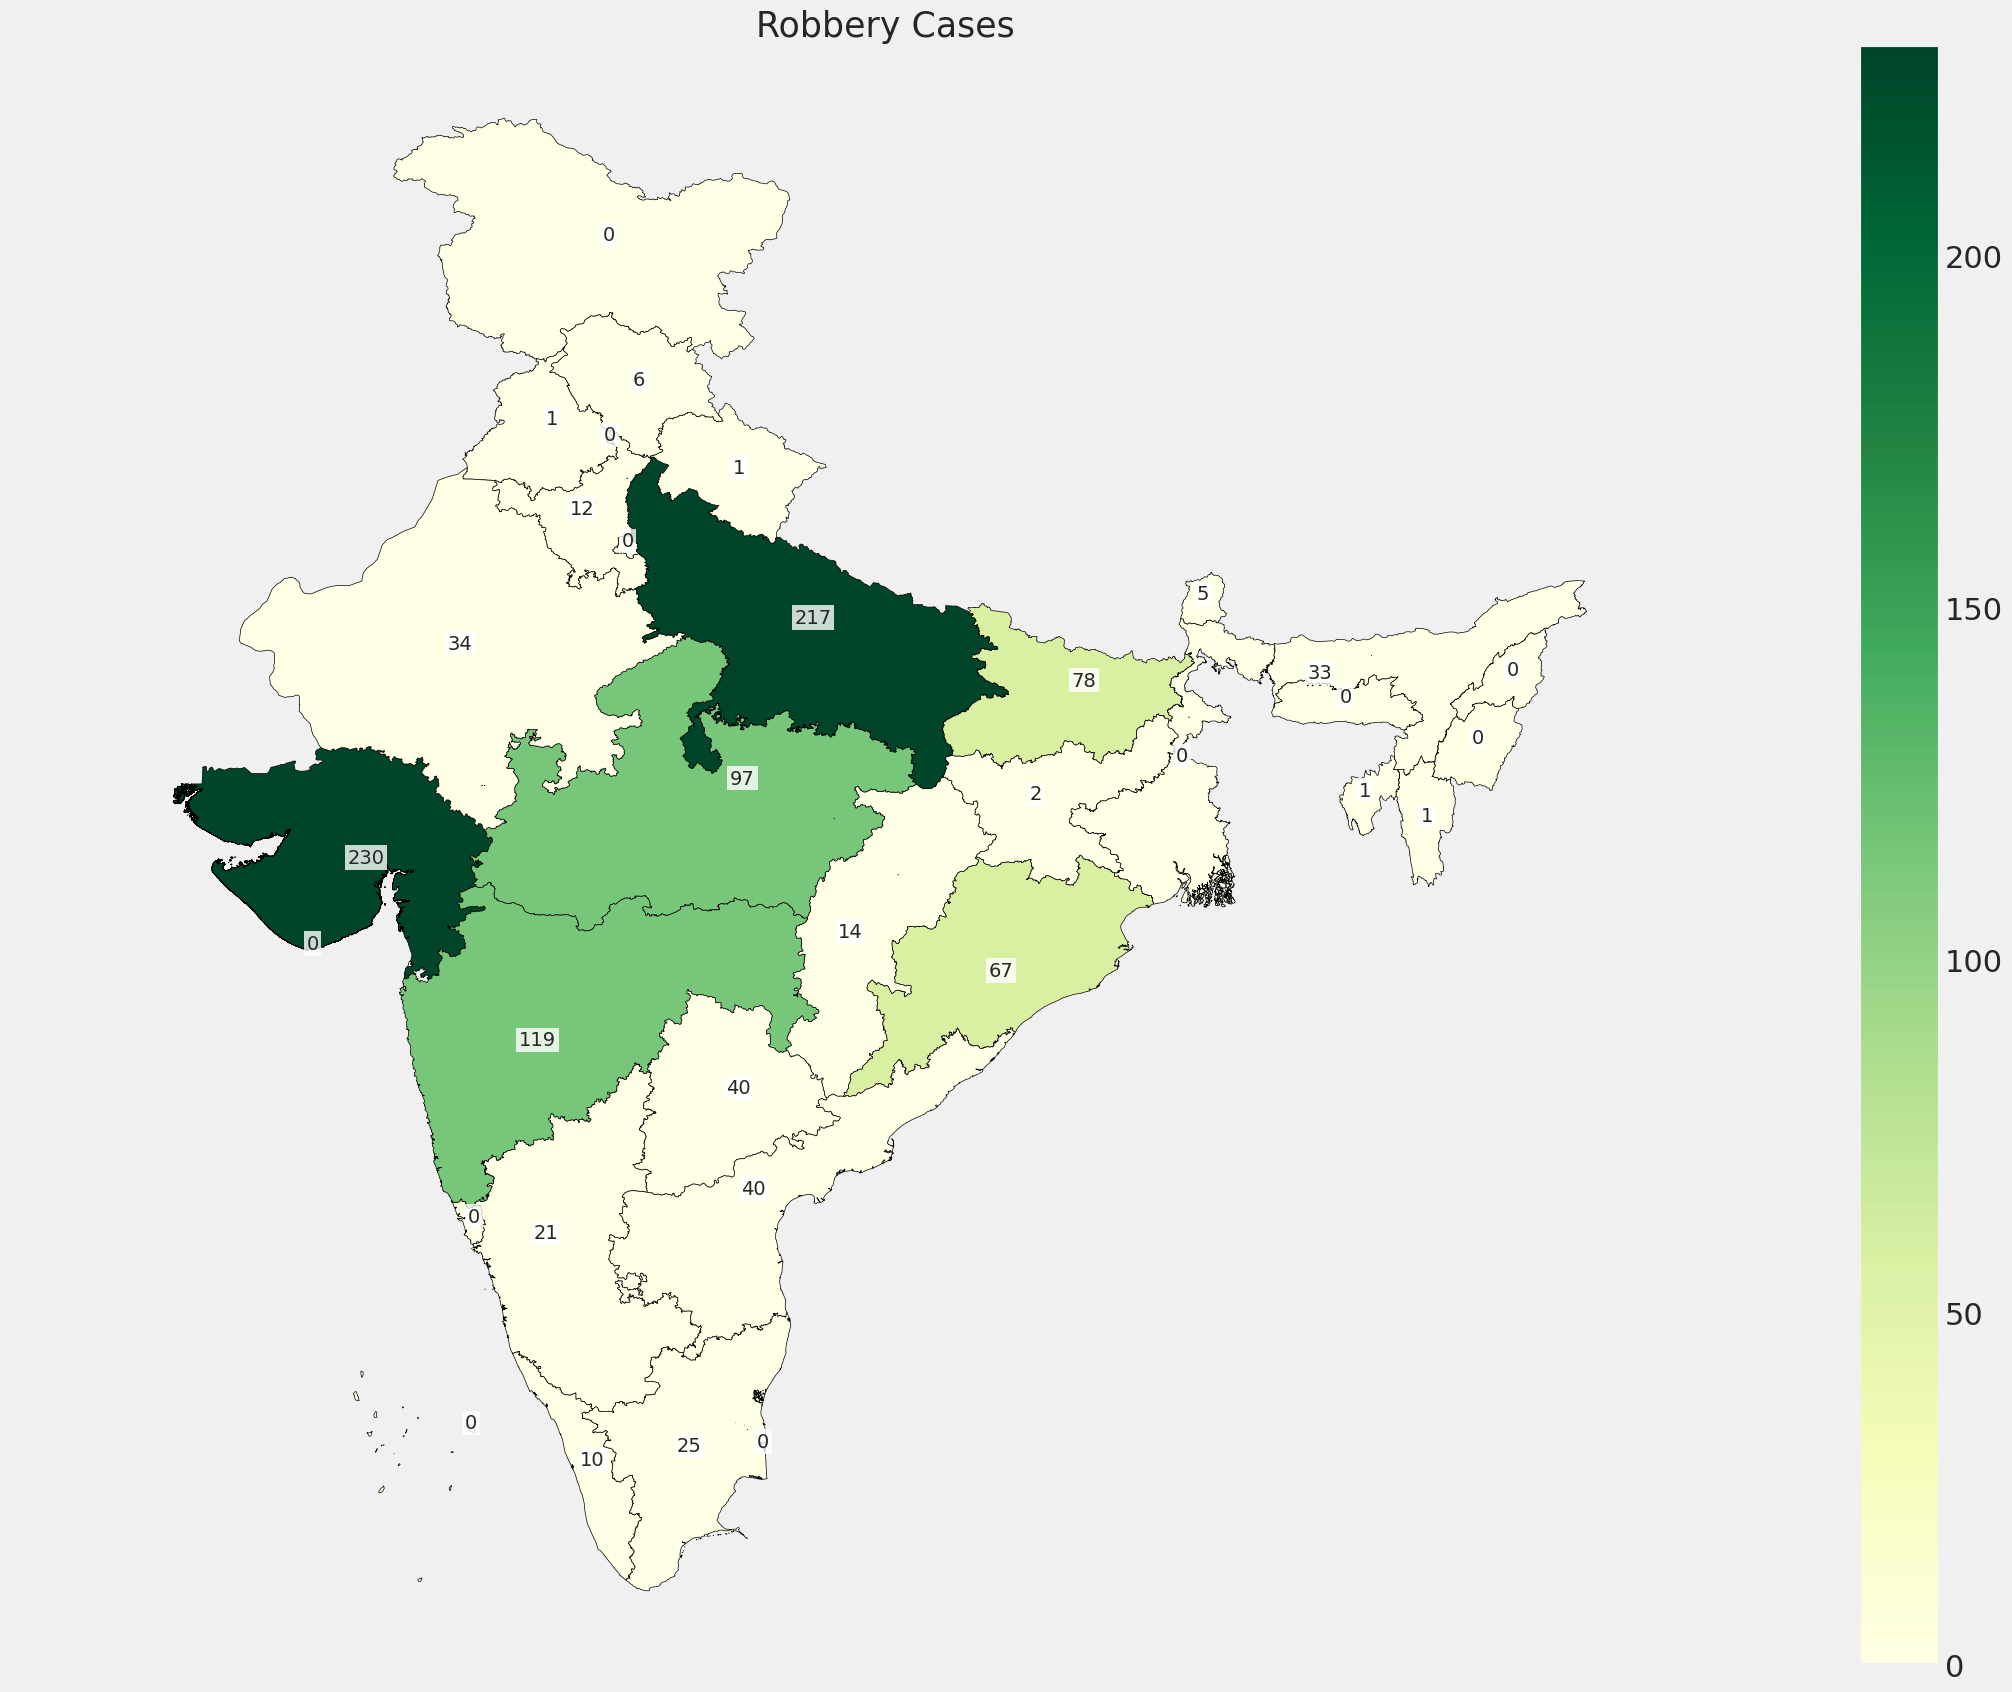

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Robbery', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Robbery Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Robbery'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Robbery'].min(), vmax= merged1['Robbery'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

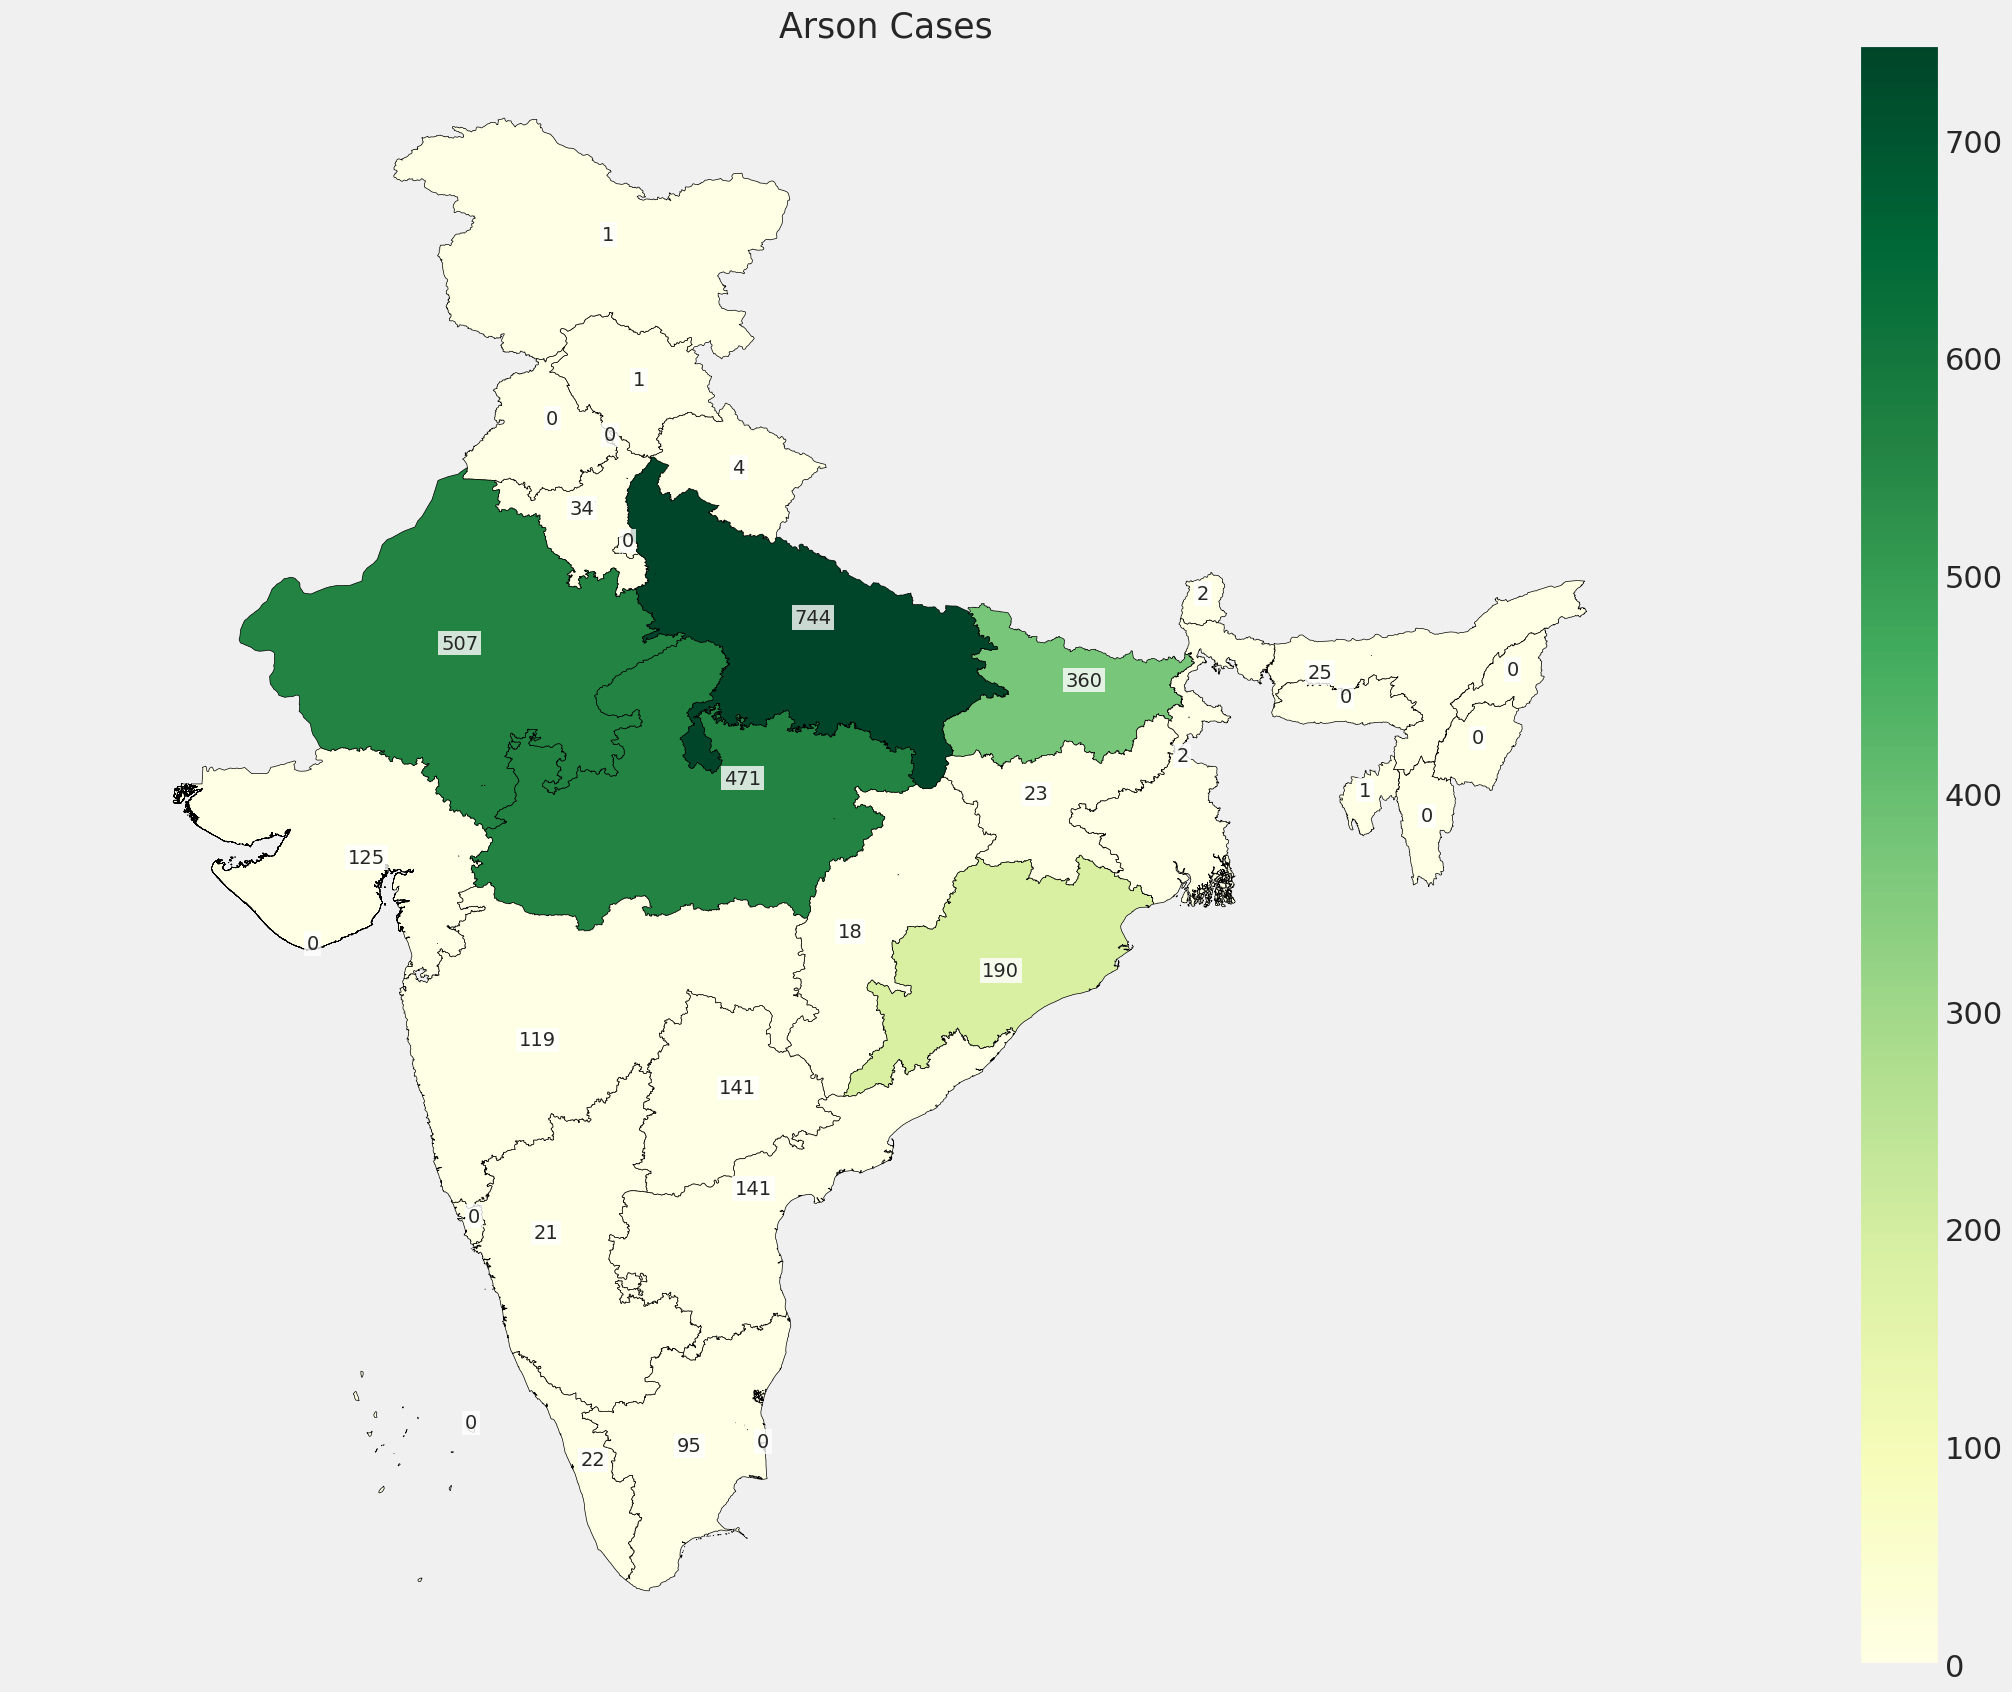

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Arson', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Arson Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Arson'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Arson'].min(), vmax= merged1['Arson'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

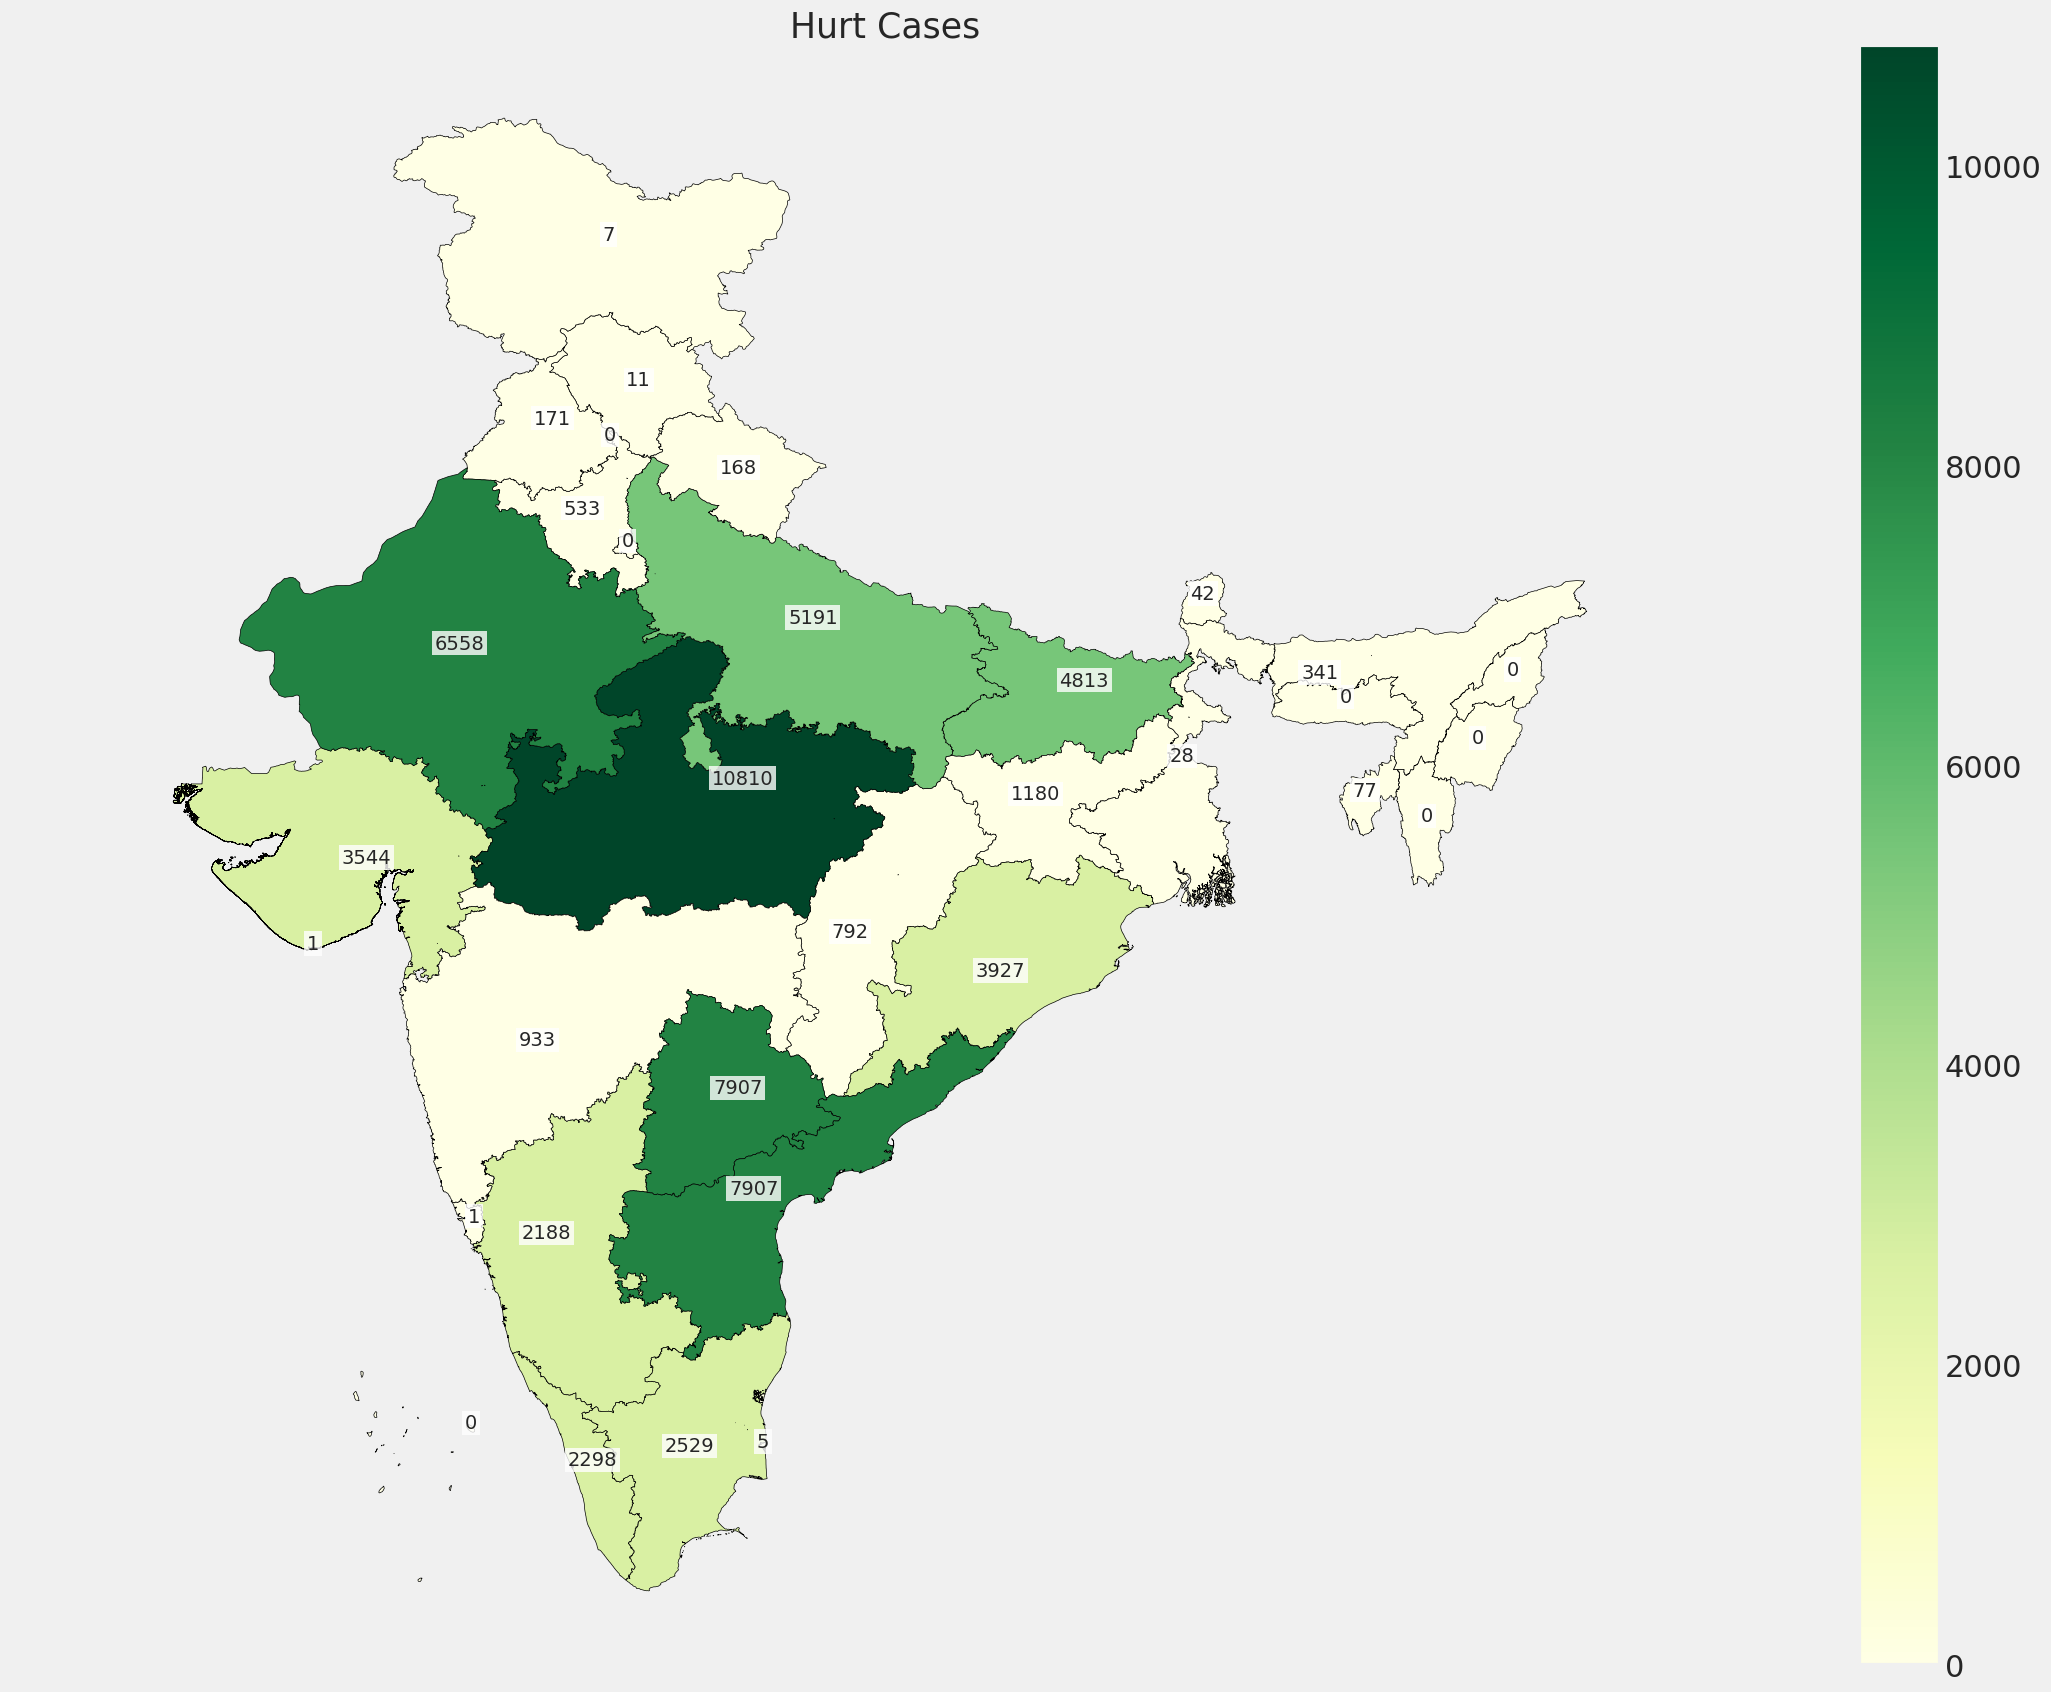

In [ ]:
figsize = (25, 20)
plt.style.use("fivethirtyeight")
cmap1 = 'cool'
ax= merged1.dropna().plot(column= 'Hurt', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Hurt Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Hurt'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Hurt'].min(), vmax= merged1['Hurt'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

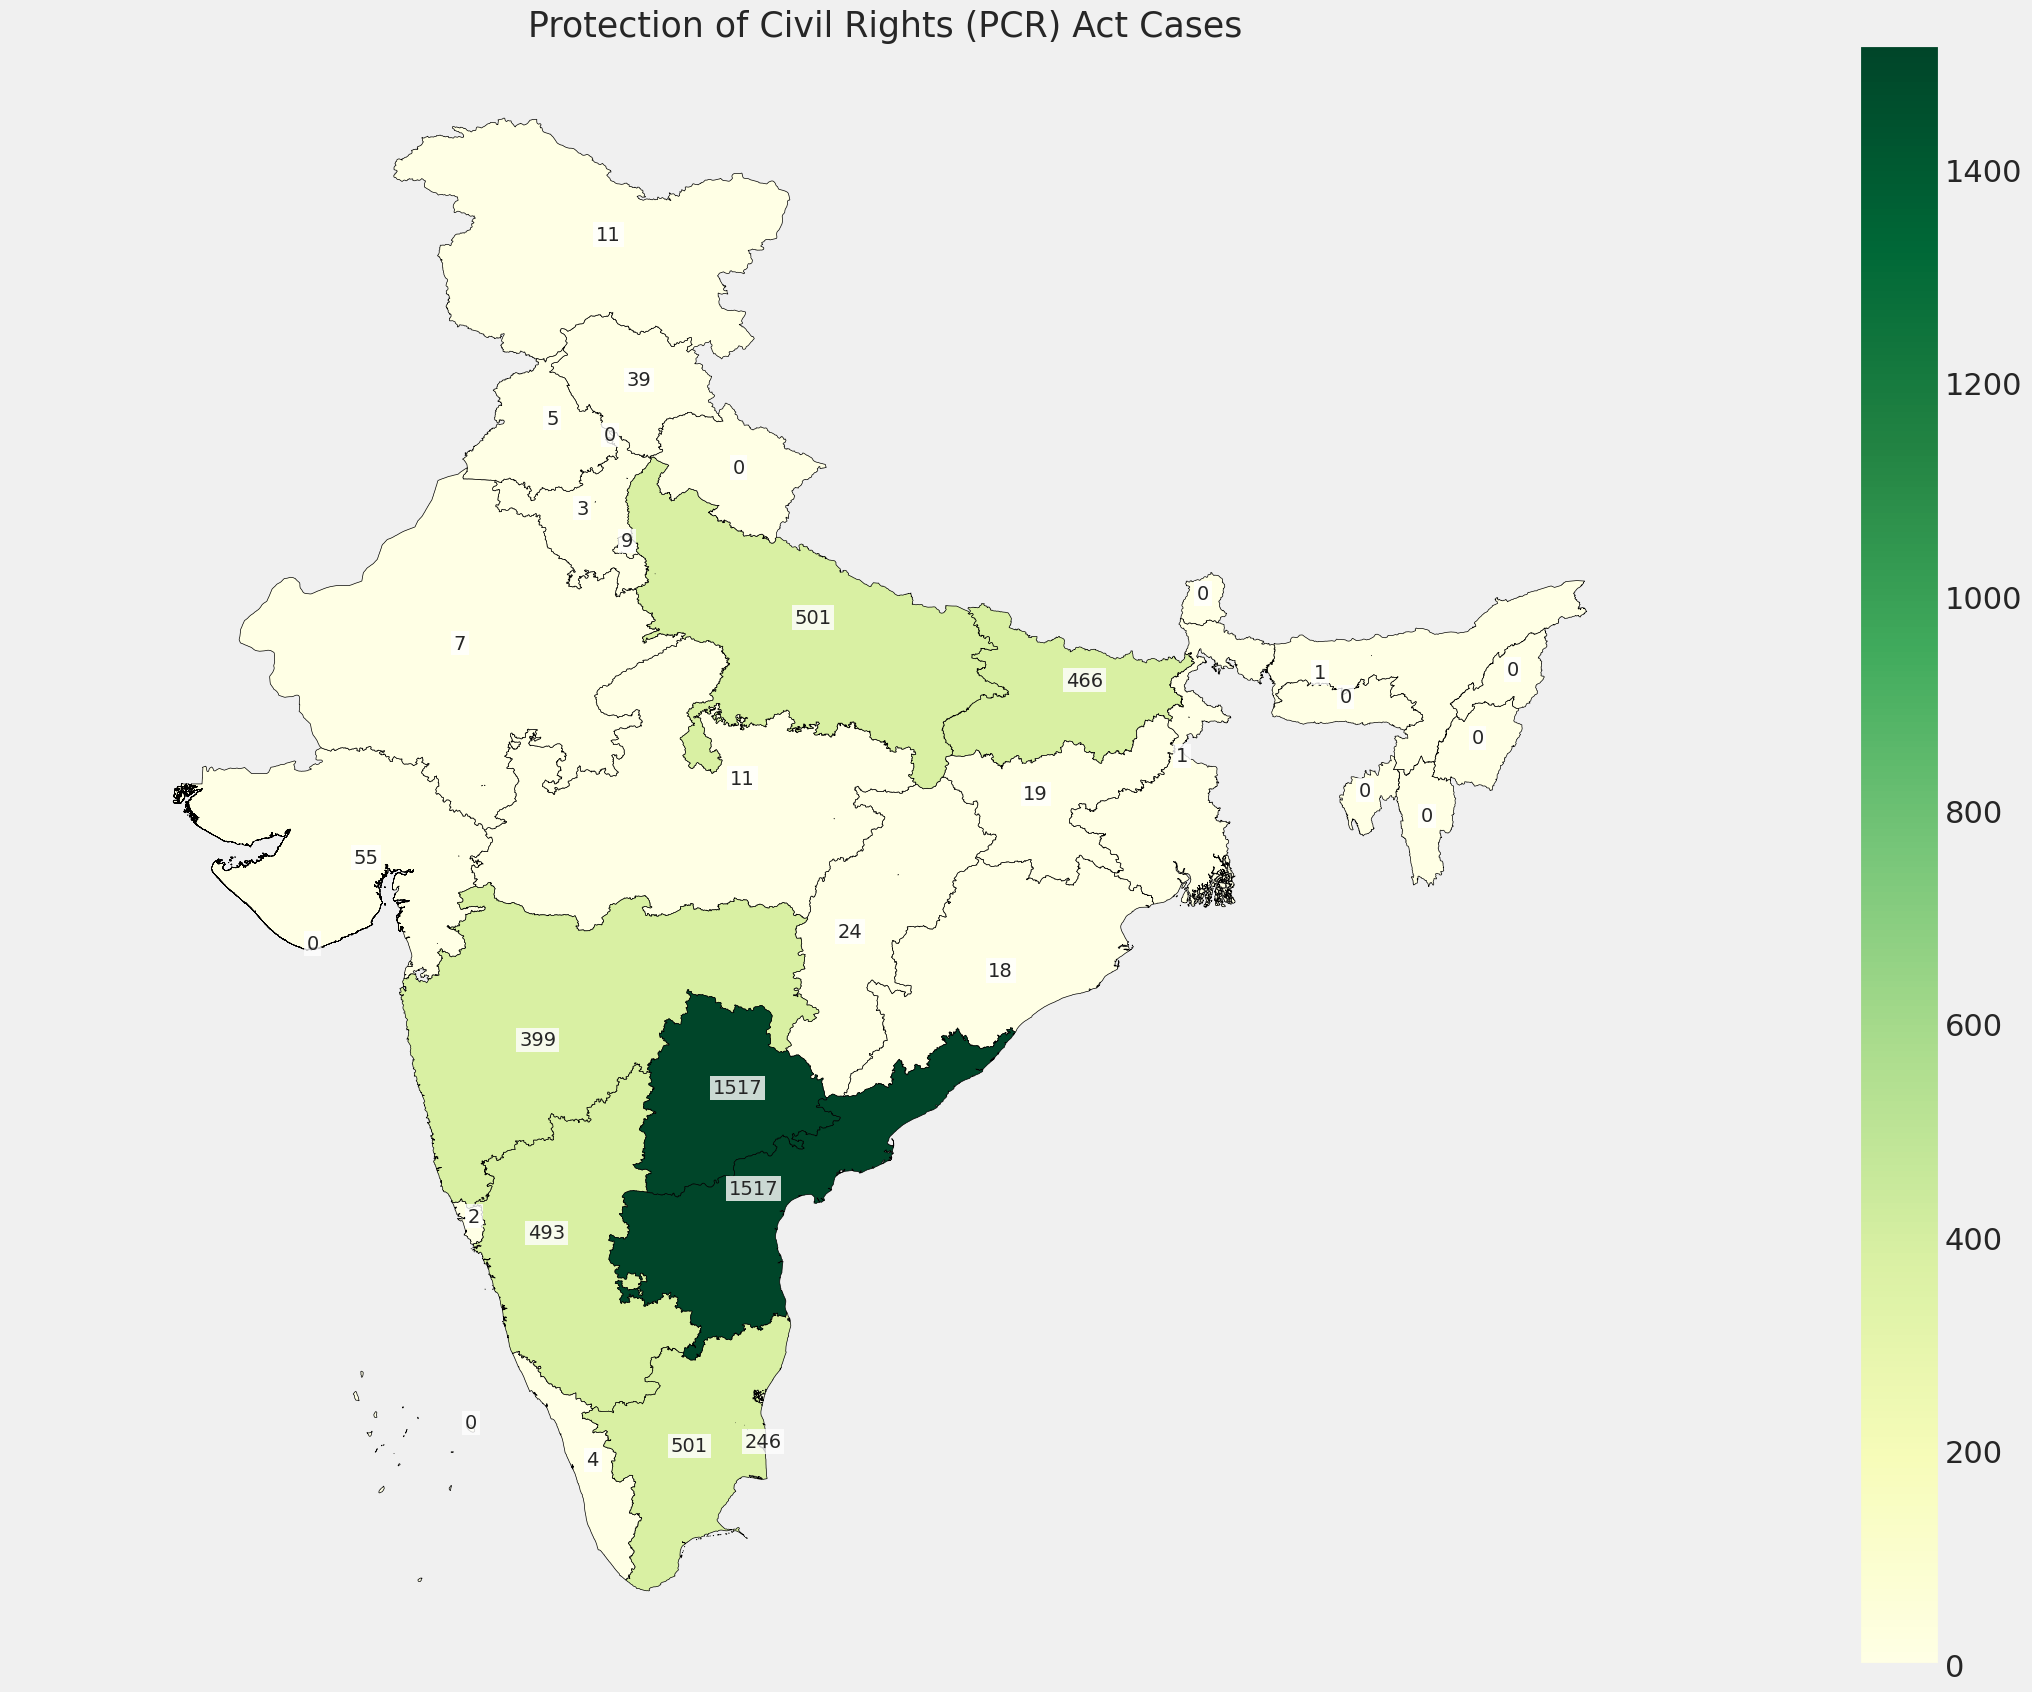

In [ ]:
figsize = (25, 20)
ax= merged1.dropna().plot(column= 'Protection of Civil Rights (PCR) Act', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Protection of Civil Rights (PCR) Act Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Protection of Civil Rights (PCR) Act'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
norm = Normalize(vmin=merged1['Protection of Civil Rights (PCR) Act'].min(), vmax= merged1['Protection of Civil Rights (PCR) Act'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

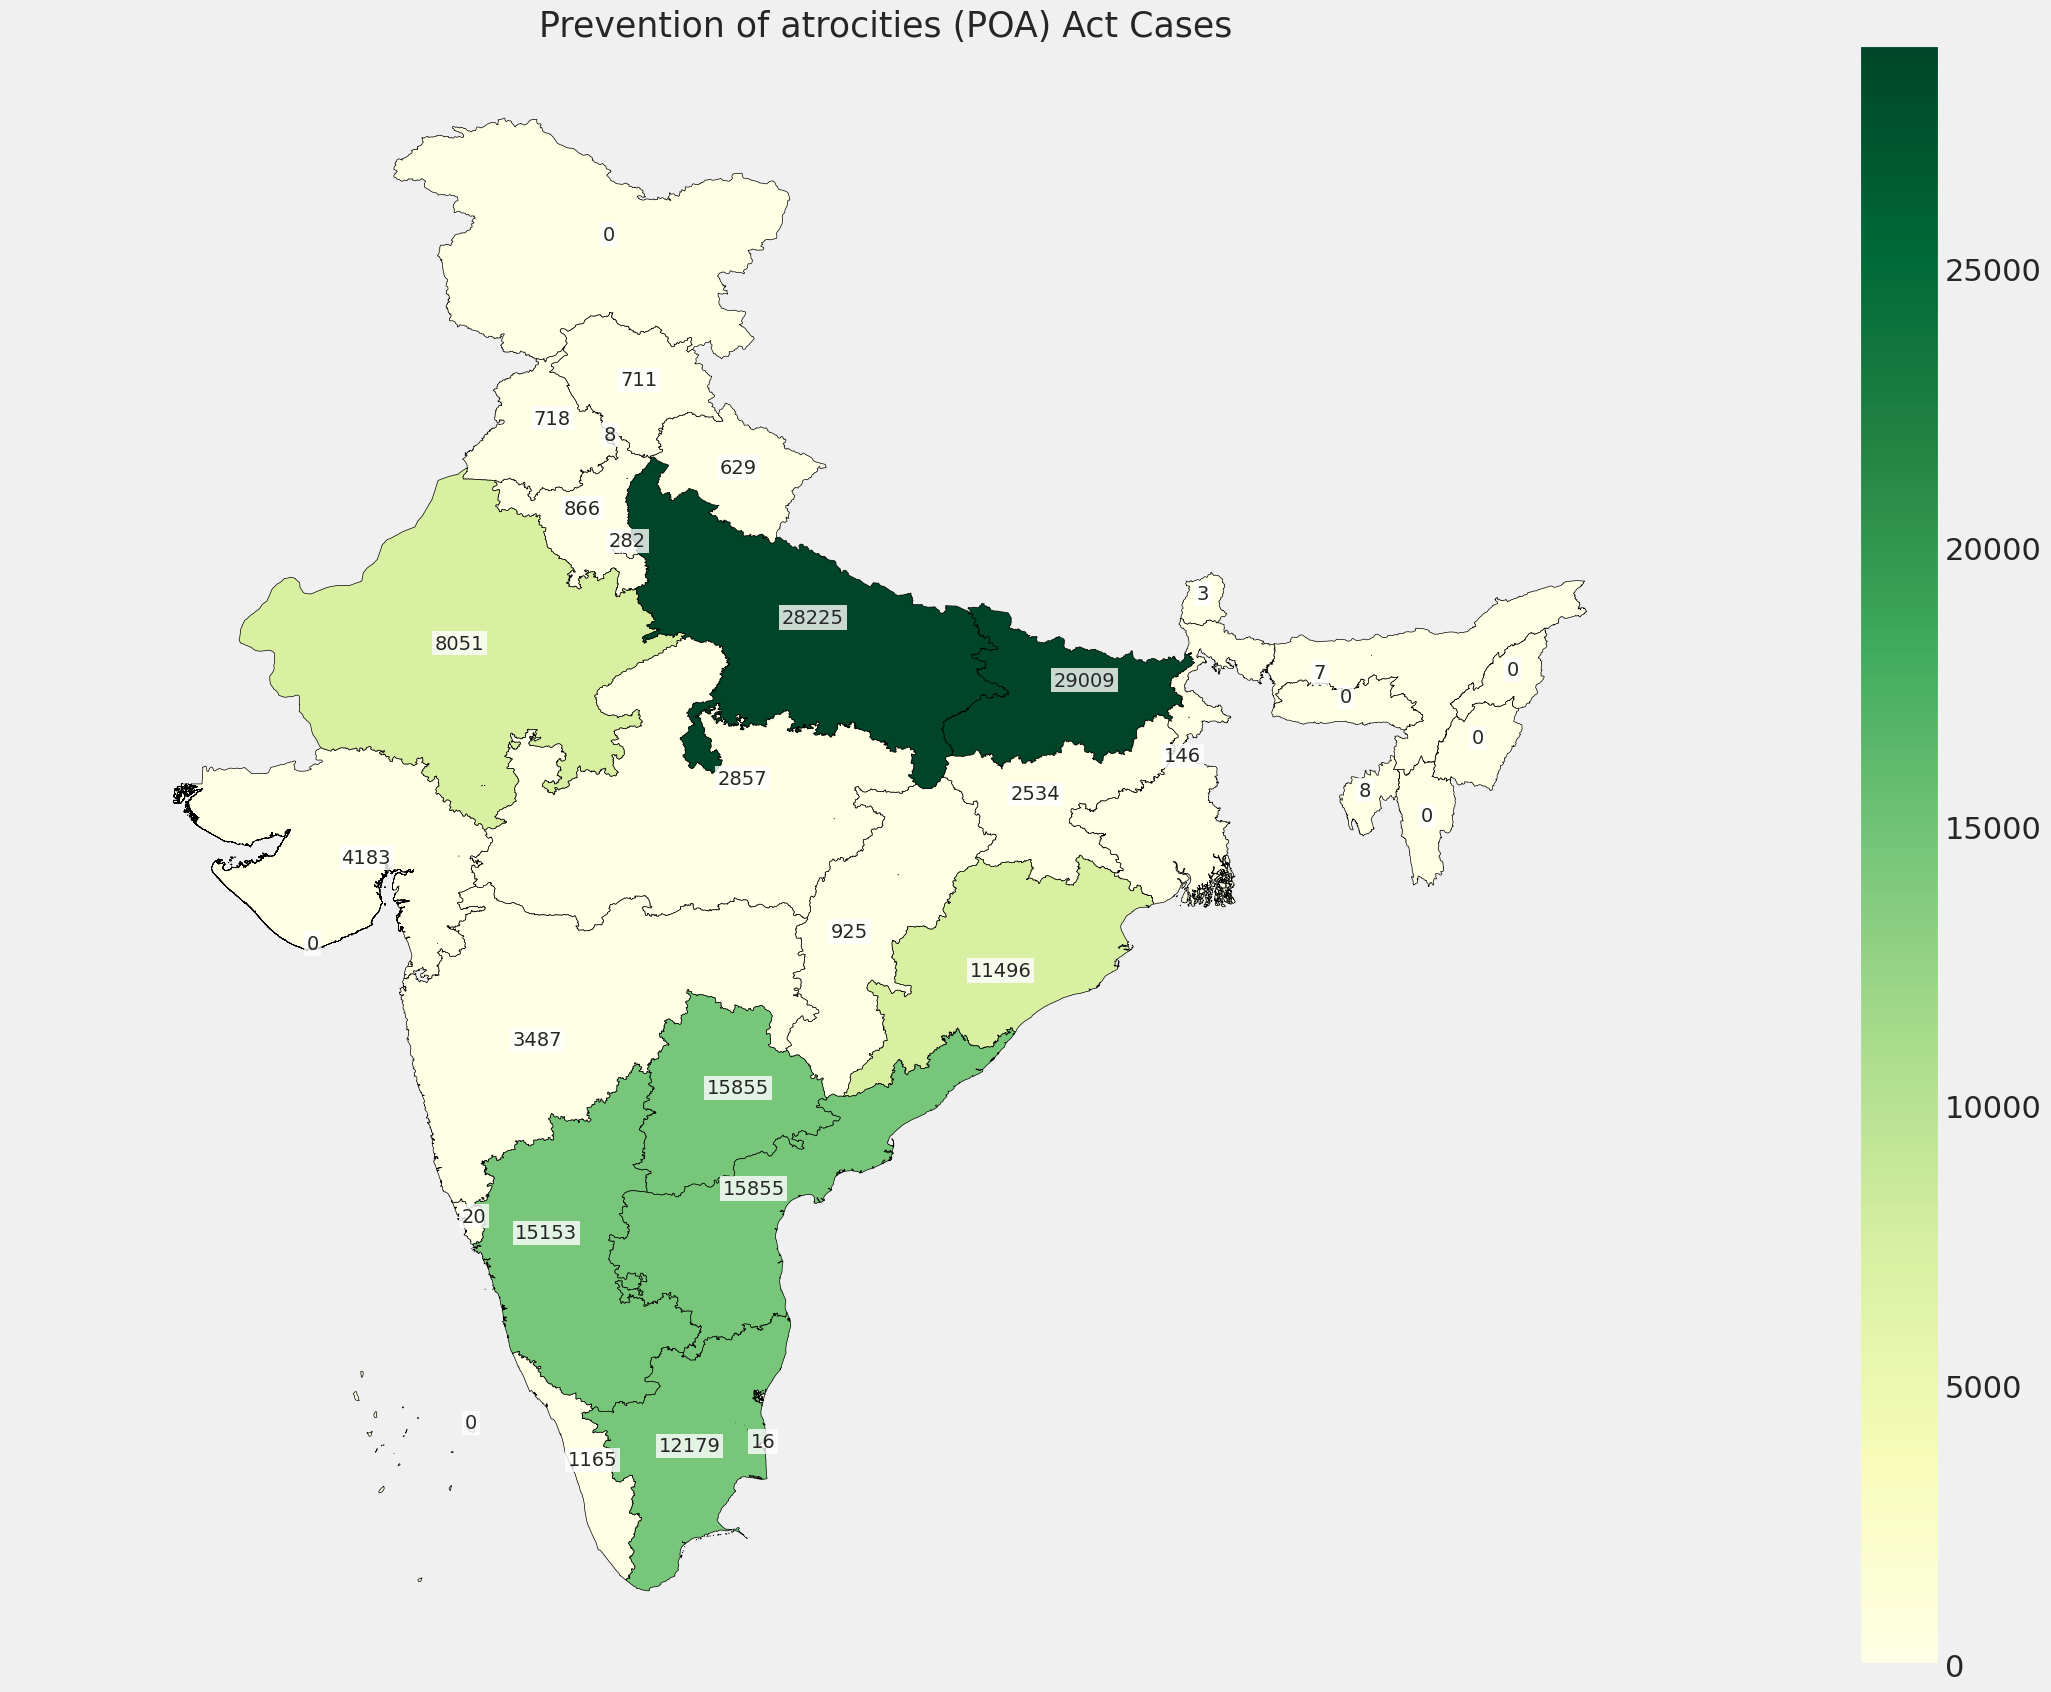

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Prevention of atrocities (POA) Act', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')

ax.set_title(" Prevention of atrocities (POA) Act Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Prevention of atrocities (POA) Act'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Prevention of atrocities (POA) Act'].min(), vmax= merged1['Prevention of atrocities (POA) Act'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

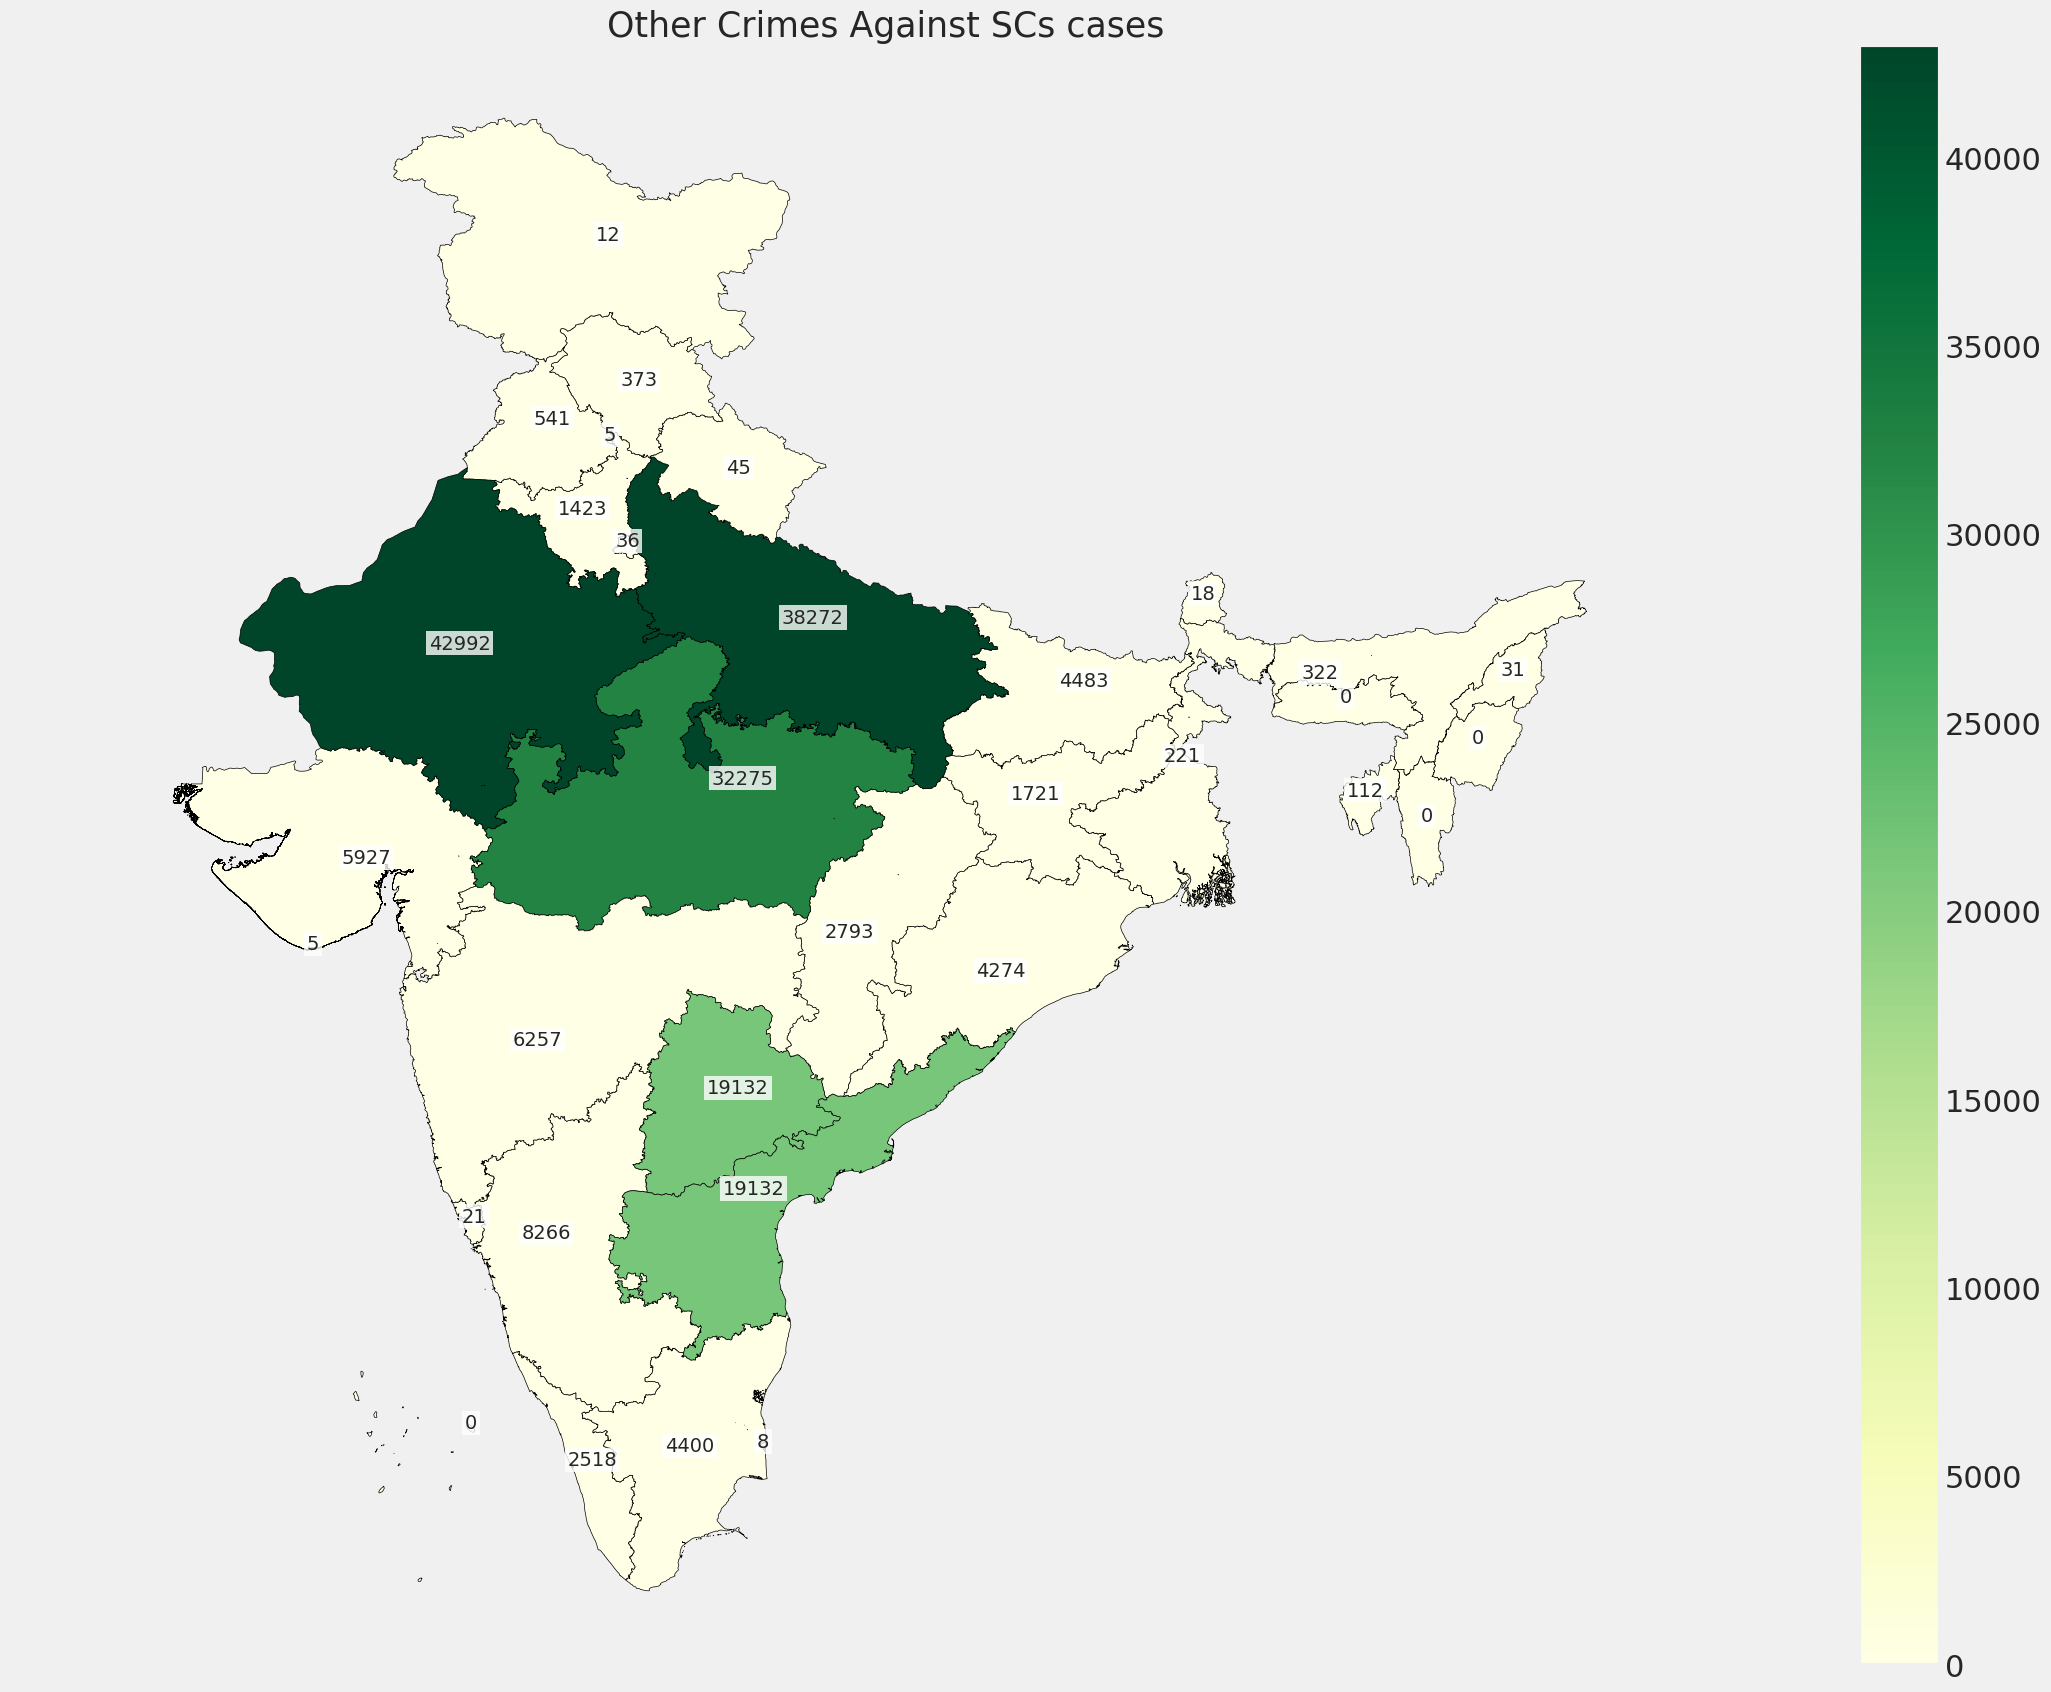

In [ ]:
merged1['coords'] = merged1['geometry'].apply(lambda x: x.representative_point().coords[:])
merged1['coords'] = [coords[0] for coords in merged1['coords']]
figsize = (25, 20)
ax= merged1.dropna().plot(column= 'Other Crimes Against SCs', cmap= cmap, figsize=figsize, scheme='equal_interval' ,edgecolor='black')
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Other Crimes Against SCs'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
ax.set_title(" Other Crimes Against SCs cases" , size = 25)
norm = Normalize(vmin=merged1['Other Crimes Against SCs'].min(), vmax= merged1['Other Crimes Against SCs'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

Lets see the list of districts which have high count of caste crimes according to the **crime** **category**

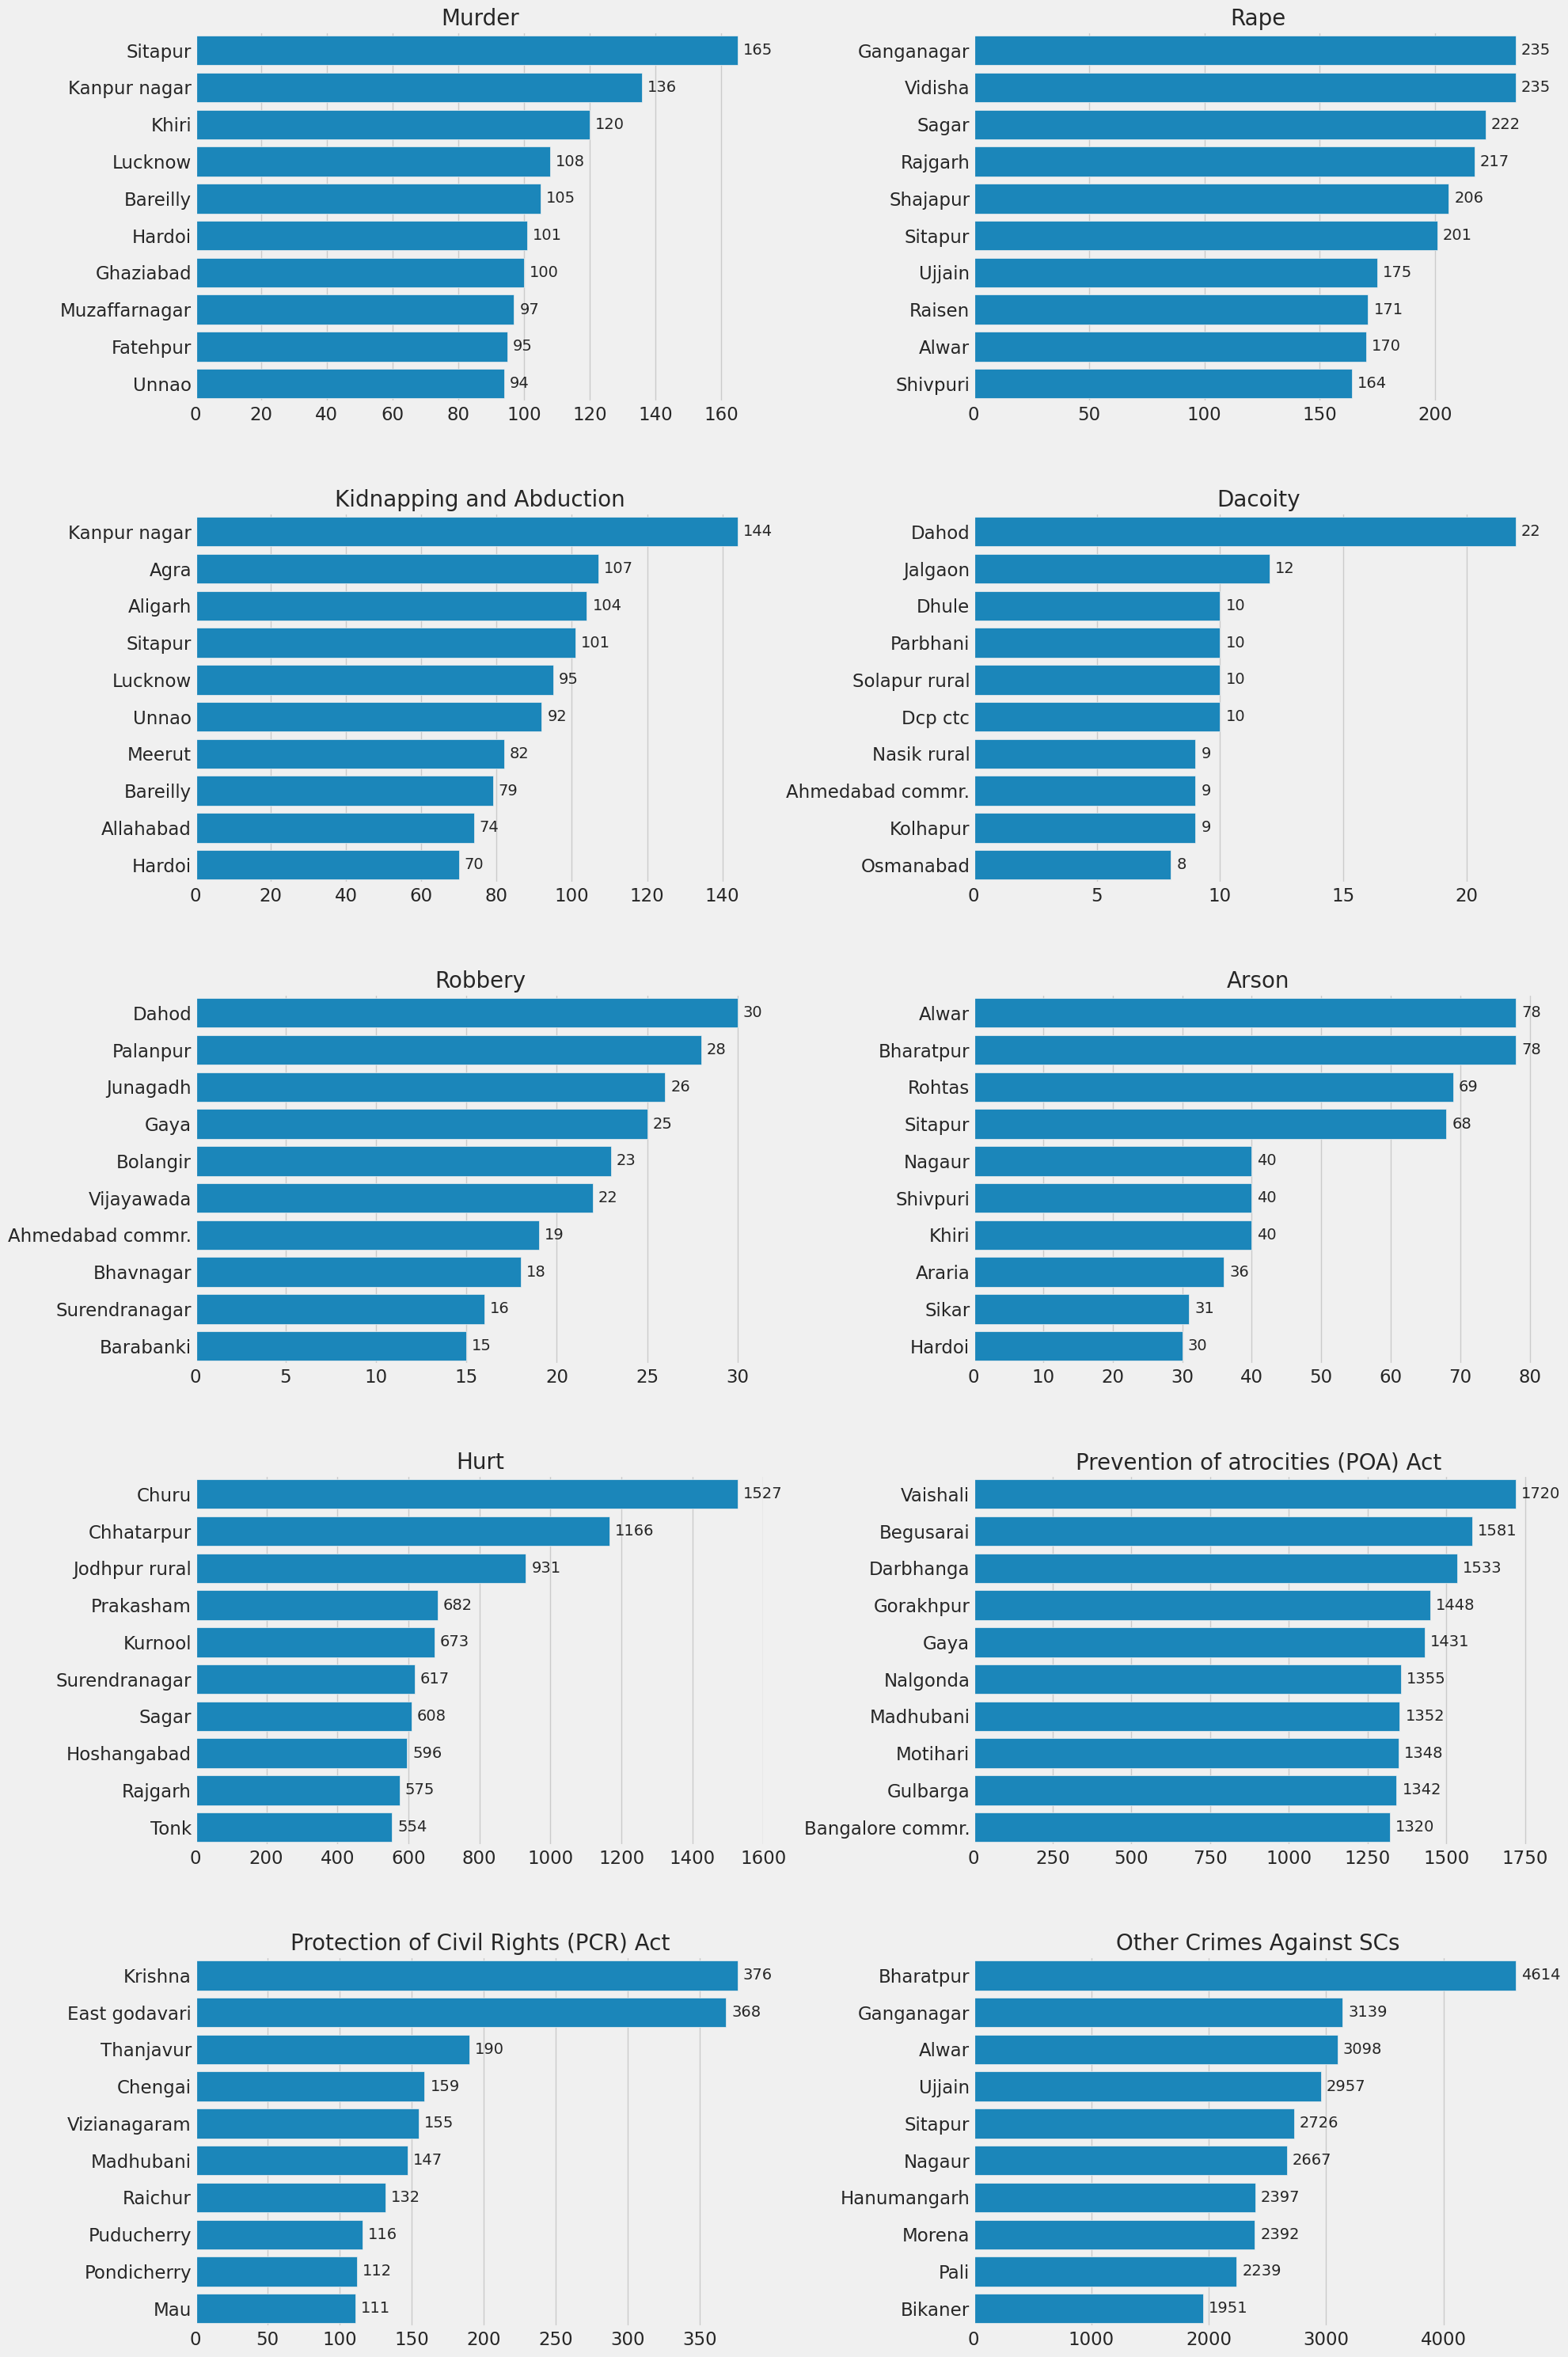

In [ ]:
scd = sc[sc.DISTRICT != 'Total']
scd = scd.groupby(['DISTRICT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()


sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scd1 = scd.sort_values(column,ascending = False)
    scd1 = scd1.head(10)
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scd1,x= column ,y='DISTRICT' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")


plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


**Total Crimes**

**Which is the most violent District in India?**

In [ ]:

scd['sum'] = scd['Murder']+scd['Rape']+scd['Kidnapping and Abduction']+scd['Dacoity']+scd['Robbery']+scd['Arson']+scd['Hurt']+scd['Prevention of atrocities (POA) Act']+scd['Protection of Civil Rights (PCR) Act']+scd['Other Crimes Against SCs']

In [ ]:
mostviolent = scd.groupby(['DISTRICT'])['sum'].sum().sort_values(ascending = False).reset_index()
mostviolent = mostviolent.head(15)

In [ ]:
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Bar(
            x=mostviolent['DISTRICT'], y=mostviolent['sum'],
            text=mostviolent['sum'],
            textposition='auto', marker_color='rgb(255, 22, 22)'
        )])
fig.update_layout(title_text='Most Violent Districts')

fig.show(renderer="colab")



When it comes to the total number of cases **Bharatpur**of Rajasthan has the highest number of caste crimes in these 13 years.

**Number of Rape cases in 6 States**

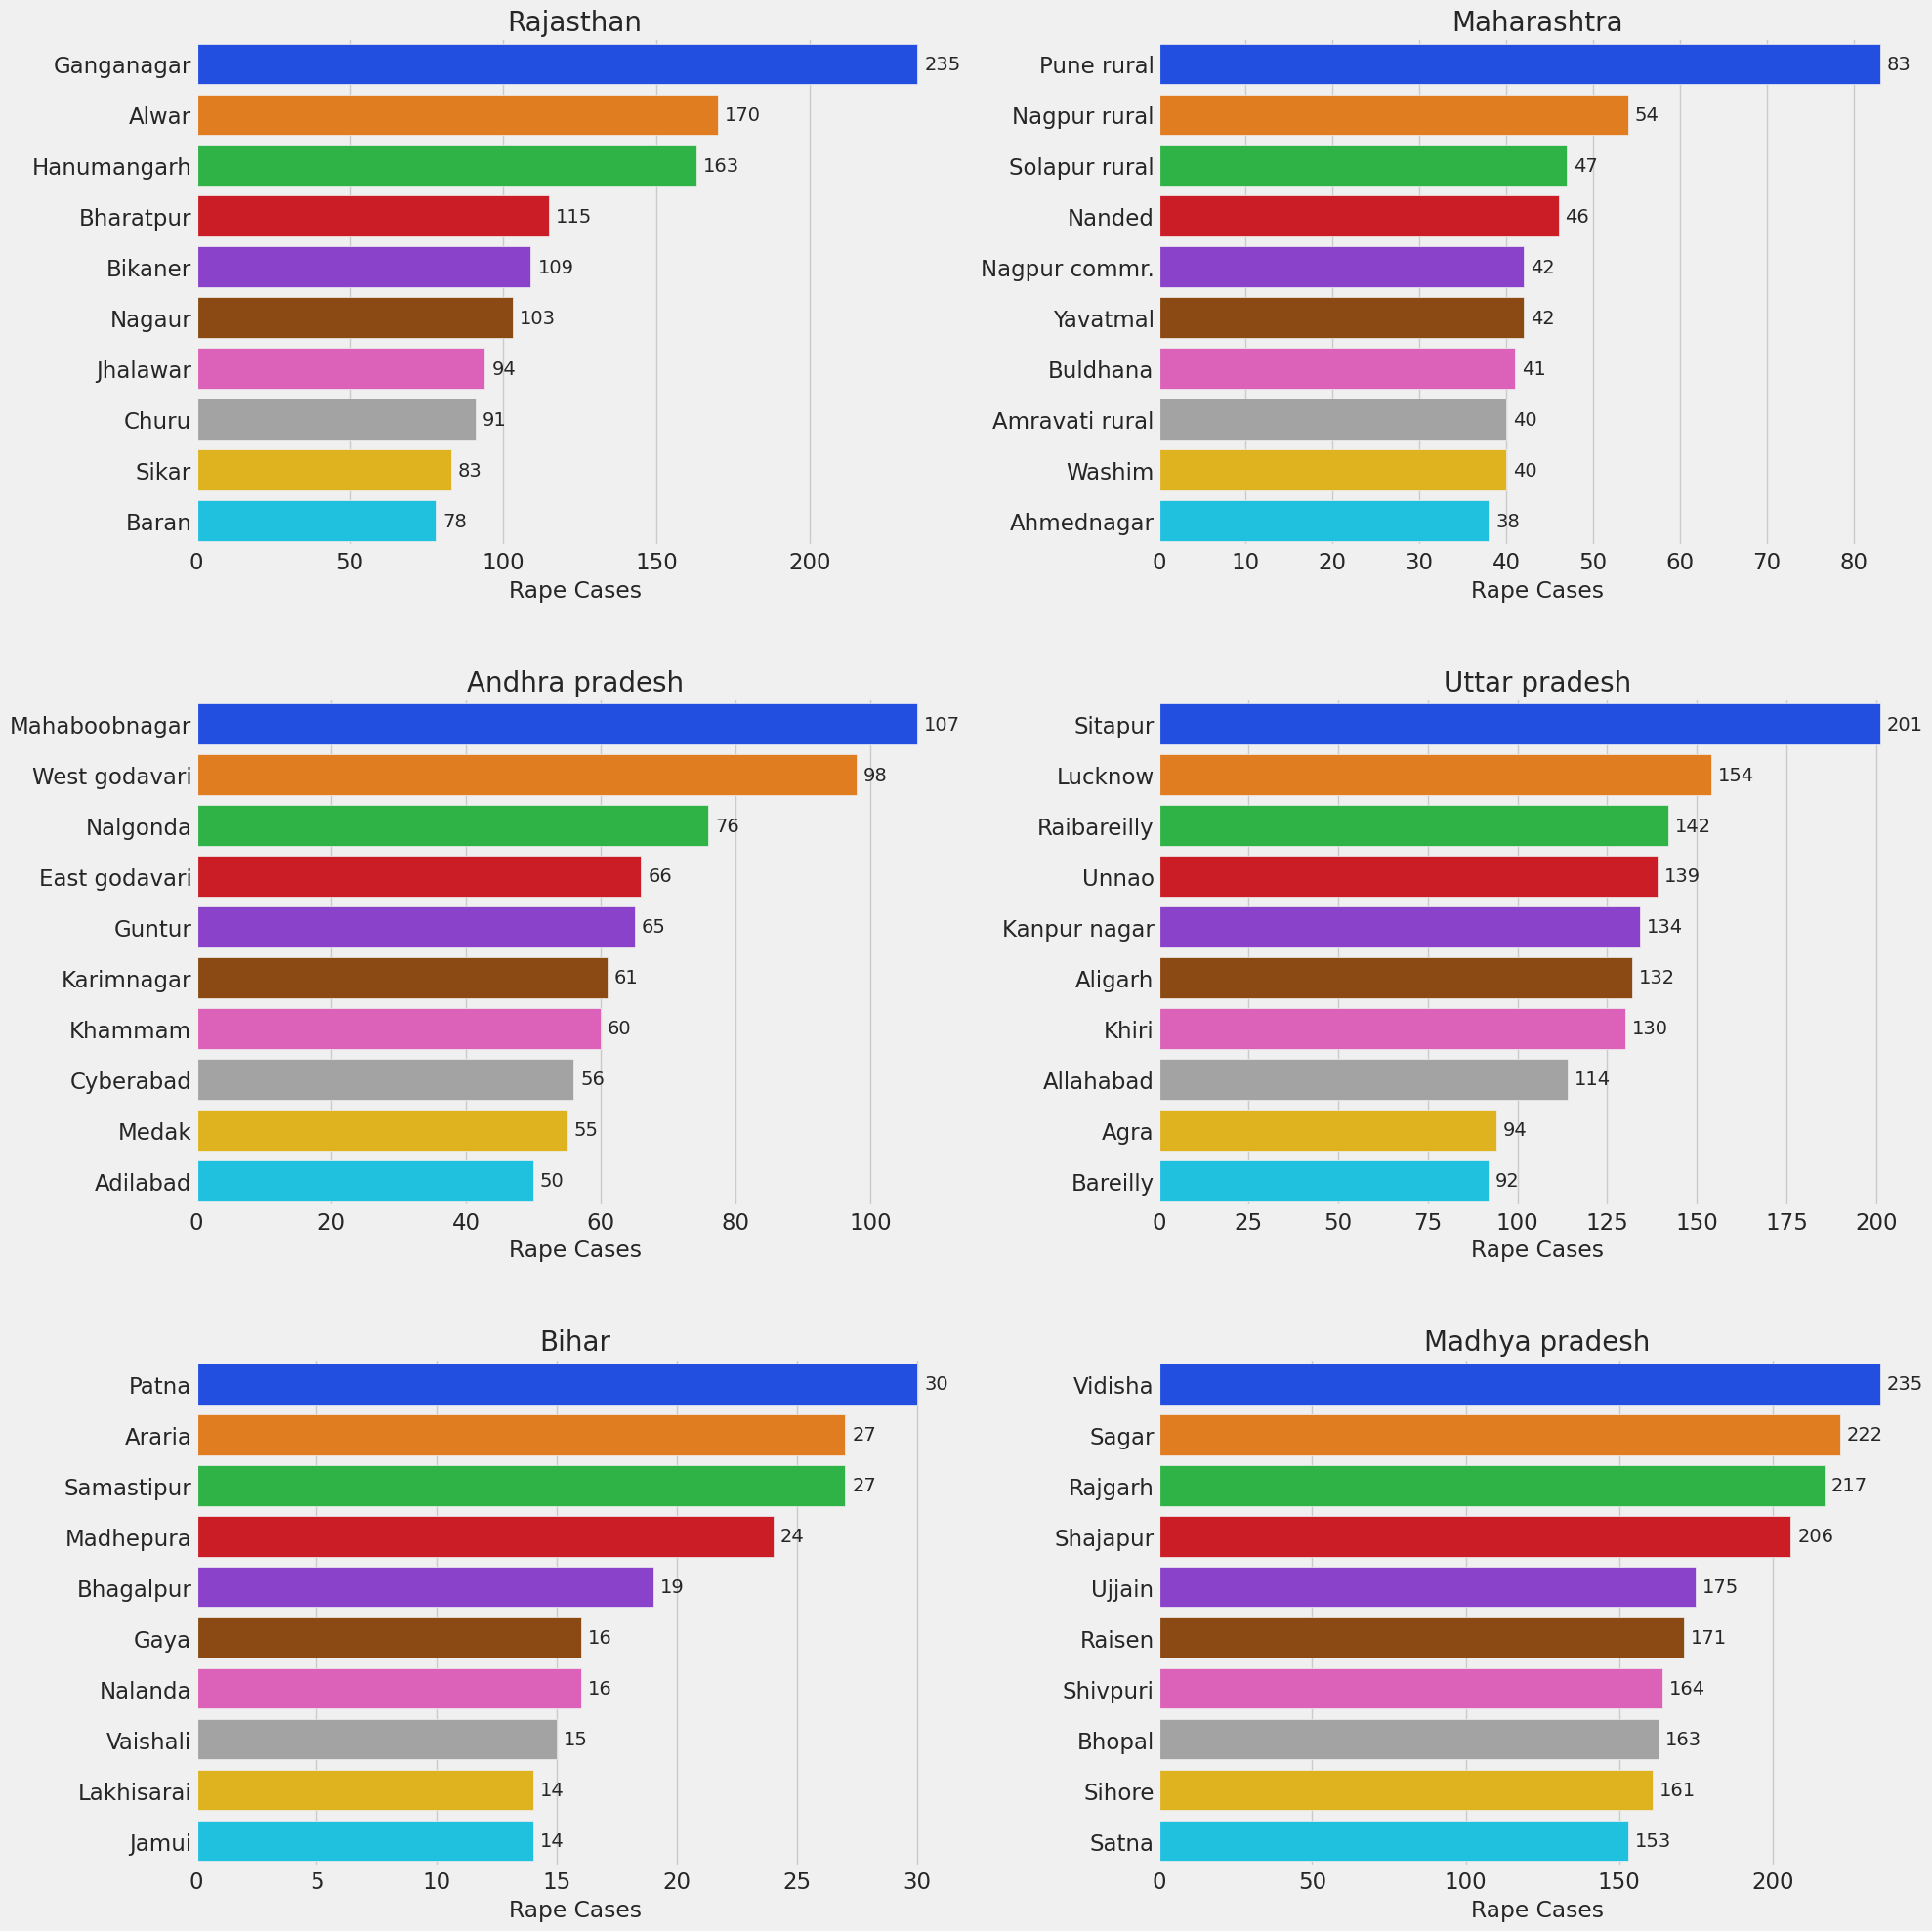

In [ ]:
scsd = sc[sc.DISTRICT!= 'Total']
scsd = scsd.groupby(['STATE/UT', 'DISTRICT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()


states = ['Rajasthan', 'Maharashtra', 'Andhra pradesh', 'Uttar pradesh', 'Bihar','Madhya pradesh']
sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Rape', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Rape' ,y= 'DISTRICT',palette = 'bright' )
    plt.xlabel('Rape Cases')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

**Number of cases of murder in 6 states**

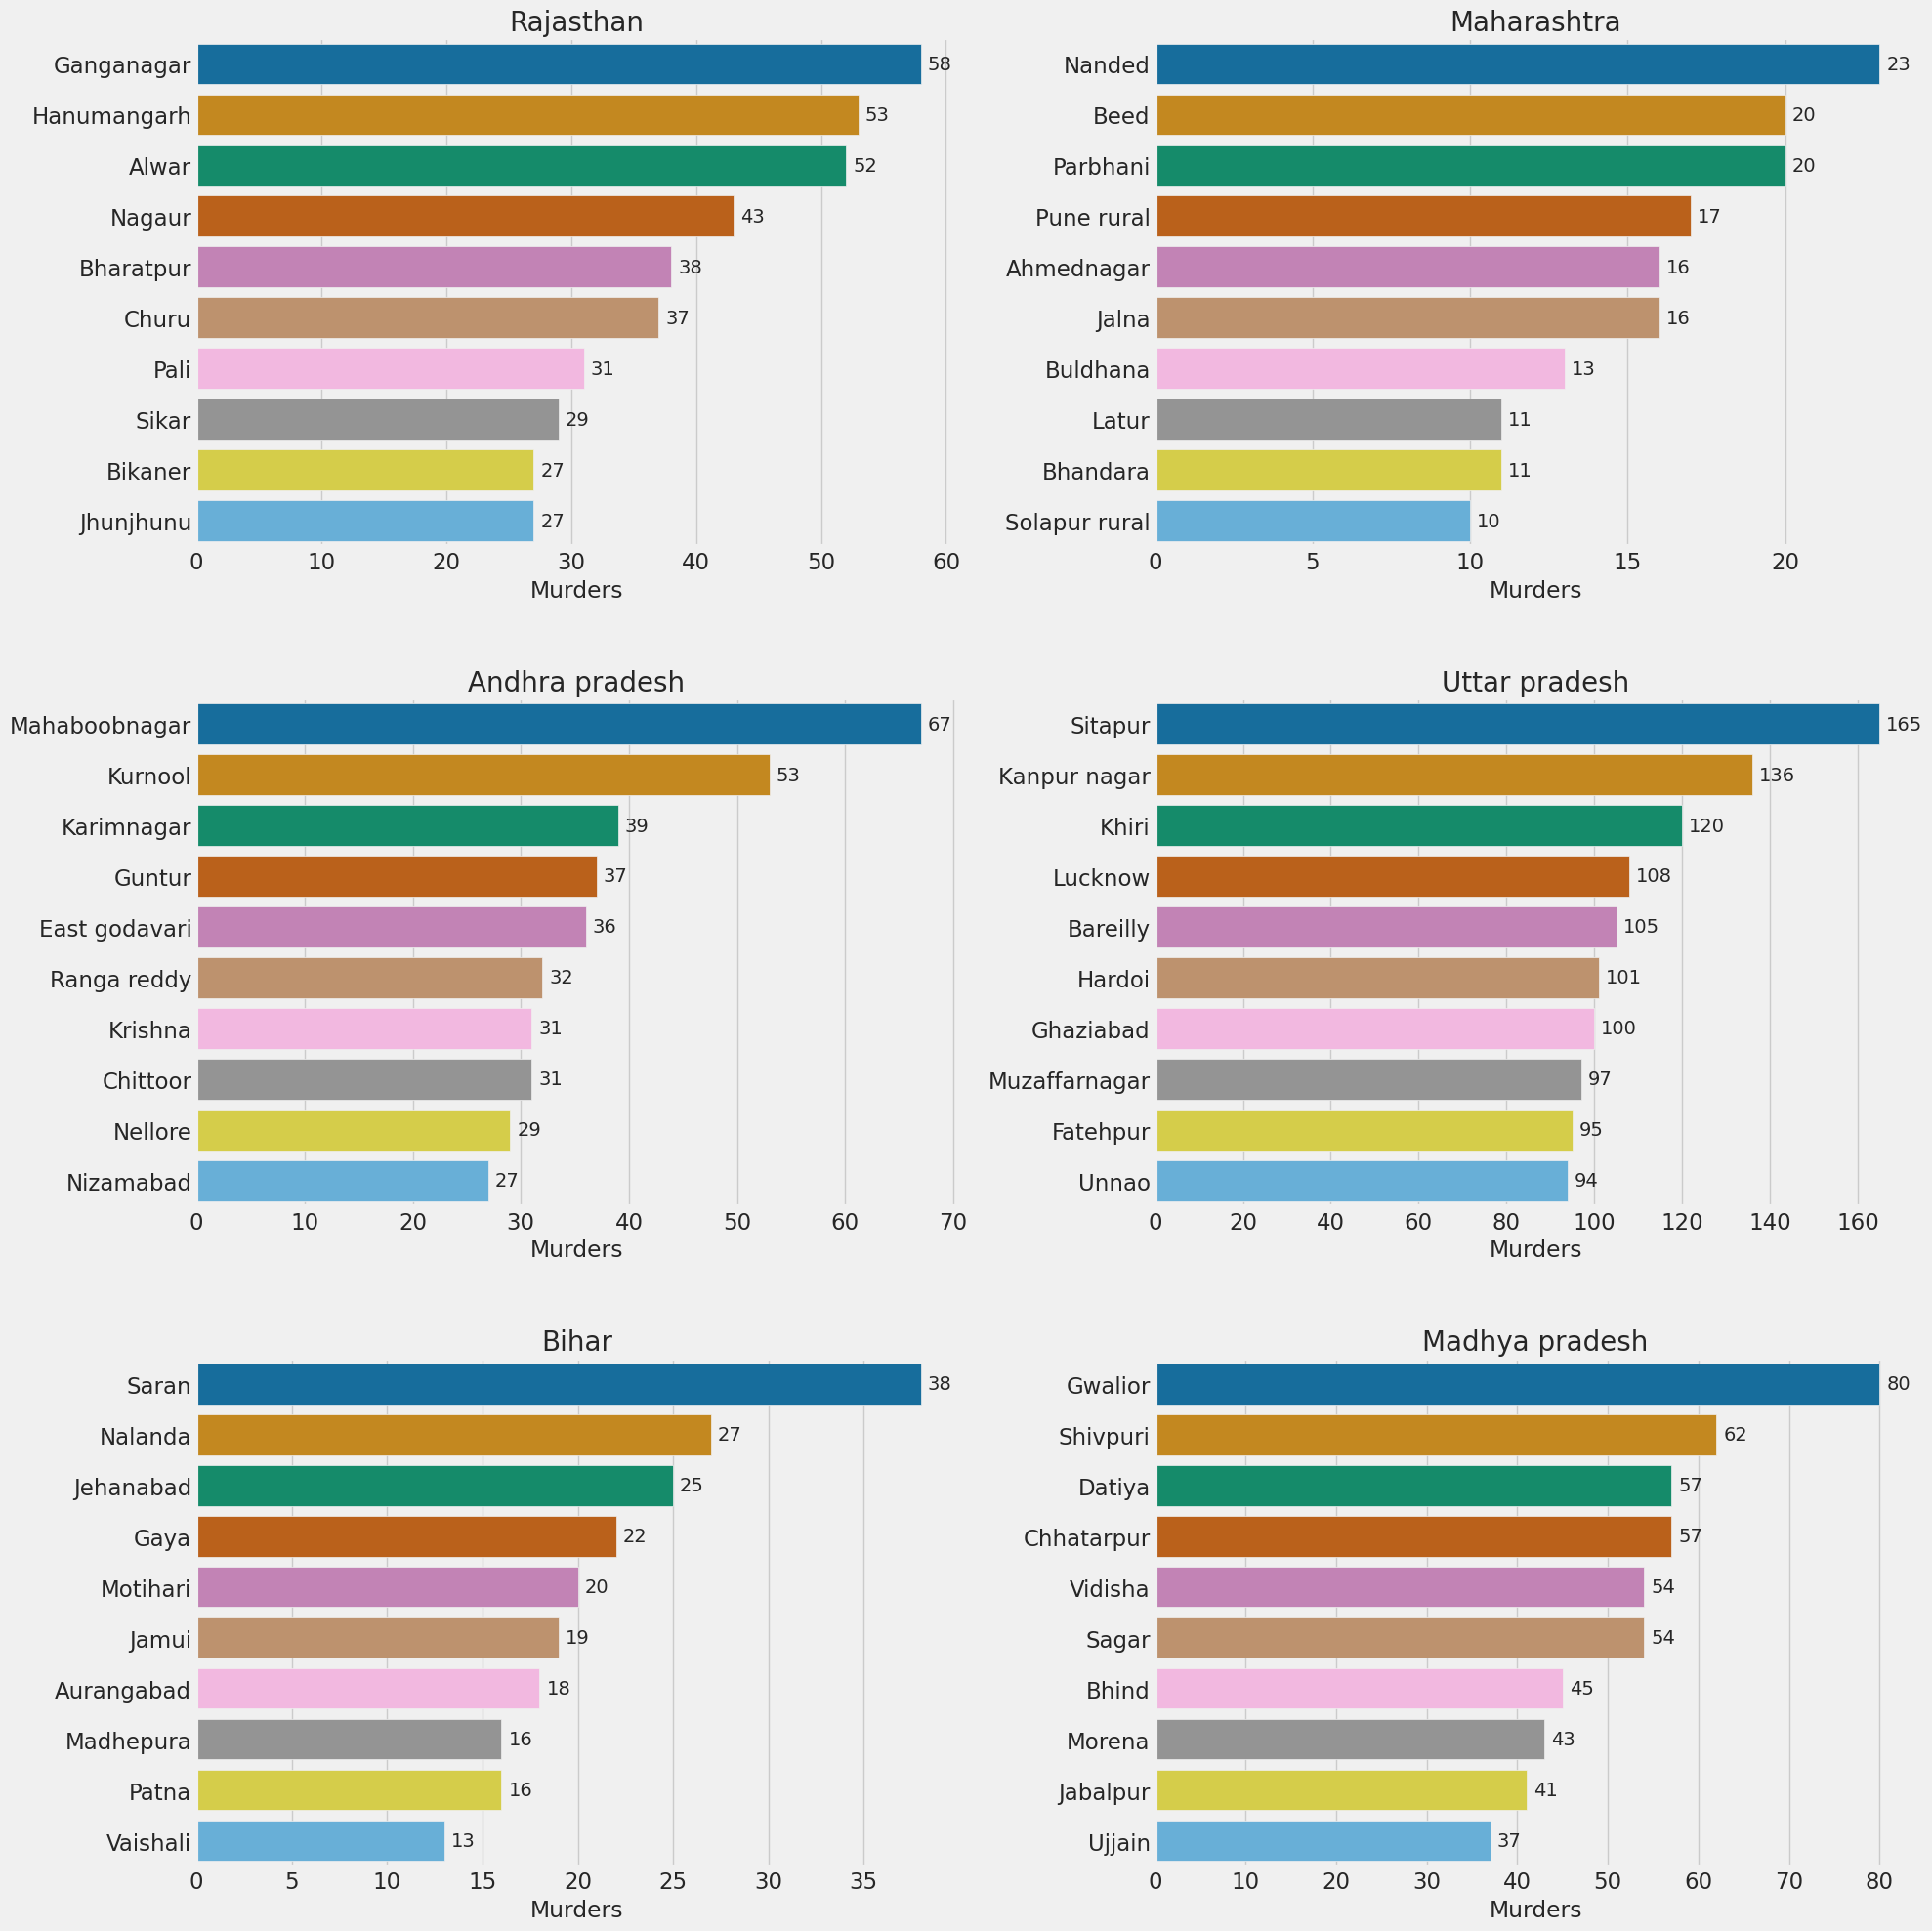

In [ ]:
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Murder', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Murder' ,y= 'DISTRICT',palette = 'colorblind' )
    plt.xlabel('Murders')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

**Number of cases of Hurt in 6 states**

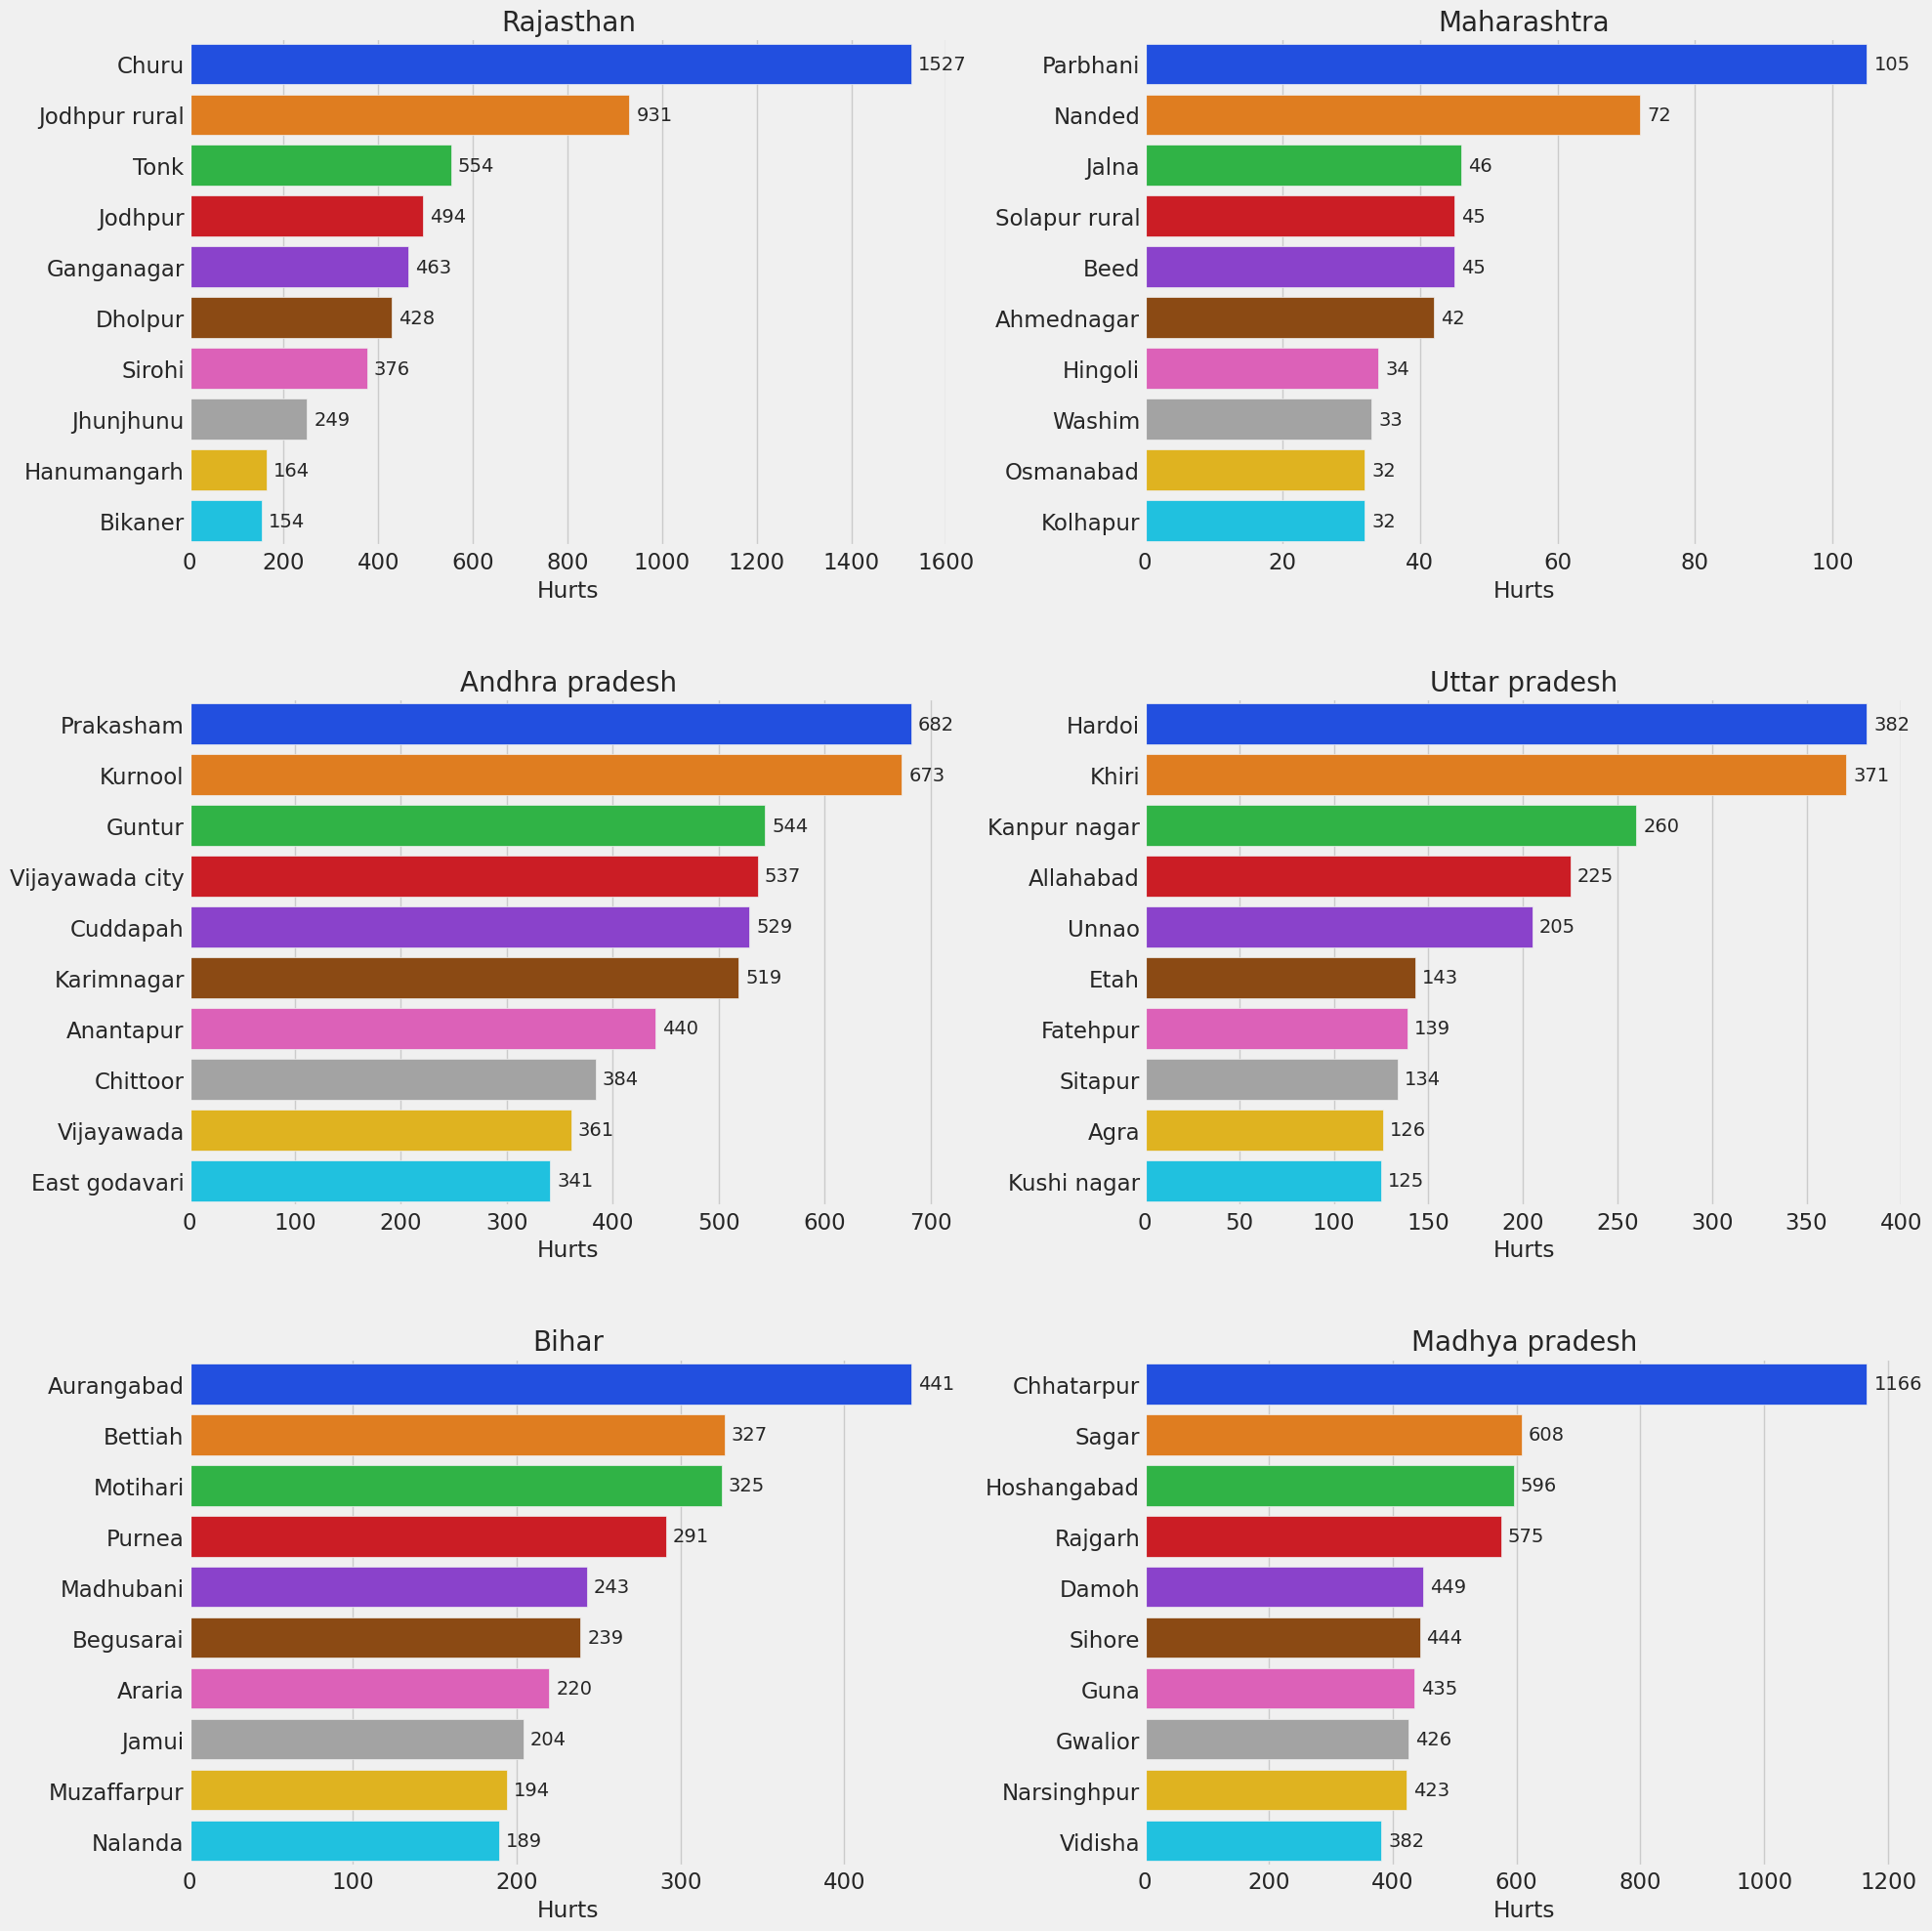

In [ ]:
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Hurt', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Hurt' ,y= 'DISTRICT', palette = 'bright')
    plt.xlabel('Hurts')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

**Number of cases of Atrocities in 6 states**

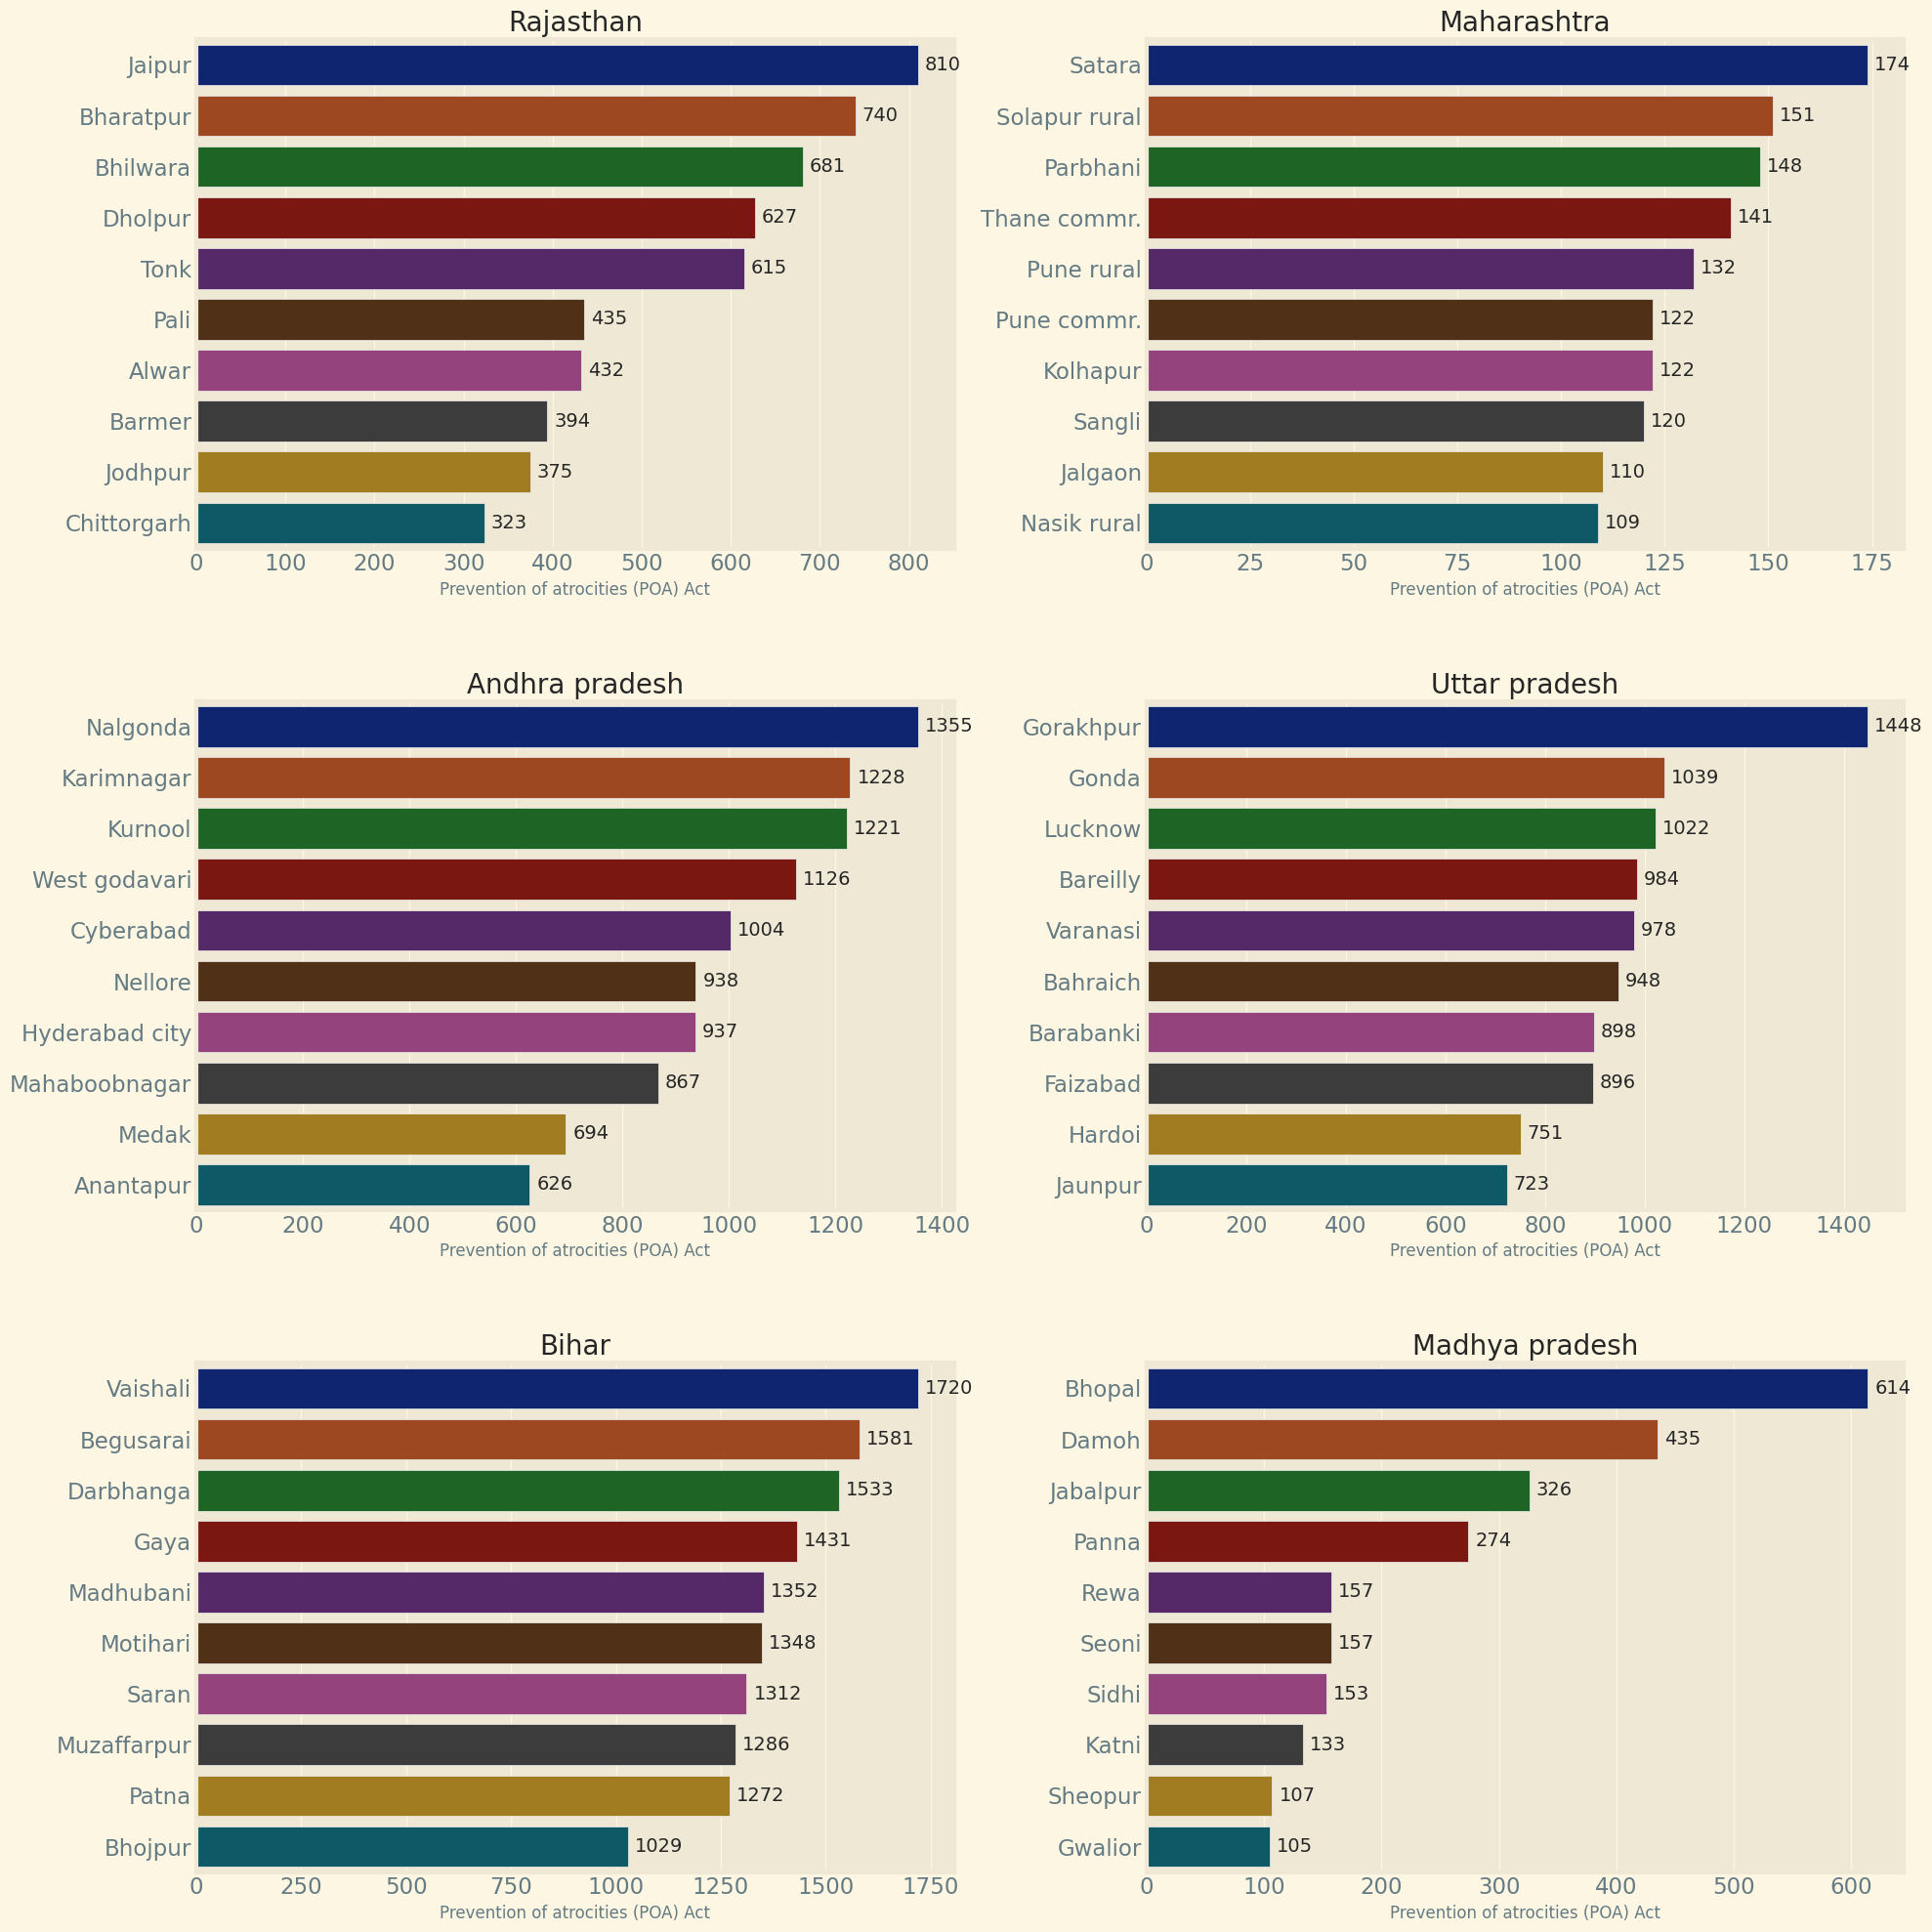

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Prevention of atrocities (POA) Act', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Prevention of atrocities (POA) Act' ,y= 'DISTRICT', palette = 'dark' )
    plt.xlabel('Prevention of atrocities (POA) Act')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

**Number of cases of Hurts in 6 states**

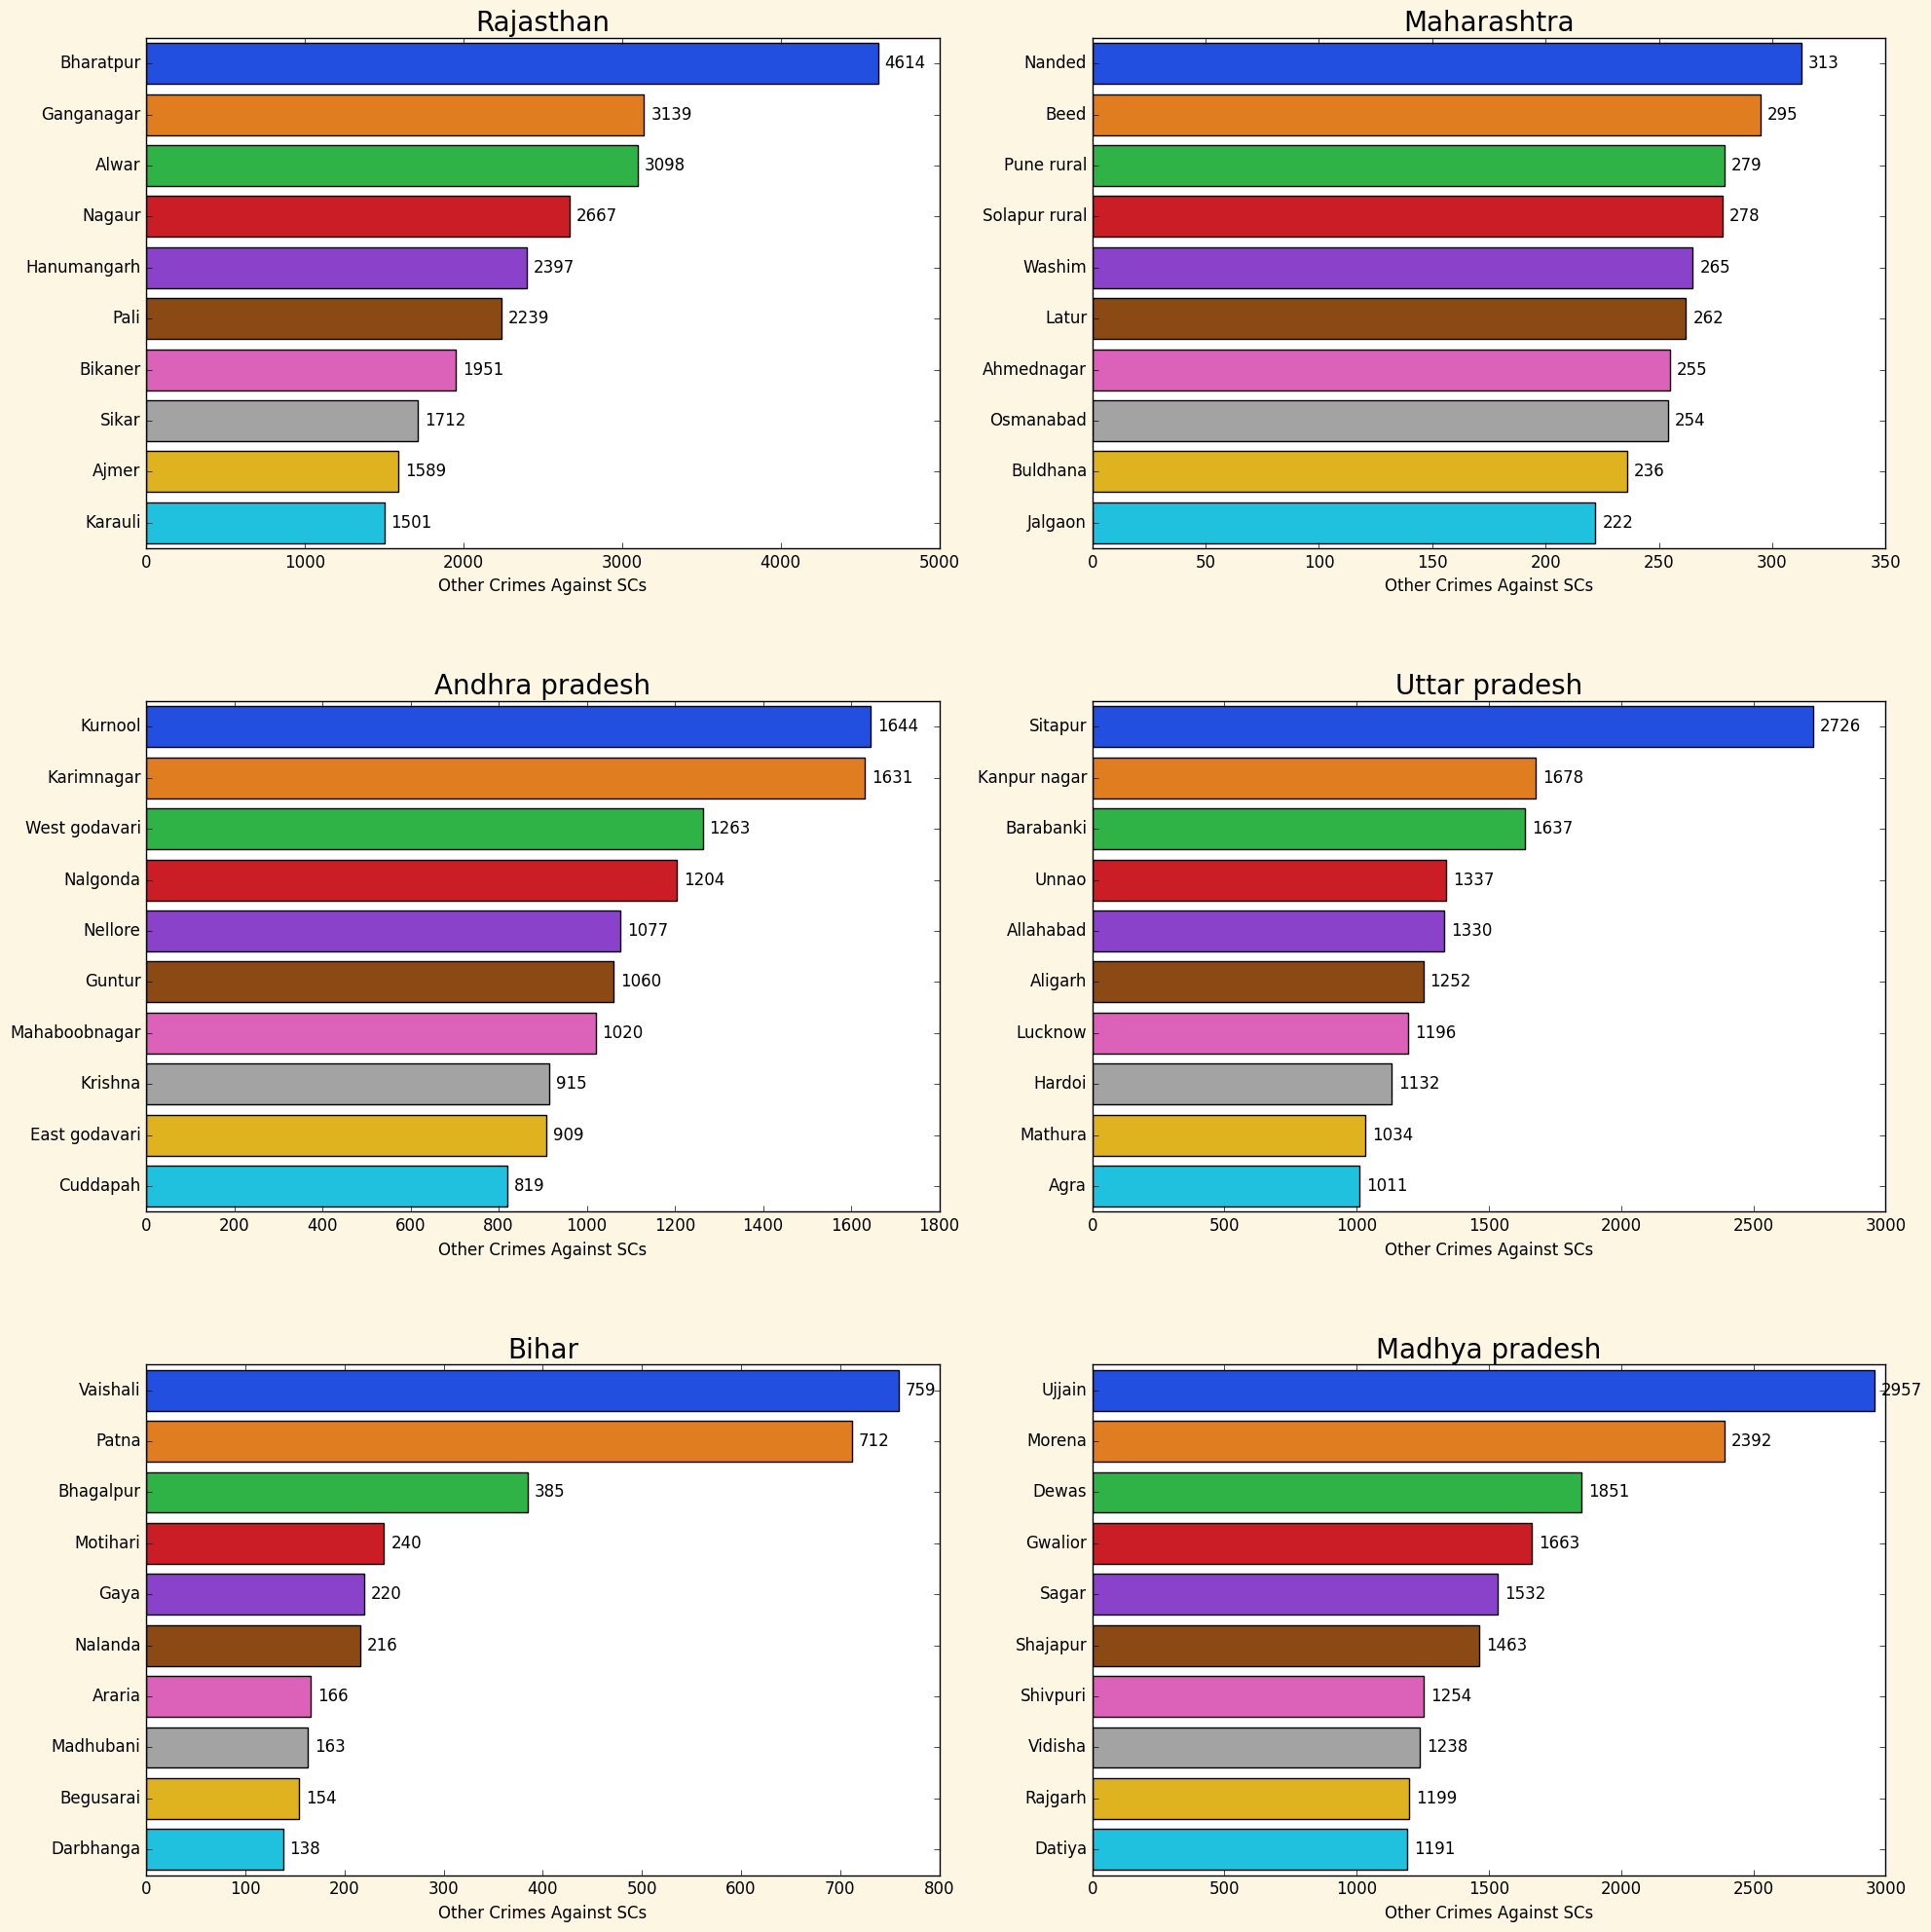

In [ ]:
plt.figure(figsize=(20,20))
plt.style.use('classic')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Other Crimes Against SCs', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Other Crimes Against SCs' ,y= 'DISTRICT', palette = 'bright' )
    plt.xlabel('Other Crimes Against SCs')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

**Building ML Model**

**Linear Regression**

In [ ]:
sc1.head()

STATE/UT       DISTRICT  Year  Murder  Rape  \
0  ANDHRA PRADESH       ADILABAD  2001       0     1   
1  ANDHRA PRADESH      ANANTAPUR  2001       0     4   
2  ANDHRA PRADESH       CHITTOOR  2001       3     3   
3  ANDHRA PRADESH       CUDDAPAH  2001       0     3   
4  ANDHRA PRADESH  EAST GODAVARI  2001       1     3   

   Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                         4        0        0      0     3   
1                         0        0        0      0    49   
2                         0        0        0      0    38   
3                         0        0        0      0    20   
4                         0        0        0      0     3   

   Prevention of atrocities (POA) Act  Protection of Civil Rights (PCR) Act  \
0                                   0                                    15   
1                                  21                                     0   
2                                  36                                     0   
3                                  52                                     0   
4                                  12                                    63   

   Other Crimes Against SCs  
0                        32  
1                        53  
2                        34  
3                        25  
4                         7

In [ ]:
print("List of Numerical features: \n" , sc.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Year', 'Murder', 'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
feed = sc[['Murder', 'Rape', 'Kidnapping and Abduction', 'Dacoity',
           'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
           'Protection of Civil Rights (PCR) Act','Other Crimes Against SCs']]
df_train_x = feed.drop('Murder', axis=1)
df_train_y = feed['Murder']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

**KNN RMSLE**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(x_train, y_train)

predictions_knn = knn_model.predict(x_test)

mse = mean_squared_error(y_test, predictions_knn)
rmse = mse*0.1
print("Root Mean Squared Error (RMSE) of KNN model:", rmse)

# Now, let's predict using the userdata
userdata = pd.DataFrame(data=[[8576, 17991, 5305, 440, 1015, 2906, 54055, 138533, 4332]],
                         columns=df_train_x.columns)



Root Mean Squared Error (RMSE) of KNN model: 0.5908963941086846


**KNN Accuracy**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df_train_y_classification = pd.cut(df_train_y, bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(
    df_train_x, df_train_y_classification, test_size=0.20, random_state=42
)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train_classification, y_train_classification)

# Make predictions
predictions_knn = knn_classifier.predict(x_test_classification)

# Calculate and print accuracy
accuracy = accuracy_score(y_test_classification, predictions_knn)
print("Accuracy:", accuracy)


Accuracy: 0.7821229050279329


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_train_y_classification = pd.cut(df_train_y, bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(
    df_train_x, df_train_y_classification, test_size=0.20, random_state=42
)

svc = SVC()
svc.fit(x_train_classification, y_train_classification)

predictions_svc = svc.predict(x_test_classification)

accuracy = accuracy_score(y_test_classification, predictions_svc)
print("Accuracy:", accuracy)


Accuracy: 0.7943118334179786


**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
import numpy as np


lg = LinearRegression()
lg.fit(x_train, y_train)
predictions_lg = lg.predict(x_test)
predictions_lg = [max(0, x) for x in predictions_lg]


userdata = pd.DataFrame(data=[[8576, 17991, 5305, 440, 1015, 2906, 54055, 138533, 4332]],
                         columns=df_train_x.columns)

res = lg.predict(userdata)
print("The RMSLE obtained is:", np.sqrt(mean_squared_log_error(y_test, predictions_lg)))



The RMSLE obtained is: 0.560301319430421


**Decession Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error, r2_score
import numpy as np

lg = DecisionTreeRegressor()
lg.fit(x_train, y_train)

predictions_lg = lg.predict(x_test)
predictions_lg = [max(0, x) for x in predictions_lg]

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, predictions_lg))
print("The RMSLE obtained is:", rmsle)

# Calculate R2 score
r2 = r2_score(y_test, predictions_lg)
print("The R2 score obtained is:", r2)


The RMSLE obtained is: 0.5885358983611345
The R2 score obtained is: 0.885669321302653


The R2 score is a value between 0 and 1, and it can be interpreted as follows:

R2 = 1: The model perfectly predicts the target variable.<br>
R2 = 0: The model does not explain any of the variability in the target variable.<br>
R2 < 0: The model is worse than a simple mean-based model.

**Naive Bayes**

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

predictions_nb = nb_model.predict(x_test)


accuracy = accuracy_score(y_test, predictions_nb)

userdata = pd.DataFrame(data=[[8576, 17991, 5305, 440, 1015, 2906, 54055, 138533, 4332]],
                         columns=df_train_x.columns)

res = nb_model.predict(userdata)
print("Accuracy of Naive Bayes model:", accuracy)

Accuracy of Naive Bayes model: 0.6500761808024378


**KNN Model**

# Conclusion

 Despite governments best effort the number of atrocities and hurt cases are increasing over the years. **Rajasthan ,Uttarpradesh , Bihar ,Maharashtra and Rajasthan** seem to be hotspot for crimes against Scs.

**BD DATASET TRAINING**

In [ ]:
!pip install XlsxWriter
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

from geopy.geocoders import Nominatim, OpenMapQuest
from geopy.exc import GeocoderTimedOut


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Dataset/ACLED_Data_PrototypeV2.1.xlsx')
data

YEAR EVENT_TYPE   LOCATION  LATITUDE  LONGITUDE        DISTRICT
0      2001    Battles   Lohagara   23.1998    89.6644          NARAIL
1      2001      Riots  Hathazari   22.5052    91.8134      CHITTAGONG
2      2001      Riots  Rangamati   22.6432    92.1919  RANGAMATI HILL
3      2001      Riots     Rajoir   23.1878    90.0322       MADARIPUR
4      2001      Riots   Rajshahi   24.3740    88.6011        RAJSHAHI
...     ...        ...        ...       ...        ...             ...
30624  2020      Riots       Paba   24.4417    88.6278        RAJSHAHI
30625  2020      Riots    Bhuapur   24.4604    89.8727         TANGAIL
30626  2020   Protests     Dhaka    23.7406    90.3943           DHAKA
30627  2020      Riots      Bogra   24.8510    89.3711           BOGRA
30628  2020      Riots     Dhaka    23.7333    90.4000           DHAKA

[30629 rows x 6 columns]

In [ ]:
data['LOCATION'].nunique()

1371

In [ ]:
data.loc[0, 'LOCATION']

'Lohagara'

Specific Event types total counts by **year**

In [ ]:
years = data.YEAR.unique()
events = data.EVENT_TYPE.unique() # has duplicates same values actual values is 6 not 9
print(events)

totalcount_df = pd.DataFrame(columns = ['YEAR'])

for i in years:
  year = data.loc[data['YEAR'] == i]
  duplicates = year.pivot_table(index = ['EVENT_TYPE'], aggfunc ='size')
  print(i)
  print(duplicates,'\n')

  totalcount_df = totalcount_df.append(duplicates, ignore_index=True)

totalcount_df

totalcount_df.to_csv('ACLED_totalcounts.csv',index=False)

['Battles' 'Riots' 'ViolenceAgainstCivilians' 'Protests'
 'ExplosionsRemoteViolence' 'StrategicDevelopments']
2001
EVENT_TYPE
Battles                     177
ExplosionsRemoteViolence     18
Protests                    462
Riots                       820
StrategicDevelopments        30
ViolenceAgainstCivilians    340
dtype: int64 

2002
EVENT_TYPE
Battles                      202
ExplosionsRemoteViolence      27
Protests                     350
Riots                       1738
StrategicDevelopments         25
ViolenceAgainstCivilians     398
dtype: int64 

2003
EVENT_TYPE
Battles                     199
ExplosionsRemoteViolence      9
Protests                    143
Riots                       512
StrategicDevelopments         8
ViolenceAgainstCivilians    251
dtype: int64 

2004
EVENT_TYPE
Battles                      137
ExplosionsRemoteViolence      48
Protests                     353
Riots                       1168
StrategicDevelopments         26
ViolenceAgainstCivilians     183
d

<ipython-input-6-e6eb0039b4dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalcount_df = totalcount_df.append(duplicates, ignore_index=True)
<ipython-input-6-e6eb0039b4dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalcount_df = totalcount_df.append(duplicates, ignore_index=True)
<ipython-input-6-e6eb0039b4dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalcount_df = totalcount_df.append(duplicates, ignore_index=True)
<ipython-input-6-e6eb0039b4dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalcount_df = totalcount_df.append(duplicates, ignore_index=True)
<ipython-input-6-e6eb0039b4dc>:13: FutureWarning

**Total Events by year and cities**

In [ ]:
years = data['YEAR'].unique()
locations = data['LOCATION'].unique()
events = data['EVENT_TYPE'].unique()

locations_totalcount_df = pd.DataFrame(columns = [years])
count = 0

for i in locations:
  for j in years:
    x = data.loc[(data['LOCATION'] == i) & (data['YEAR'] == j)]
    # duplicates = x.pivot_table(index = ['EVENT_TYPE'], aggfunc ='size') # enable this to show specific events like riots murder etc
    sum = x['EVENT_TYPE'].count()
    # print('~~~~~~~~~~~~~~~~~~~~~~')
    # print(i,j,'Total events: ',sum)
    # print(duplicates)

    locations_totalcount_df.loc[count,j] = sum

  count+=1

locations_totalcount_df

2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014  \
0       7    5    4    3    1    1    1    0    1    0    4    7    5    4   
1      11   14   11    3    5    6   19    2    0    9   10   11   14   11   
2      13    7    1    7    4    1    4    3    2   13   13   13    7    1   
3       2    0    0    0    0    0    0    4    0    2    2    2    0    0   
4      61  109   45   66   26   18   43   48   14   99   71   61  109   45   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1366    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1367    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1368    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1369    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1370    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

     2015 2016 2017 2018 2019 2020  
0       3    1    1    0    0    4  
1       3    5    6    4    2    3  
2       7    4    1    2    5    5  
3       0    0    0    0    4    0  
4      66   26   20   31   50   41  
...   ...  ...  ...  ...  ...  ...  
1366    0    0    0    0    0    1  
1367    0    0    0    0    0    1  
1368    0    0    0    0    0    1  
1369    0    0    0    0    0    1  
1370    0    0    0    0    0    1  

[1371 rows x 20 columns]

In [ ]:
# # Add cities to dataframe
locations_totalcount_df['LOCATION'] = locations.tolist()
locations_totalcount_df

In [ ]:
locations_totalcount_df.to_excel('ACLED_locations_totalcount_df.xlsx',index=False)

In [ ]:
x = data.loc[(data['LOCATION'] == 'Hathazari') & (data['YEAR'] == 2011)]
x

YEAR EVENT_TYPE   LOCATION  LATITUDE  LONGITUDE    DISTRICT
15213  2011    Battles  Hathazari   22.5052    91.8134  CHITTAGONG
15505  2011      Riots  Hathazari   22.5052    91.8134  CHITTAGONG
15571  2011      Riots  Hathazari   22.5052    91.8134  CHITTAGONG
15586  2011      Riots  Hathazari   22.5052    91.8134  CHITTAGONG
15949  2011      Riots  Hathazari   22.5052    91.8134  CHITTAGONG
15994  2011   Protests  Hathazari   22.5052    91.8134  CHITTAGONG
16066  2011      Riots  Hathazari   22.5052    91.8134  CHITTAGONG
16090  2011      Riots  Hathazari   22.5052    91.8134  CHITTAGONG
16111  2011      Riots  Hathazari   22.5052    91.8134  CHITTAGONG
16899  2011   Protests  Hathazari   22.5052    91.8134  CHITTAGONG

In [ ]:
years = data['YEAR'].unique()
locations = data['LOCATION'].unique()
events = data['EVENT_TYPE'].unique()

years_dict = {}
for i in years:
  location_dict = {}
  for j in locations:
    x = data.loc[(data['LOCATION'] == j) & (data['YEAR'] == i)]
    duplicates = x.pivot_table(index = ['EVENT_TYPE'], aggfunc ='size') # enable this to show specific events like riots murder etc
    event_dict = {}
    for event, value in duplicates.items():
      event_dict[event] = value

    location_dict[j] = event_dict

  years_dict[i] = location_dict


In [ ]:
for i in years_dict:
  print(years_dict[i])

In [ ]:
writer = pd.ExcelWriter('yearwise_locations_specificevent.xlsx', engine='xlsxwriter')

yearwise_locations_specificevent = pd.DataFrame()
yearwise_locations_specificevent

for year in years_dict:
  count = 0
  for city in years_dict[year]:
    yearwise_locations_specificevent.loc[count, 'LOCATION'] = city

    x = years_dict[year][city]
    for event,value in x.items():
      yearwise_locations_specificevent.loc[count, event] = value
      # yearwise_locations_specificevent[str(event)].iloc[count] = value

    count+=1

    # for event in years_dict[year][city]:


  yearwise_locations_specificevent.to_excel(writer, sheet_name=str(year),index=False)

writer.save()

<ipython-input-14-ca7e5d8a352f>:23: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
years = data['YEAR'].unique()
locations = data['LOCATION'].unique()
events = data['EVENT_TYPE'].unique()

specific_event_type_totalcount = pd.DataFrame()

writer = pd.ExcelWriter('specific_event_type_totalcount.xlsx', engine='xlsxwriter')

for k in events:
  count = 0
  for i in locations:
  # for j in years:
    # x = data.loc[(data['LOCATION'] == i) & (data['YEAR'] == j) & (data['EVENT_TYPE'] == k)]
    x = data.loc[(data['LOCATION'] == i) & (data['EVENT_TYPE'] == k)]
    # duplicates = x.pivot_table(index = ['EVENT_TYPE'], aggfunc ='size') # enable this to show specific events like riots murder etc
    sum = x['EVENT_TYPE'].count()
    # print('~~~~~~~~~~~~~~~~~~~~~~')
    # print(i,j,'Total events: ',sum)
    # print(duplicates)


    specific_event_type_totalcount.loc[count,'Total'] = sum

    count+=1

  specific_event_type_totalcount.to_excel(writer, sheet_name=str(k),index=False)

writer.save()

<ipython-input-15-57603e6a590e>:28: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


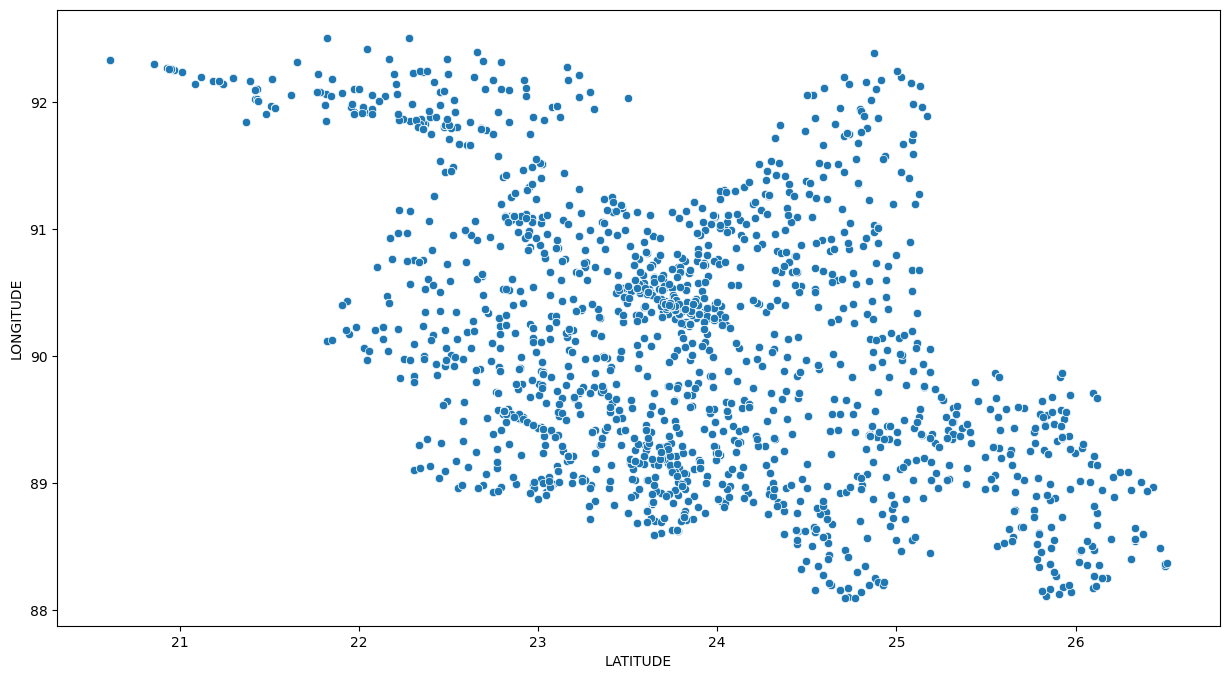

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(15, 8))
sns.scatterplot(x=data['LATITUDE'], y=data['LONGITUDE'])
plt.show()

In [ ]:
import folium

# Assuming 'data' is your DataFrame
lat_median = data['LATITUDE'].median()
long_median = data['LONGITUDE'].median()

# Create the map
map_pickup = folium.Map(location=[lat_median, long_median], zoom_start=6)

# Adding points to the map
data.apply(lambda row: folium.Circle(location=[row['LATITUDE'], row['LONGITUDE']], radius=0.25).add_to(map_pickup), axis=1)

# Display the map
map_pickup


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd

# Assuming your data is in an Excel file
file_path = '/content/drive/MyDrive/Dataset/bdpolice_totals.xlsx'
data1 = pd.read_excel(file_path)

# Display the DataFrame
data1

Year  Dacoity  Robbery  Murder  Speedy Trial  Riot  \
0  2010      656     1059    3988          1666   130   
1  2011      650     1069    3966          1863   109   
2  2012      593      964    4114          1907    94   
3  2013      613     1021    4393          1896   172   
4  2014      651     1155    4514          1716    79   
5  2015      492      933    4037          1549    93   
6  2016      408      722    3591          1052    53   
7  2017      336      657    3549          1045    23   
8  2018      262      562    3830           922    26   
9  2019       32       68     351            48     1   

   Woman & Child Repression  Kidnapping  Police Assault  Burglary  Theft  \
0                     17752         870             473      3101   8529   
1                     21389         792             581      3134   8873   
2                     20947         850             659      2927   8598   
3                     19601         879            1257      2762   7882   
4                     21291         920             702      2809   7660   
5                     21210         805             634      2495   6821   
6                     18446         639             521      2213   6110   
7                     17073         509             543      2163   5833   
8                     16253         444             811      2137   5561   
9                      1139          46              69       174    494   

   Arms Act  Explosive  Narcotics  Smuggling  Other Cases  
0      1575        253      29344       6363        87139  
1      1269        207      31696       5714        88355  
2      1511        289      37264       6578        96112  
3      1517       1007      35832       6437        93930  
4      2023        520      42501       6788        90400  
5      2079        725      47666       6179        84117  
6      2291        487      62208       4680        77747  
7      2208        362      98984       5599        74645  
8      2515       1310     112549       4501        69736  
9       174         30       9069        361         5428

In [ ]:
import pandas as pd

# Assuming your dataset is already loaded into df
# Replace 'df' with the actual variable containing your dataset
df=data1
# Filter rows where DISTRICT is 'Total'
yearw = df.groupby(['Year']).sum().reset_index()

# Calculate the sum across all columns except 'Year'
yearw['sum'] = yearw.drop('Year', axis=1).sum(axis=1)

# Keep only 'Year' and 'sum' columns in the final DataFrame
yearw = yearw[['Year', 'sum']]

# Display the resulting DataFrame
print(yearw)

   Year     sum
0  2010  162898
1  2011  169667
2  2012  183407
3  2013  179199
4  2014  183729
5  2015  179835
6  2016  181168
7  2017  213529
8  2018  221419
9  2019   17484


In [ ]:
# Filter rows where DISTRICT is 'Total'
yearw = data1.groupby(['Year'])[['Dacoity','Robbery','Speedy Trial','Riot','Woman & Child Repression', 'Kidnapping',
       'Police Assault',   'Burglary', 'Theft',
       'Arms Act',
       'Explosive', 'Narcotics','Smuggling','Other Cases']].sum().reset_index()

# Calculate the sum across all columns except 'Year'
yearw['sum'] = yearw.drop('Year', axis=1).sum(axis=1)

# Keep only 'Year' and 'sum' columns in the final DataFrame
yearw = yearw[['Year', 'sum']]

# Display the resulting DataFrame
print(yearw)


   Year     sum
0  2010  158910
1  2011  165701
2  2012  179293
3  2013  174806
4  2014  179215
5  2015  175798
6  2016  177577
7  2017  209980
8  2018  217589
9  2019   17133


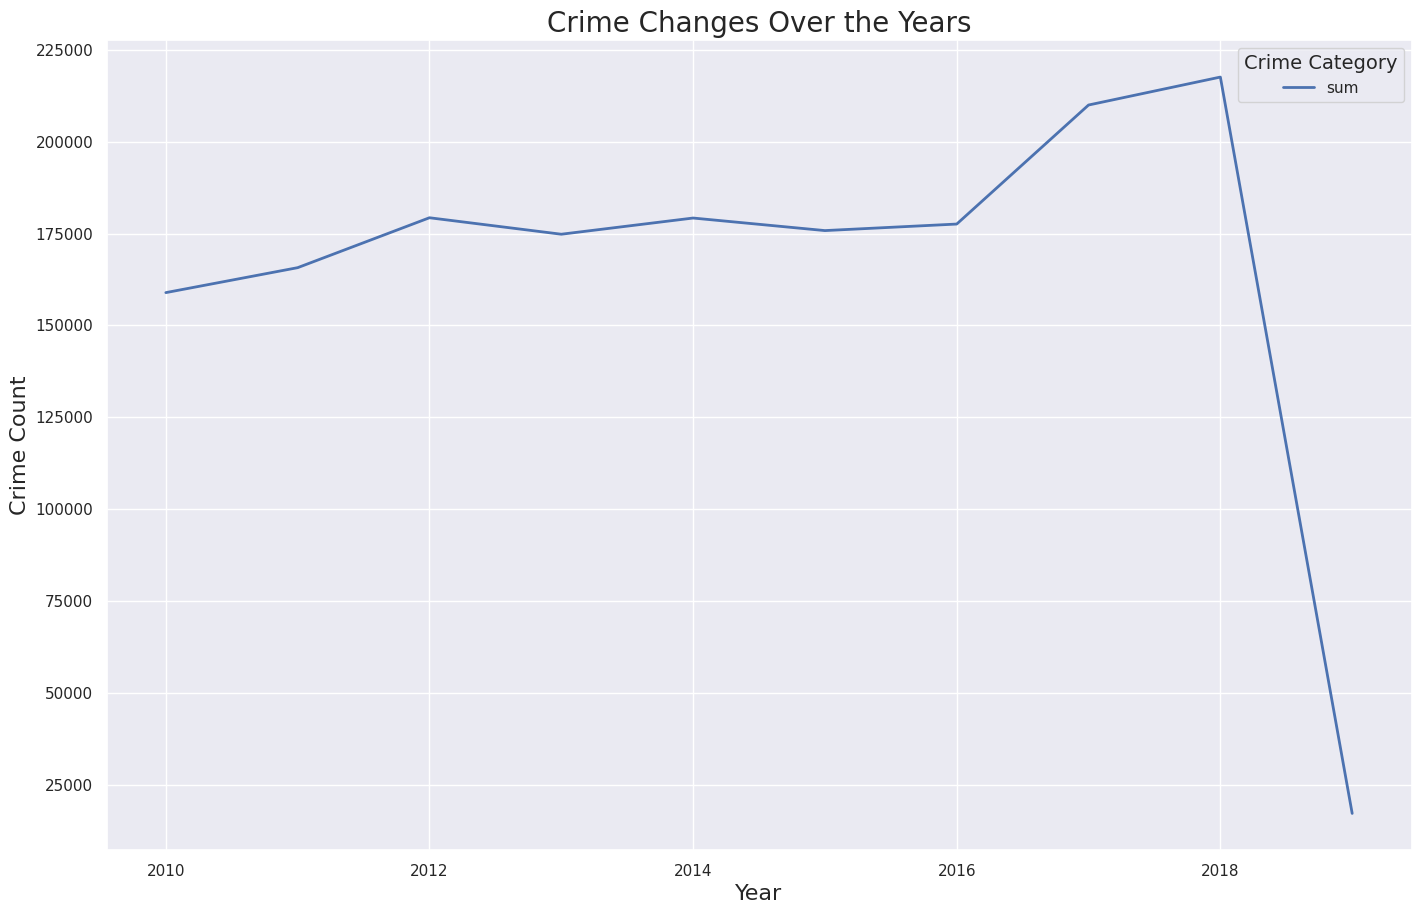

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'yearw' is your DataFrame containing 'Year' and crime counts
# Replace 'yearw' with the actual variable containing your data

# Set the style to 'darkgrid'
sns.set(style="darkgrid")

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Loop through each crime column and create a line chart
for crime_column in yearw.columns[1:]:  # Exclude 'Year'
    sns.lineplot(x='Year', y=crime_column, data=yearw, label=crime_column, linewidth=2)

# Set plot title and labels
plt.title('Crime Changes Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Crime Count', fontsize=16)

# Display legend
plt.legend(title='Crime Category', title_fontsize='14')

# Show the plot
plt.show()


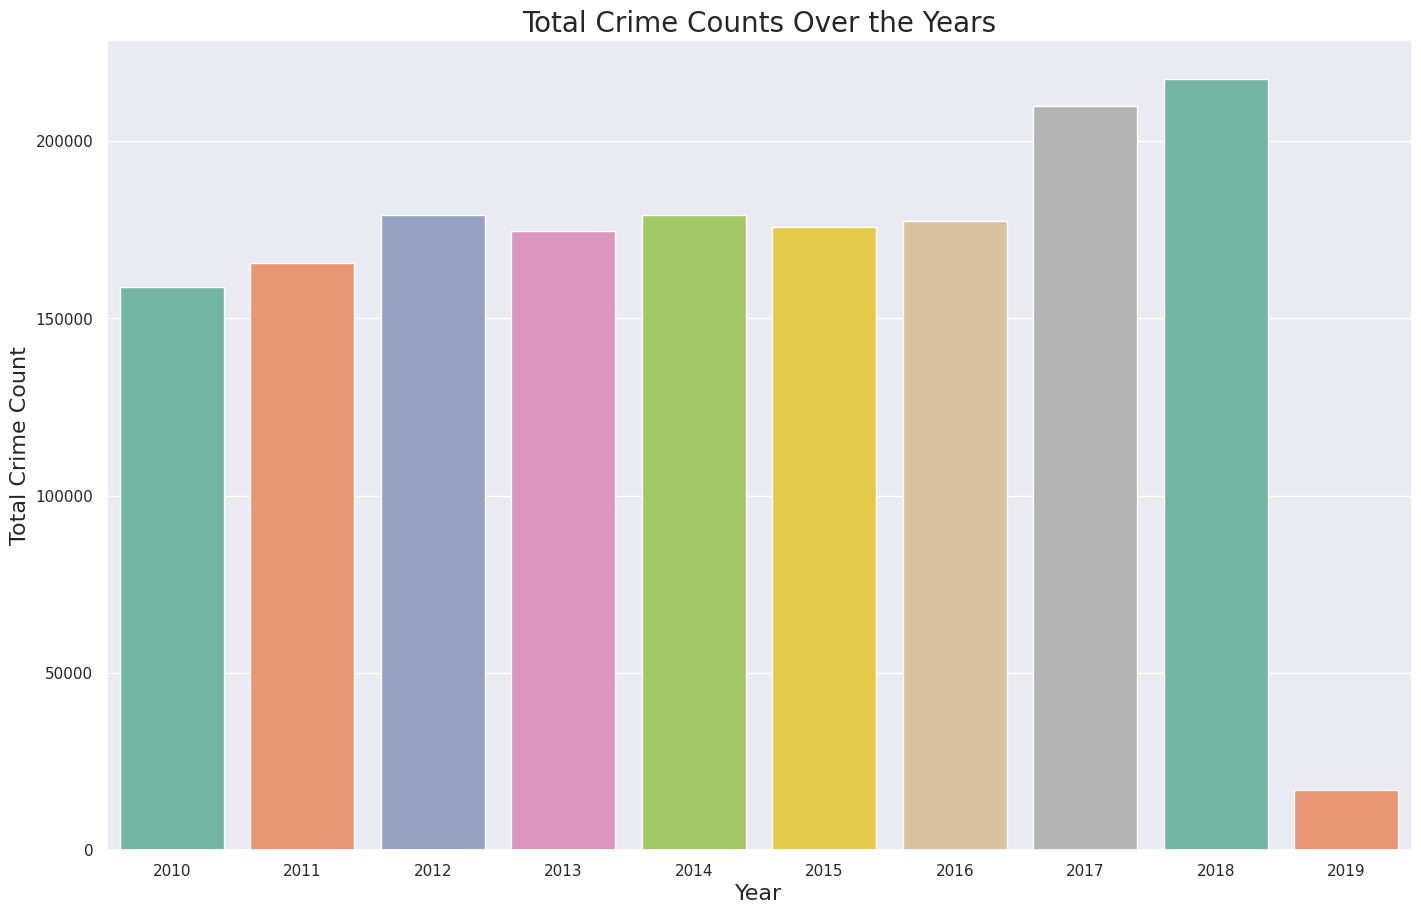

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'yearw' is your DataFrame containing 'Year' and crime counts
# Replace 'yearw' with the actual variable containing your data

# Set the style to 'darkgrid'
sns.set(style="darkgrid")

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Define custom colors for each bar
bar_colors = sns.color_palette("Set2", len(yearw))

# Create a bar chart for the total crime counts per year with custom colors
sns.barplot(x='Year', y='sum', data=yearw, palette=bar_colors)

# Set plot title and labels
plt.title('Total Crime Counts Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Crime Count', fontsize=16)

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go

labels = ['Dacoity','Robbery','Speedy Trial','Riot','Woman & Child Repression', 'Kidnapping',
       'Police Assault',   'Burglary', 'Theft','Arms Act','Explosive', 'Narcotics','Smuggling','Other Cases']
values = [158910, 165701, 179293, 174806, 179215, 175798, 177577, 209980, 217589, 17133]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
fig.update_layout(
    uniformtext_minsize=20,
    title_text="Total Crime Counts from 2010 to 2019 in Bangladesh",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=700,
    height=700
)
fig.show()

In [ ]:
new_row = scs.iloc[[1]]
scs = scs.append(new_row, ignore_index = True)
scs.at[35, 'STATE/UT']= 'Telangana'
scs.at[9,'STATE/UT'] = 'Nct of Delhi'

gdf = gpd.read_file("/content/drive/MyDrive/Dataset/mygeodata_2/ACLED_Data_PrototypeV2.1-point.shx")

gdf.st_nm = gdf.st_nm.str.lower()
scs['STATE/UT'] = scs['STATE/UT'].str.lower()

merged = gdf.merge(scs , left_on='st_nm', right_on='STATE/UT')
merged1 = merged.drop(['STATE/UT'], axis=1)

NameError: name 'scs' is not defined

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import seaborn as sns

# Assuming 'merged1' is your GeoDataFrame with geometrical information and 'Rape' column
cmap = 'Blues'  # You can choose a different colormap

sns.set_context("poster")
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

figsize = (25, 20)

# Plotting the choropleth map
ax = merged1.dropna().plot(column='Rape', cmap=cmap, figsize=figsize, scheme='equal_interval', edgecolor='black')
ax.set_title("Cases of Rape", size=25)

# Annotate the map with text
for idx, row in merged1.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['Rape'], horizontalalignment='center',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 2, 'edgecolor': 'none'})

# Create colorbar
norm = Normalize(vmin=merged1['Rape'].min(), vmax=merged1['Rape'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

ax.set_axis_off()
plt.axis('equal')
plt.show()


NameError: name 'merged1' is not defined